In [1]:
import matplotlib as plt
import scanpy as sc
import pandas as pd
import numpy as np
import os

In [2]:
adata = sc.read_h5ad("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:01:22/all_data_combined_post_scrublet.h5ad")

In [3]:
import numpy as np
import pandas as pd

# Ensure all NaNs are removed before converting to a list
celltype_list = adata.obs['all_celltype'].dropna().unique()

# Replace 'FAT_1' with 'FAT-1'
celltype_list = [cell.replace('FAT_1', 'FAT-1') for cell in celltype_list]
celltype_list = [cell.replace('FAT_2', 'FAT-2') for cell in celltype_list]
celltype_list = [cell.replace('CONE_1', 'CONE-1') for cell in celltype_list]
celltype_list = [cell.replace('CONE_2', 'CONE-2') for cell in celltype_list]


# Convert to a Python list and explicitly remove any 'nan' strings
celltype_list = [str(ct) for ct in celltype_list if pd.notna(ct) and str(ct).lower() != "nan"]

# Print to check if 'nan' is still present
print(celltype_list)  # Ensure "nan" is not in the list


['Unannotated', 'Tm5a', 'R1-6', 'R7', 'Lai', 'TmY3', 'CONE-1', 'EPI', 'FAT-1', 'T4T5', 'OCHG', 'TmY4', 'LC12', 'JON', 'T1', 'AL-PN', 'L3', 'T4T5ab', 'LC17', 'LPLC2', 'Tm9', 'LC4', 'ALG', 'TmY14', 'CONE-2', 'PGM', 'LC10a', 'Tm1', 'L2', 'CG', 'EB-RN', 'Mi1', 'KCab', 'KCapbp', 'Mi15', 'HE', 'Mi4', 'MUS', 'Mi9', 'T2', 'FAT-2', 'T2a', 'SPG', 'Tm2', 'DRA', 'T4T5cd', 'CLKN', 'R8', 'Dm9', 'Dm10', 'DAN', 'KCy', 'LAWF1', 'L5', 'T3', 'PAM-DAN', 'PNG', 'LC10b', 'L1', 'L4', 'EG', 'ORN', 'PB', 'Dm3', 'LLPC1', 'Dm8', 'LPC1', 'CHG', 'LC14', 'TmY8', 'Tm4', 'LAWF2', 'dFB', 'Dm2', 'C3', 'LC16', 'LPLC1', 'C2', 'LEMG', 'LC21', 'Dm12', 'TmY5a', 'OCR', 'Pm4', 'Tm20', 'AudSN', 'LC22-LPLC4', 'LC11', 'SERN', 'LC10d', 'Pm3', 'Dm4', 'LC18', 'Dm11', 'LC6', 'Dm1', 'LC20', 'OAN', 'Pm2', 'Pm1', 'TYRN', 'Tm5c', 'LC13', 'DCN', 'Tm29']


In [4]:
adata = adata[adata.obs['batch'] != '20230925'].copy()

In [282]:
os.chdir("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:01:31")

In [283]:
import os
import pandas as pd

# Ensure we are in the correct directory
all_files = set(os.listdir())  # Get all filenames in the directory

# Extract and clean cell type names
celltype_list = adata.obs['all_celltype'].dropna().unique()
celltype_list = [str(ct) for ct in celltype_list if pd.notna(ct) and str(ct).lower() != "nan"]

# Standardize cell type names: replace underscores with hyphens
celltype_list = [ct.replace('_', '-') for ct in celltype_list]

# Function to find the actual filename in the directory
def find_matching_filename(prefix, celltype):
    possible_names = [
        f"{prefix}_{celltype}.csv",       # Hyphen version
        f"{prefix}_{celltype.replace('-', '_')}.csv",  # Underscore version
    ]
    for name in possible_names:
        if name in all_files:
            return name  # Return the correct filename
    print(f"⚠️ Warning: No file found for {celltype} in {prefix}")
    return None  # If no match is found

# Load data safely
def load_existing_csv(prefix, celltype_list):
    data = {}
    for celltype in celltype_list + ["Unannotated"]:  # Ensure "Unannotated" is included
        filename = find_matching_filename(prefix, celltype)  
        if filename:
            try:
                data[celltype] = pd.read_csv(filename)
                print(f"✅ Loaded: {filename}")
            except Exception as e:
                print(f"❌ Error loading {filename}: {e}")
        else:
            print(f"⚠️ Skipping: {celltype} (file not found)")
    return data

# Load datasets
WTLD_data = load_existing_csv("WTLD_M", celltype_list)
WTDD_data = load_existing_csv("WTDD_M", celltype_list)
MTLD_data = load_existing_csv("MTLD_M", celltype_list)
MTDD_data = load_existing_csv("MTDD_M", celltype_list)


✅ Loaded: WTLD_M_Unannotated.csv
✅ Loaded: WTLD_M_Tm5a.csv
✅ Loaded: WTLD_M_R1-6.csv
✅ Loaded: WTLD_M_R7.csv
✅ Loaded: WTLD_M_Lai.csv
✅ Loaded: WTLD_M_TmY3.csv
✅ Loaded: WTLD_M_CONE-1.csv
✅ Loaded: WTLD_M_EPI.csv
✅ Loaded: WTLD_M_FAT-1.csv
✅ Loaded: WTLD_M_T4T5.csv
✅ Loaded: WTLD_M_OCHG.csv
✅ Loaded: WTLD_M_TmY4.csv
✅ Loaded: WTLD_M_LC12.csv
✅ Loaded: WTLD_M_JON.csv
✅ Loaded: WTLD_M_T1.csv
✅ Loaded: WTLD_M_AL-PN.csv
✅ Loaded: WTLD_M_L3.csv
✅ Loaded: WTLD_M_T4T5ab.csv
✅ Loaded: WTLD_M_LC17.csv
✅ Loaded: WTLD_M_LPLC2.csv
✅ Loaded: WTLD_M_Tm9.csv
✅ Loaded: WTLD_M_LC4.csv
✅ Loaded: WTLD_M_ALG.csv
✅ Loaded: WTLD_M_TmY14.csv
✅ Loaded: WTLD_M_CONE-2.csv
✅ Loaded: WTLD_M_PGM.csv
✅ Loaded: WTLD_M_LC10a.csv
✅ Loaded: WTLD_M_Tm1.csv
✅ Loaded: WTLD_M_L2.csv
✅ Loaded: WTLD_M_CG.csv
✅ Loaded: WTLD_M_EB-RN.csv
✅ Loaded: WTLD_M_Mi1.csv
✅ Loaded: WTLD_M_KCab.csv
✅ Loaded: WTLD_M_KCapbp.csv
✅ Loaded: WTLD_M_Mi15.csv
✅ Loaded: WTLD_M_HE.csv
✅ Loaded: WTLD_M_Mi4.csv
✅ Loaded: WTLD_M_MUS.csv
✅ Loaded: WTLD

In [284]:
os.chdir("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09")

In [281]:
import pandas as pd

# Combine all dataframes into one, adding a 'cell_type' column
combined_df = pd.concat([df.assign(cell_type=celltype) for celltype, df in WTLD_data.items()], ignore_index=True)
# Save to a single CSV file
combined_df.to_csv("WTLD_F_combined.csv", index=False)
print("✅ WTLD_combined.csv saved successfully!")
# Combine all dataframes into one, adding a 'cell_type' column
combined_df = pd.concat([df.assign(cell_type=celltype) for celltype, df in WTDD_data.items()], ignore_index=True)
# Save to a single CSV file
combined_df.to_csv("WTDD_F_combined.csv", index=False)
print("✅ WTDD_combined.csv saved successfully!")
# Combine all dataframes into one, adding a 'cell_type' column
combined_df = pd.concat([df.assign(cell_type=celltype) for celltype, df in MTLD_data.items()], ignore_index=True)
# Save to a single CSV file
combined_df.to_csv("MTLD_F_combined.csv", index=False)
print("✅ MTLD_combined.csv saved successfully!")
# Combine all dataframes into one, adding a 'cell_type' column
combined_df = pd.concat([df.assign(cell_type=celltype) for celltype, df in MTDD_data.items()], ignore_index=True)
# Save to a single CSV file
combined_df.to_csv("MTDD_F_combined.csv", index=False)
print("✅ MTDD_combined.csv saved successfully!")


✅ WTLD_combined.csv saved successfully!
✅ WTDD_combined.csv saved successfully!
✅ WTLD_combined.csv saved successfully!
✅ WTLD_combined.csv saved successfully!


In [285]:
import pandas as pd

# Combine all dataframes into one, adding a 'cell_type' column
combined_df = pd.concat([df.assign(cell_type=celltype) for celltype, df in WTLD_data.items()], ignore_index=True)
# Save to a single CSV file
combined_df.to_csv("WTLD_M_combined.csv", index=False)
print("✅ WTLD_combined.csv saved successfully!")
# Combine all dataframes into one, adding a 'cell_type' column
combined_df = pd.concat([df.assign(cell_type=celltype) for celltype, df in WTDD_data.items()], ignore_index=True)
# Save to a single CSV file
combined_df.to_csv("WTDD_M_combined.csv", index=False)
print("✅ WTDD_combined.csv saved successfully!")
# Combine all dataframes into one, adding a 'cell_type' column
combined_df = pd.concat([df.assign(cell_type=celltype) for celltype, df in MTLD_data.items()], ignore_index=True)
# Save to a single CSV file
combined_df.to_csv("MTLD_M_combined.csv", index=False)
print("✅ MTLD_combined.csv saved successfully!")
# Combine all dataframes into one, adding a 'cell_type' column
combined_df = pd.concat([df.assign(cell_type=celltype) for celltype, df in MTDD_data.items()], ignore_index=True)
# Save to a single CSV file
combined_df.to_csv("MTDD_M_combined.csv", index=False)
print("✅ MTDD_combined.csv saved successfully!")


✅ WTLD_combined.csv saved successfully!
✅ WTDD_combined.csv saved successfully!
✅ MTLD_combined.csv saved successfully!
✅ MTDD_combined.csv saved successfully!


In [3]:
import pandas as pd

In [1]:
pwd

'/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09'

In [37]:
WTLD = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/WTLD_M_combined.csv")
WTDD = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/WTDD_M_combined.csv")
MTLD = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/MTLD_M_combined.csv")
MTDD = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/MTDD_M_combined.csv")

In [45]:
WTLD = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/WTLD_F_combined.csv")
WTDD = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/WTDD_F_combined.csv")
MTLD = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/MTLD_F_combined.csv")
MTDD = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/MTDD_F_combined.csv")

In [46]:
import pandas as pd

# Tag each DataFrame with a 'dataset' column
WTLD["dataset"] = "WTLD"
WTDD["dataset"] = "WTDD"
MTLD["dataset"] = "MTLD"
MTDD["dataset"] = "MTDD"

# Concatenate them all into one
df_combined = pd.concat([WTLD, WTDD, MTLD, MTDD], ignore_index=True)


In [47]:
def dataset_offset(ds):
    return {"WTLD": 0, "WTDD": 24, "MTLD": 48, "MTDD": 72}[ds]

df_combined["time"] = df_combined["avg_phase"] + df_combined["dataset"].apply(dataset_offset)


In [ ]:
import numpy as np
df_sig = df_combined
# create a new column that floors avg_phase into 2 h bins: 0,2,4,…,22
df_sig['phase_bin'] = (df_sig['avg_phase'] // 2) * 2

# then group by that instead of raw avg_phase
counts = (
    df_sig
    .groupby(['phase_bin', 'cell_type'])['CycID']
    .count()
    .reset_index(name='n')
)

counts_pivot = counts.pivot(
    index='phase_bin',
    columns='cell_type',
    values='n'
).fillna(0)

# plotting
import matplotlib.pyplot as plt

x = counts_pivot.index
y = counts_pivot.values.T

plt.figure(figsize=(10, 6))
plt.stackplot(x, *y, labels=counts_pivot.columns)
plt.xlabel("Phase (binned, hours)")
plt.ylabel("Number of rhythmic genes")
plt.title("Stacked Area Chart by Cell Type (WTLD, 2 h bins)")
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.xticks(np.arange(0, counts_pivot.index.max()+1, 2))  # show ticks every 2 h
plt.tight_layout()
plt.show()


In [ ]:
# filter significant
df_sig = df_combined[df_combined["avg_p"] < 0.05].copy()

# 2 h bins on the concatenated time
df_sig["time_bin"] = (df_sig["time"] // 2) * 2
#df_sig["time_bin"] = df_sig["time"].astype(int)

# count per bin & cell type
counts = (
    df_sig
    .groupby(["time_bin", "cell_type"])["CycID"]
    .count()
    .reset_index(name="n")
)

# pivot so each cell_type is a column
counts_pivot = counts.pivot(
    index="time_bin",
    columns="cell_type",
    values="n"
).fillna(0)

# plotting
import matplotlib.pyplot as plt
import numpy as np

x = counts_pivot.index
y = counts_pivot.values.T

plt.figure(figsize=(10, 6))
plt.stackplot(x, *y, labels=counts_pivot.columns)
plt.xlabel("Time (binned, hours)")
plt.ylabel("Number of rhythmic genes")
plt.title("Stacked Area Chart (WTLD + WTDD + MTLD + MTDD, 2 h bins)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(np.arange(x.min(), x.max()+1, 2))   # ticks every 2 h
plt.tight_layout()
plt.show()


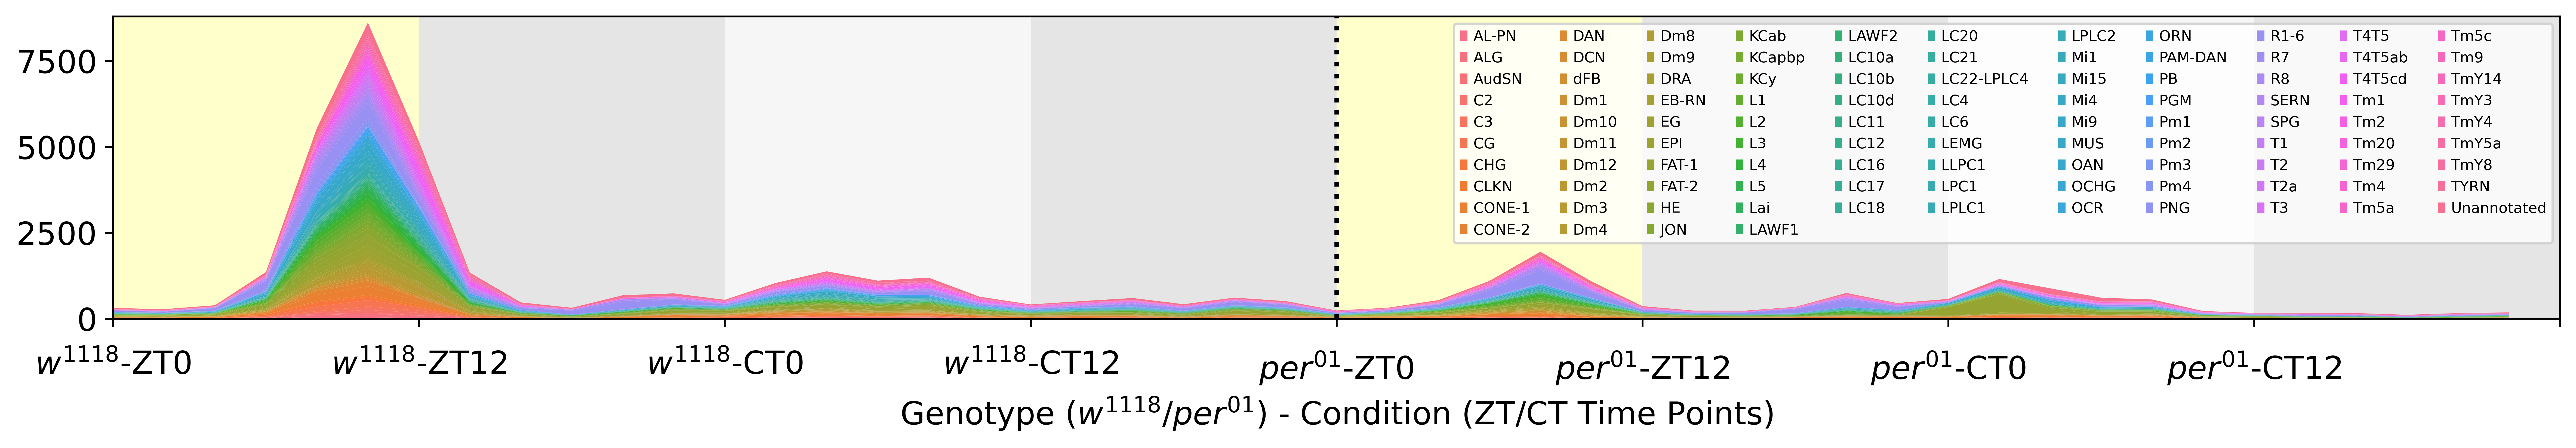

In [51]:
# Sort columns alphabetically ignoring case
import seaborn as sns

sorted_columns = sorted(counts_pivot.columns, key=lambda x: x.lower())
counts_pivot = counts_pivot[sorted_columns]

# Then continue with your plotting code as-is
num_cell_types = len(counts_pivot.columns)
colors = sns.color_palette("husl", n_colors=num_cell_types)

plt.figure(figsize=(16, 3))

# Background rectangles
plt.axvspan(0, 12, facecolor="yellow", alpha=0.2)
plt.axvspan(48, 60, facecolor="yellow", alpha=0.2)
plt.axvspan(24, 36, facecolor="lightgray", alpha=0.2)
plt.axvspan(72, 84, facecolor="lightgray", alpha=0.2)
plt.axvspan(12, 24, facecolor="gray", alpha=0.2)
plt.axvspan(36, 48, facecolor="gray", alpha=0.2)
plt.axvspan(60, 72, facecolor="gray", alpha=0.2)
plt.axvspan(84, 96, facecolor="gray", alpha=0.2)
plt.axvline(x=48, color="black", linestyle=":", linewidth=2)

# Stacked area
x = counts_pivot.index
y = counts_pivot.values.T
plt.stackplot(x, *y, labels=counts_pivot.columns, colors=colors)

plt.xlabel(r"Genotype ($w^{1118}$/$per^{01}$) - Condition (ZT/CT Time Points)")
#plt.ylabel("Aggregated number\n of rhythmic genes")

# Manually set x-axis ticks & labels
tick_positions = [0, 12, 24, 36, 48, 60, 72, 84, 96]
tick_labels    = [r"$w^{1118}$-ZT0", r"$w^{1118}$-ZT12", r"$w^{1118}$-CT0", r"$w^{1118}$-CT12", 
                  r"$per^{01}$-ZT0", r"$per^{01}$-ZT12", r"$per^{01}$-CT0", r"$per^{01}$-CT12", ""]
plt.xticks(tick_positions, tick_labels)
for label in plt.gca().get_xticklabels():
    label.set_y(-0.05)   # negative moves them down

# Legend
plt.legend(loc="upper right", bbox_to_anchor=(1, 1), ncol=11, fontsize=6.5)
plt.ylim(0, 8800)
plt.grid(False)
plt.xlim(0, 96)
plt.tight_layout()
plt.show()


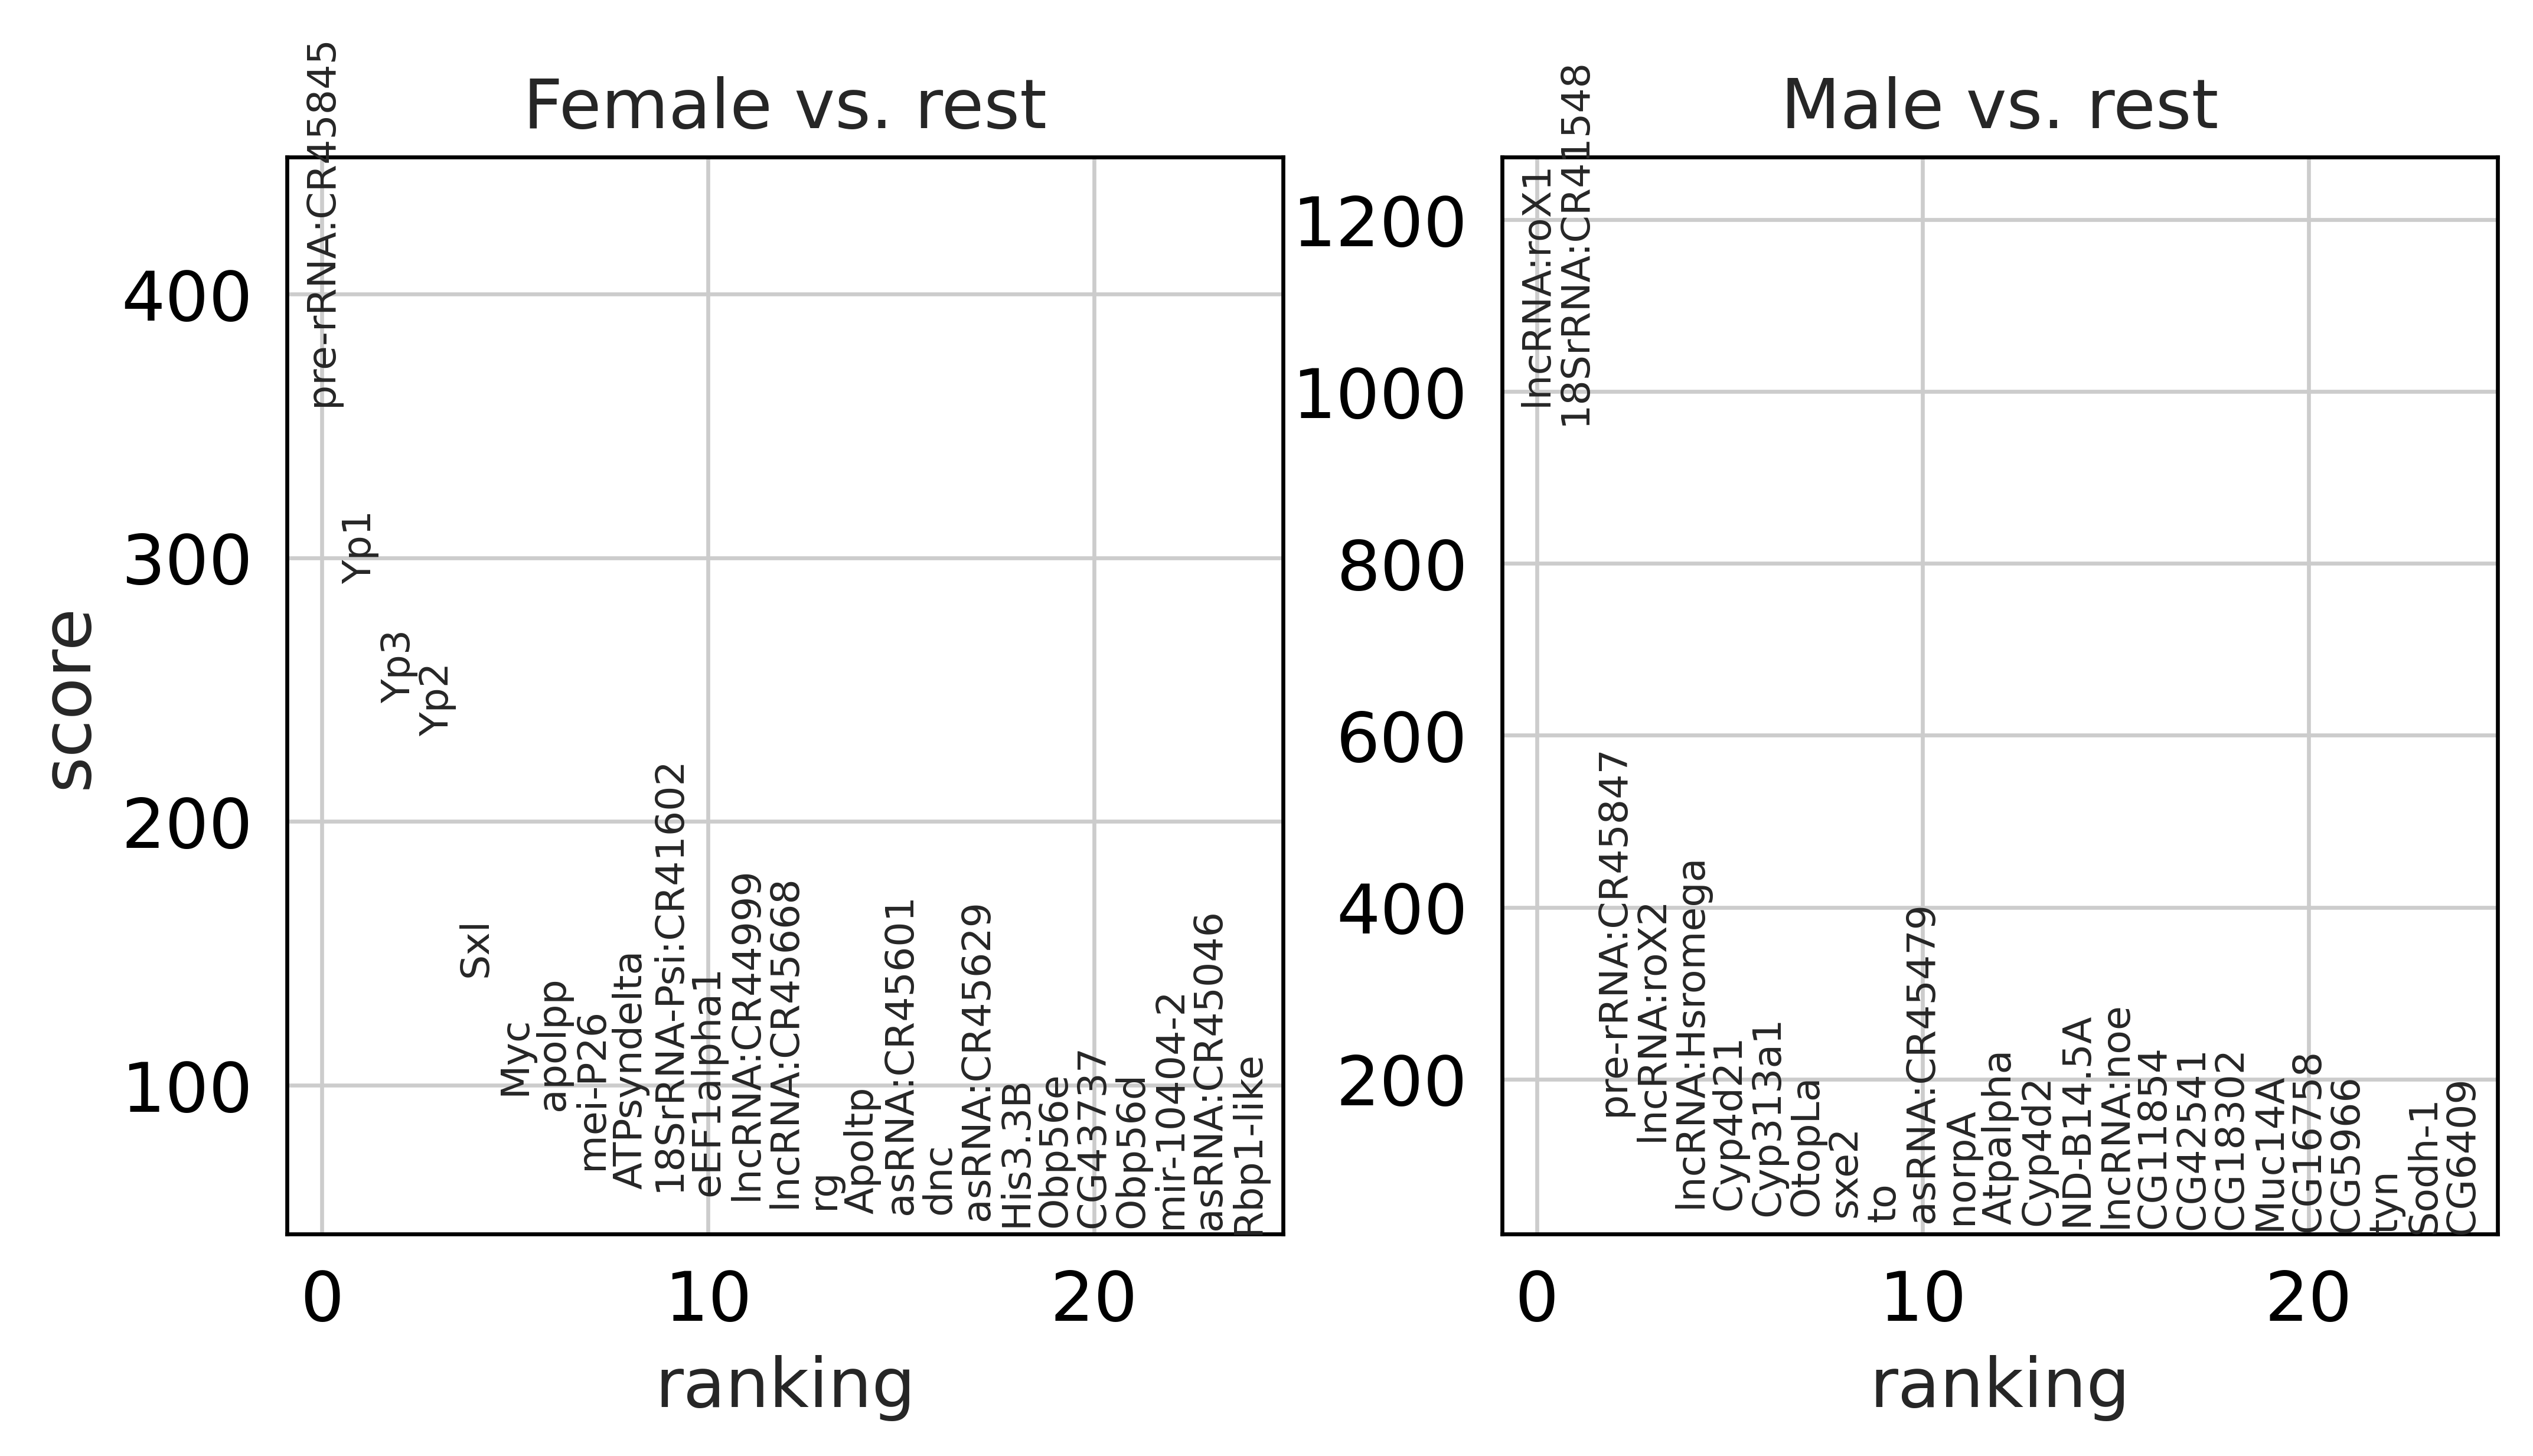

In [109]:
sc.tl.rank_genes_groups(adata, "sex", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [1]:
import pandas as pd
from glob import glob

# Load all outputs
files = glob("pyscenic_output_*.csv")
dfs = [pd.read_csv(file, index_col=0) for file in files]

# Merge by columns
merged = pd.concat(dfs, axis=1)

# Save the merged file
merged.to_csv("merged_pyscenic_output.csv")


# Sexual dimorphism in rhythmic output

In [2]:
WTLD_M = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/WTLD_M_combined.csv")
WTDD_M = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/WTDD_M_combined.csv")
MTLD_M = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/MTLD_M_combined.csv")
MTDD_M = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/MTDD_M_combined.csv")

WTLD_F = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/WTLD_F_combined.csv")
WTDD_F = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/WTDD_F_combined.csv")
MTLD_F = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/MTLD_F_combined.csv")
MTDD_F = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/MTDD_F_combined.csv")

In [4]:
WTLD_M

CycID  meta2d_phase  meta2d_period        p1     phase2  \
0            14-3-3epsilon      3.537324             24  0.000044   3.515209   
1               14-3-3zeta      3.377223             24  0.003390   3.384518   
2          18SrRNA:CR41548      4.370205             24  0.000153   5.355806   
3          18SrRNA:CR45841     15.858702             24  0.003118  16.849279   
4      28SrRNA-Psi:CR40596     21.275770             24  0.002037  21.115547   
...                    ...           ...            ...       ...        ...   
17932                 plum     11.717444             24  0.002396  10.971816   
17933                  rin     11.296602             24  0.000960  11.277111   
17934                  sff     14.627984             24  0.004841  12.860113   
17935                  ths      4.465775             24  0.007433   4.462062   
17936                 trio     10.989711             24  0.034480  11.086262   

       period2            p2     phase3  period3            p3  avg_phase  \
0           24  7.077241e-07   3.516219       24  8.473338e-07   3.522917   
1           24  5.009761e-03   3.347203       24  3.794868e-03   3.369648   
2           24  5.210897e-04   5.358603       24  3.001067e-04   5.028204   
3           24  2.020609e-03  16.824640       24  9.615698e-03  16.510873   
4           24  5.993316e-04  20.952068       24  1.045482e-03  21.114462   
...        ...           ...        ...      ...           ...        ...   
17932       24  1.075134e-02  11.754060       24  1.510095e-03  11.481107   
17933       24  5.603171e-04  11.413750       24  2.510229e-04  11.329154   
17934       24  6.498337e-02  14.614580       24  4.115912e-03  14.034226   
17935       24  4.911147e-02   3.813095       24  2.411536e-02   4.246977   
17936       24  1.294046e-02  10.590203       24  2.575317e-02  10.888725   

       avg_period     avg_p    cell_type  
0              24  0.000015  Unannotated  
1              24  0.004065  Unannotated  
2              24  0.000325  Unannotated  
3              24  0.004918  Unannotated  
4              24  0.001227  Unannotated  
...           ...       ...          ...  
17932          24  0.004886         Tm29  
17933          24  0.000590         Tm29  
17934          24  0.024647         Tm29  
17935          24  0.026887         Tm29  
17936          24  0.024391         Tm29  

[17937 rows x 14 columns]

In [6]:
import pandas as pd
import numpy as np
import os
from glob import glob

# -------------------------------
# Step 1: Load all rhythmicity data
# -------------------------------

# Define the paths for male and female datasets
base_path = "/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/"
conditions = ["WTLD", "WTDD", "MTLD", "MTDD"]

# Load all files into a dictionary
male_files = {cond: pd.read_csv(os.path.join(base_path, f"{cond}_M_combined.csv")) for cond in conditions}
female_files = {cond: pd.read_csv(os.path.join(base_path, f"{cond}_F_combined.csv")) for cond in conditions}

# -------------------------------
# Step 2: Combine and standardize format
# -------------------------------

def clean_df(df, sex, condition):
    df = df.copy()
    df["Sex"] = sex
    df["Condition"] = condition
    df["is_rhythmic"] = df["avg_p"] < 0.05
    return df[["CycID", "cell_type", "avg_phase", "avg_p", "Sex", "Condition", "is_rhythmic"]]

# Combine all data into one dataframe
all_data = []
for cond in conditions:
    all_data.append(clean_df(male_files[cond], "Male", cond))
    all_data.append(clean_df(female_files[cond], "Female", cond))
    
df_all = pd.concat(all_data, ignore_index=True)

# -------------------------------
# Step 3: Pivot for rhythmicity comparison
# -------------------------------

# For each gene-celltype-condition pair, compare rhythmicity status
pivot_df = df_all.pivot_table(
    index=["CycID", "cell_type", "Condition"],
    columns="Sex",
    values="is_rhythmic",
    aggfunc="first"
).reset_index()

# Convert to proper bools
pivot_df['Female'] = pivot_df['Female'].fillna(False).astype(bool)
pivot_df['Male'] = pivot_df['Male'].fillna(False).astype(bool)

# Classify rhythmicity category
def classify_rhythm(row):
    m = row.get("Male", False)
    f = row.get("Female", False)
    if m and f:
        return "Shared"
    elif m and not f:
        return "Male-specific"
    elif not m and f:
        return "Female-specific"
    else:
        return "None"

pivot_df["Rhythmicity_Class"] = pivot_df.apply(classify_rhythm, axis=1)

# -------------------------------
# Save the outputs
# -------------------------------
print(pivot_df.head())  # or display(pivot_df) if you're in a Jupyter notebook
pivot_df.to_csv("rhythmicity_comparison_by_sex.csv", index=False)



/tmp/ipykernel_138909/4211822967.py:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_df['Female'] = pivot_df['Female'].fillna(False).astype(bool)
/tmp/ipykernel_138909/4211822967.py:51: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_df['Male'] = pivot_df['Male'].fillna(False).astype(bool)


Sex          CycID cell_type Condition  Female   Male Rhythmicity_Class
0    14-3-3epsilon       ALG      MTLD   False   True     Male-specific
1    14-3-3epsilon       CHG      MTDD    True  False   Female-specific
2    14-3-3epsilon       CHG      MTLD    True  False   Female-specific
3    14-3-3epsilon      CLKN      MTLD   False   True     Male-specific
4    14-3-3epsilon    CONE-2      MTDD    True  False   Female-specific


In [3]:
pivot_df = pd.read_csv("rhythmicity_comparison_by_sex.csv")

In [8]:
print(pivot_df.head())  # or display(pivot_df) if you're in a Jupyter notebook

           CycID cell_type Condition  Female   Male Rhythmicity_Class
0  14-3-3epsilon       ALG      MTLD   False   True     Male-specific
1  14-3-3epsilon       CHG      MTDD    True  False   Female-specific
2  14-3-3epsilon       CHG      MTLD    True  False   Female-specific
3  14-3-3epsilon      CLKN      MTLD   False   True     Male-specific
4  14-3-3epsilon    CONE-2      MTDD    True  False   Female-specific


In [4]:
# Step 2: Summarize rhythmicity by cell type and class
summary = (
    pivot_df
    .groupby(['cell_type', 'Rhythmicity_Class'])
    .CycID.nunique()
    .reset_index(name='n_genes')
)

# Pivot for easier plotting
summary_pivot = summary.pivot(index='cell_type', columns='Rhythmicity_Class', values='n_genes').fillna(0)

# Check actual column names
print("Columns in summary_pivot:", summary_pivot.columns.tolist())

# Select only those that exist
expected_cols = ['Female-specific', 'Male-specific', 'Shared']
summary_pivot = summary_pivot[[col for col in expected_cols if col in summary_pivot.columns]]


# Preview
print(summary_pivot.head())

# Save
summary_pivot.to_csv("summary_rhythmic_genes_by_cell_type.csv")


Columns in summary_pivot: ['Female-specific', 'Male-specific', 'Shared']
Rhythmicity_Class  Female-specific  Male-specific  Shared
cell_type                                                
AL-PN                        266.0          202.0    11.0
ALG                          429.0          348.0    37.0
AudSN                        103.0           55.0     1.0
C2                           424.0          329.0    12.0
C3                           410.0          350.0    19.0


In [5]:
summary_pivot = pd.read_csv("summary_rhythmic_genes_by_cell_type.csv")

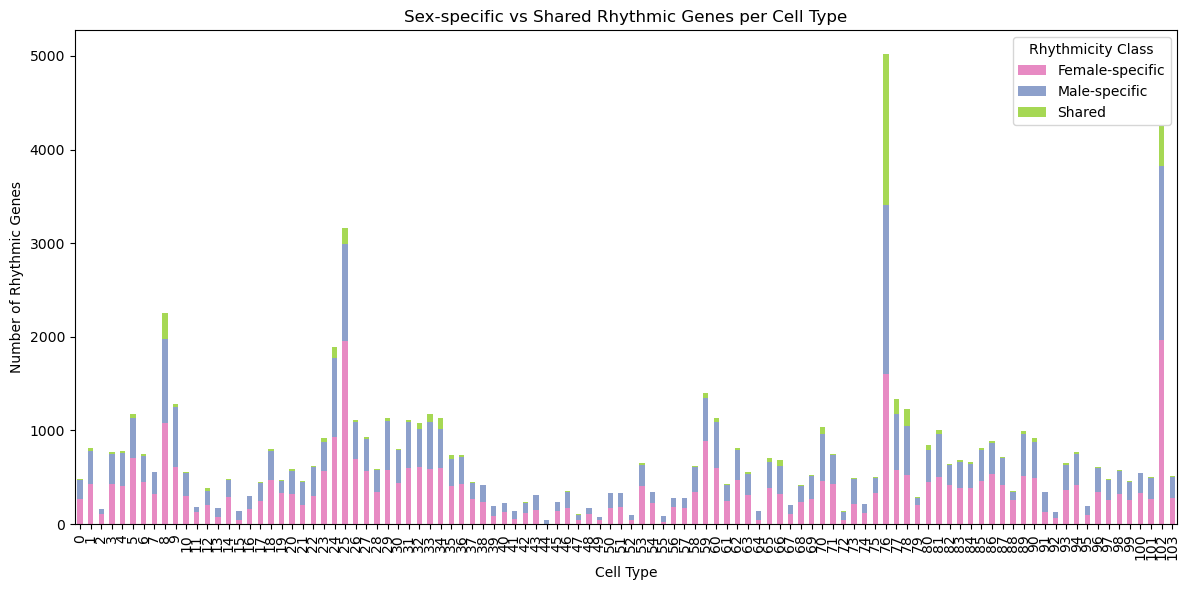

In [6]:
import matplotlib.pyplot as plt

summary_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['#e78ac3', '#8da0cb', '#a6d854']
)

plt.ylabel("Number of Rhythmic Genes")
plt.xlabel("Cell Type")
plt.title("Sex-specific vs Shared Rhythmic Genes per Cell Type")
plt.legend(title="Rhythmicity Class")
plt.tight_layout()
plt.savefig("rhythmicity_barplot_by_celltype.png", dpi=300)
plt.show()


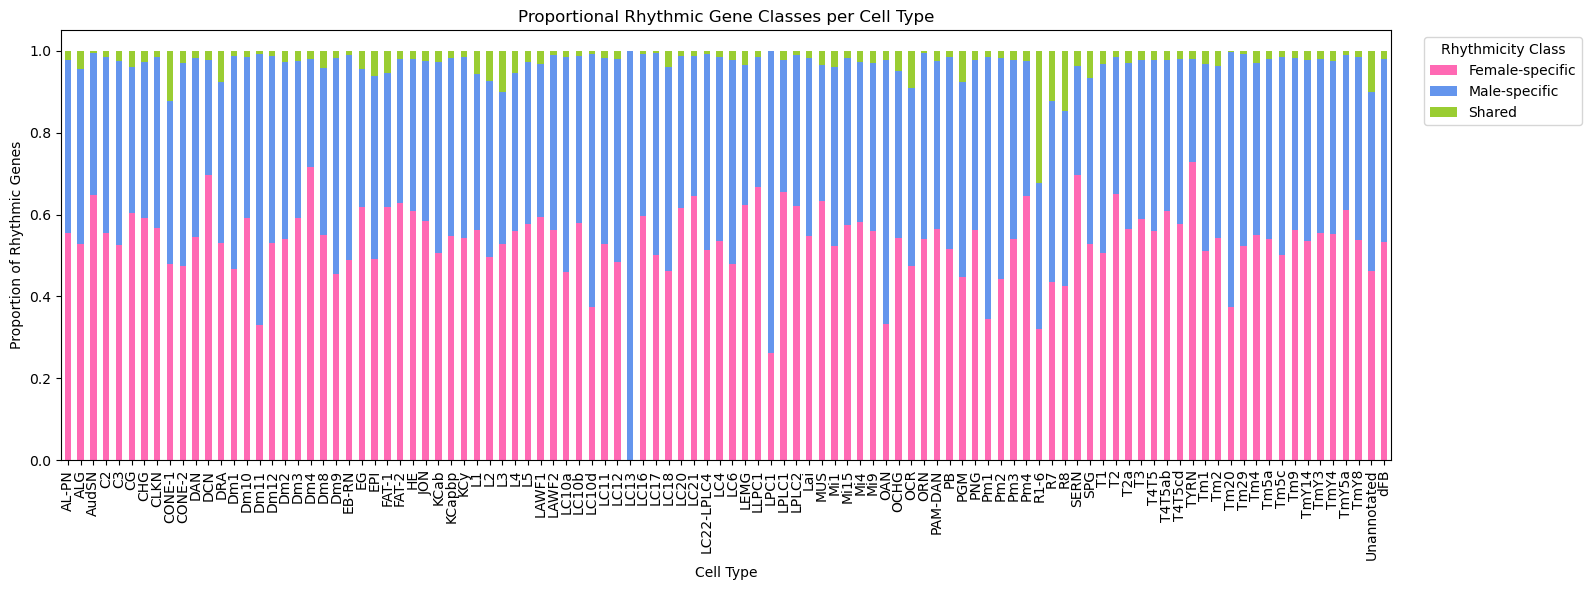

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Reuse the `summary` DataFrame from earlier steps
# Normalize per cell type
summary_norm = summary.copy()
total_per_celltype = summary_norm.groupby('cell_type')['n_genes'].transform('sum')
summary_norm['proportion'] = summary_norm['n_genes'] / total_per_celltype

# Pivot for plotting
summary_norm_pivot = summary_norm.pivot(index='cell_type', columns='Rhythmicity_Class', values='proportion').fillna(0)

# Plot as stacked bar (proportional)
summary_norm_pivot.plot(kind='bar', stacked=True, figsize=(16, 6), color=['hotpink', 'cornflowerblue', 'yellowgreen'])

plt.title('Proportional Rhythmic Gene Classes per Cell Type')
plt.xlabel('Cell Type')
plt.ylabel('Proportion of Rhythmic Genes')
plt.xticks(rotation=90)
plt.legend(title='Rhythmicity Class', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Regenerate summary from pivot_df if available
# Assume pivot_df contains 'Condition', 'cell_type', 'Rhythmicity_Class', 'Gene'

# First check if pivot_df exists
try:
    summary_by_condition = (
        pivot_df
        .groupby(['Condition', 'cell_type', 'Rhythmicity_Class'])['CycID']
        .count()
        .reset_index(name='n_genes')
    )

    # Normalize within each condition and cell_type
    summary_by_condition['total_genes'] = summary_by_condition.groupby(['Condition', 'cell_type'])['n_genes'].transform('sum')
    summary_by_condition['proportion'] = summary_by_condition['n_genes'] / summary_by_condition['total_genes']

except NameError:
    print("Error: `pivot_df` is not defined. Please re-run the cell that generates it.")


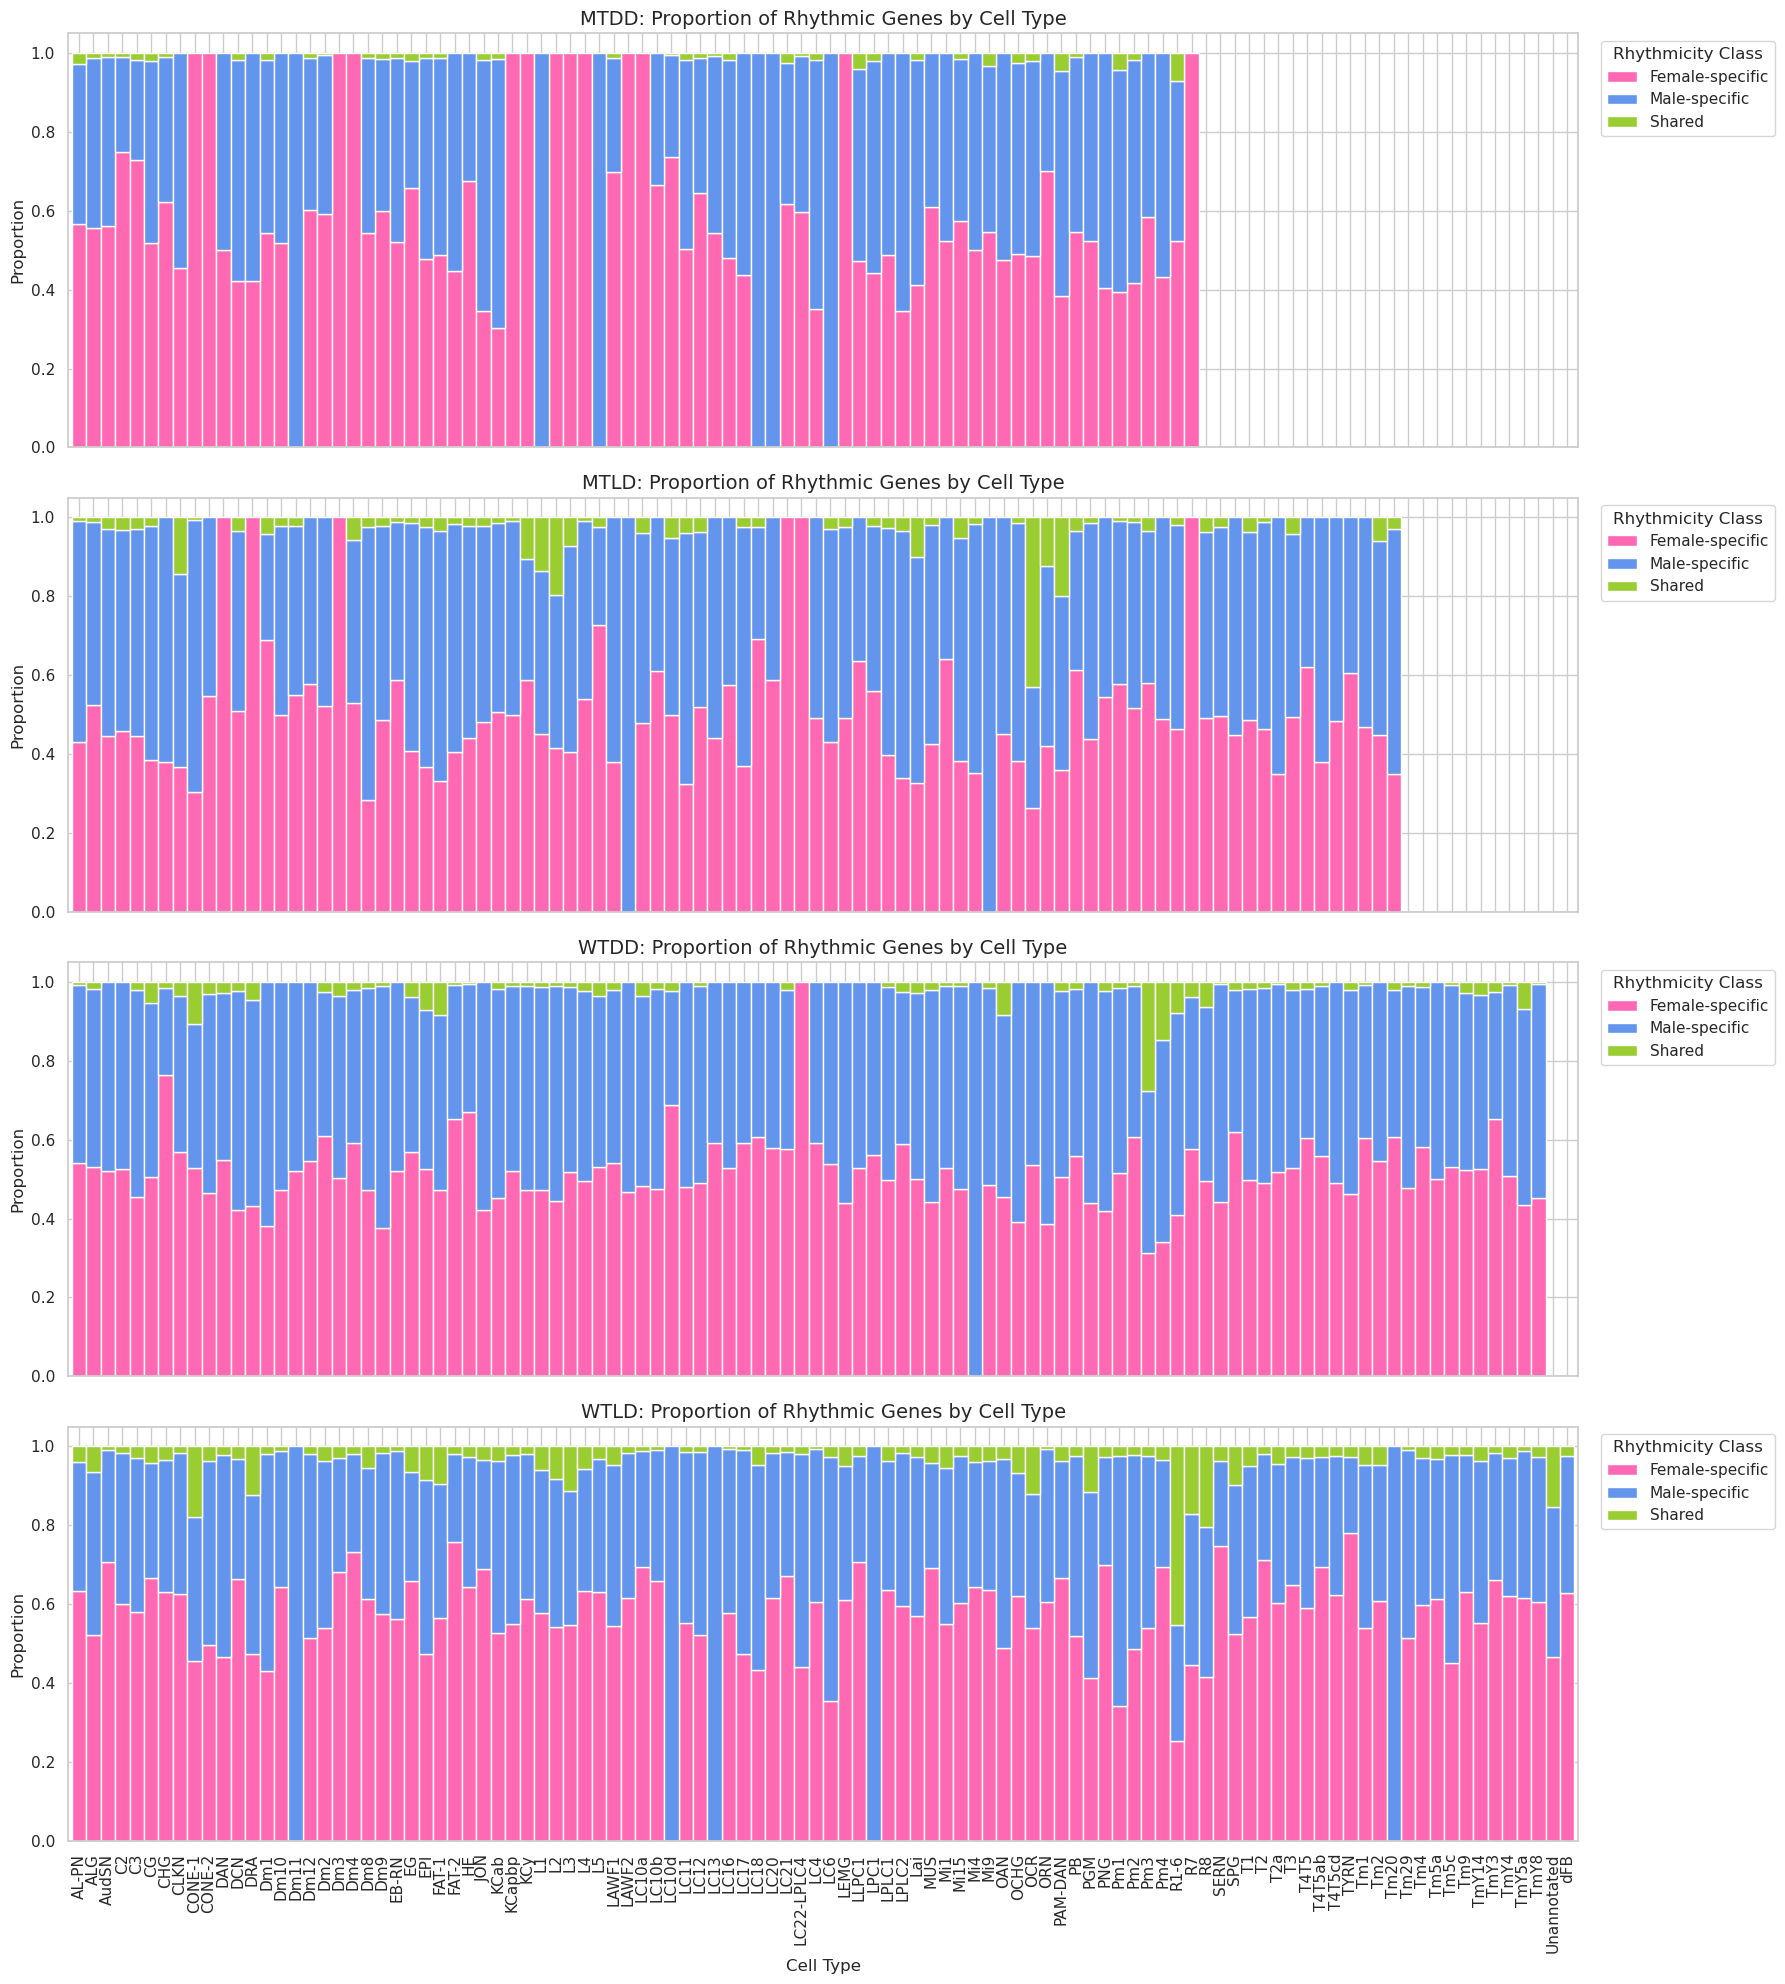

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# We'll reuse the summary_by_condition DataFrame from the previous step

# Define color palette
rhythmicity_palette = {
    "Female-specific": "hotpink",
    "Male-specific": "cornflowerblue",
    "Shared": "yellowgreen"
}

# Set plot style
sns.set(style="whitegrid")
conditions = summary_by_condition["Condition"].unique()

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(18, 20), sharex=True)
for ax, condition in zip(axes, conditions):
    subset = summary_by_condition[summary_by_condition["Condition"] == condition]
    pivot = subset.pivot(index="cell_type", columns="Rhythmicity_Class", values="proportion").fillna(0)
    pivot = pivot[["Female-specific", "Male-specific", "Shared"]]  # consistent order
    pivot.plot(kind="bar", stacked=True, color=[rhythmicity_palette[c] for c in pivot.columns], ax=ax, width=1)

    ax.set_title(f"{condition}: Proportion of Rhythmic Genes by Cell Type", fontsize=14)
    ax.set_ylabel("Proportion")
    ax.legend(title="Rhythmicity Class", bbox_to_anchor=(1.01, 1), loc="upper left")

axes[-1].set_xlabel("Cell Type")
plt.tight_layout()
plt.show()


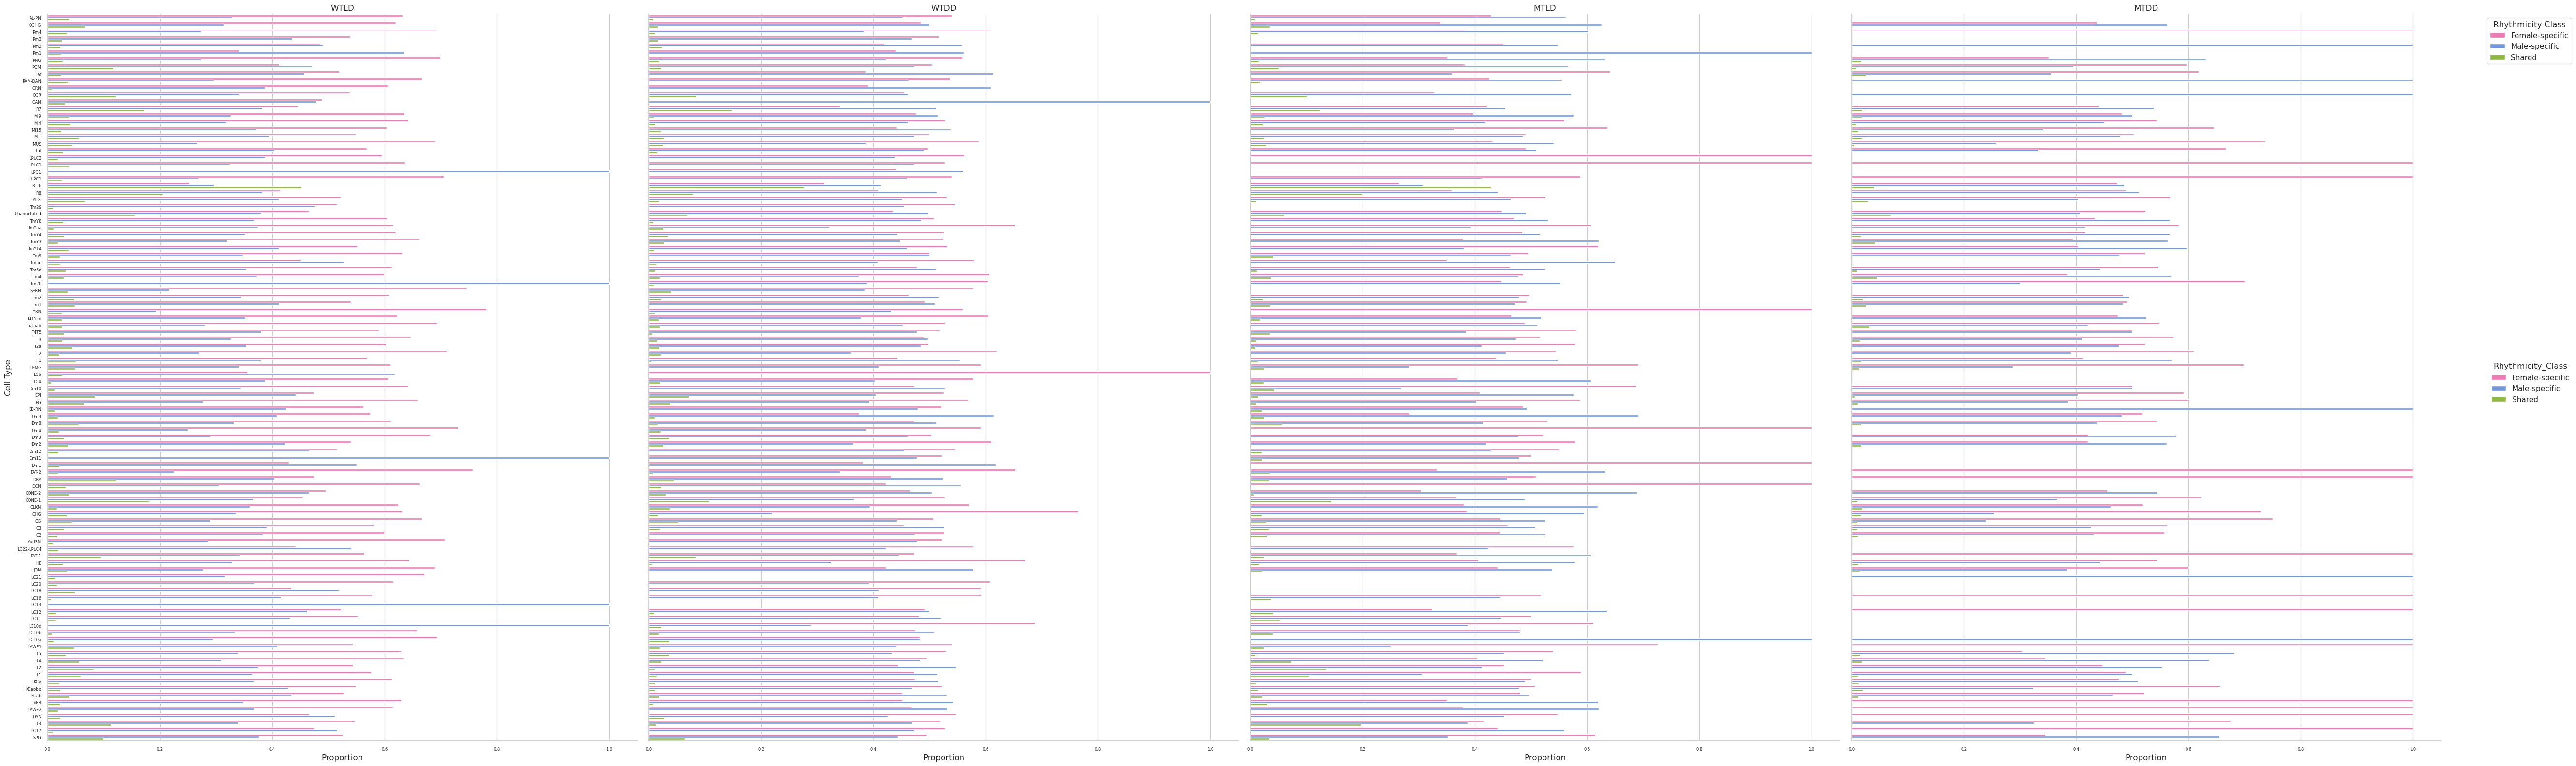

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `summary_by_condition` is already available
# Set plot style
sns.set(style="whitegrid")

# Determine a consistent cell type order based on WTLD
cell_type_order = (
    summary_by_condition[summary_by_condition["Condition"] == "WTLD"]
    .groupby("cell_type")["proportion"]
    .sum()
    .sort_values(ascending=False)
    .index.tolist()
)

# Set up the FacetGrid
g = sns.catplot(
    data=summary_by_condition,
    kind="bar",
    x="proportion",
    y="cell_type",
    hue="Rhythmicity_Class",
    col="Condition",
    col_order=["WTLD", "WTDD", "MTLD", "MTDD"],
    order=cell_type_order,
    height=16,
    aspect=0.8,
    palette={"Female-specific": "hotpink", "Male-specific": "cornflowerblue", "Shared": "yellowgreen"},
    legend_out=True,
    sharex=True,
)

# Adjust plot titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Proportion", "Cell Type")

# Improve layout
for ax in g.axes.flat:
    ax.tick_params(labelsize=6)

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.15, right=0.85)
plt.legend(title="Rhythmicity Class", loc='upper center', bbox_to_anchor=(1.15, 1))
plt.tight_layout()

plt.show()


In [11]:
summary_by_condition = (
    pivot_df
    .groupby(["Condition", "cell_type", "Rhythmicity_Class"])["CycID"]
    .nunique()
    .reset_index(name="n_genes")
)

summary_by_condition['total_genes'] = summary_by_condition.groupby(
    ['Condition', 'cell_type']
)['n_genes'].transform('sum')

summary_by_condition['proportion'] = summary_by_condition['n_genes'] / summary_by_condition['total_genes']


In [17]:
plt.rcParams['figure.dpi'] = 300

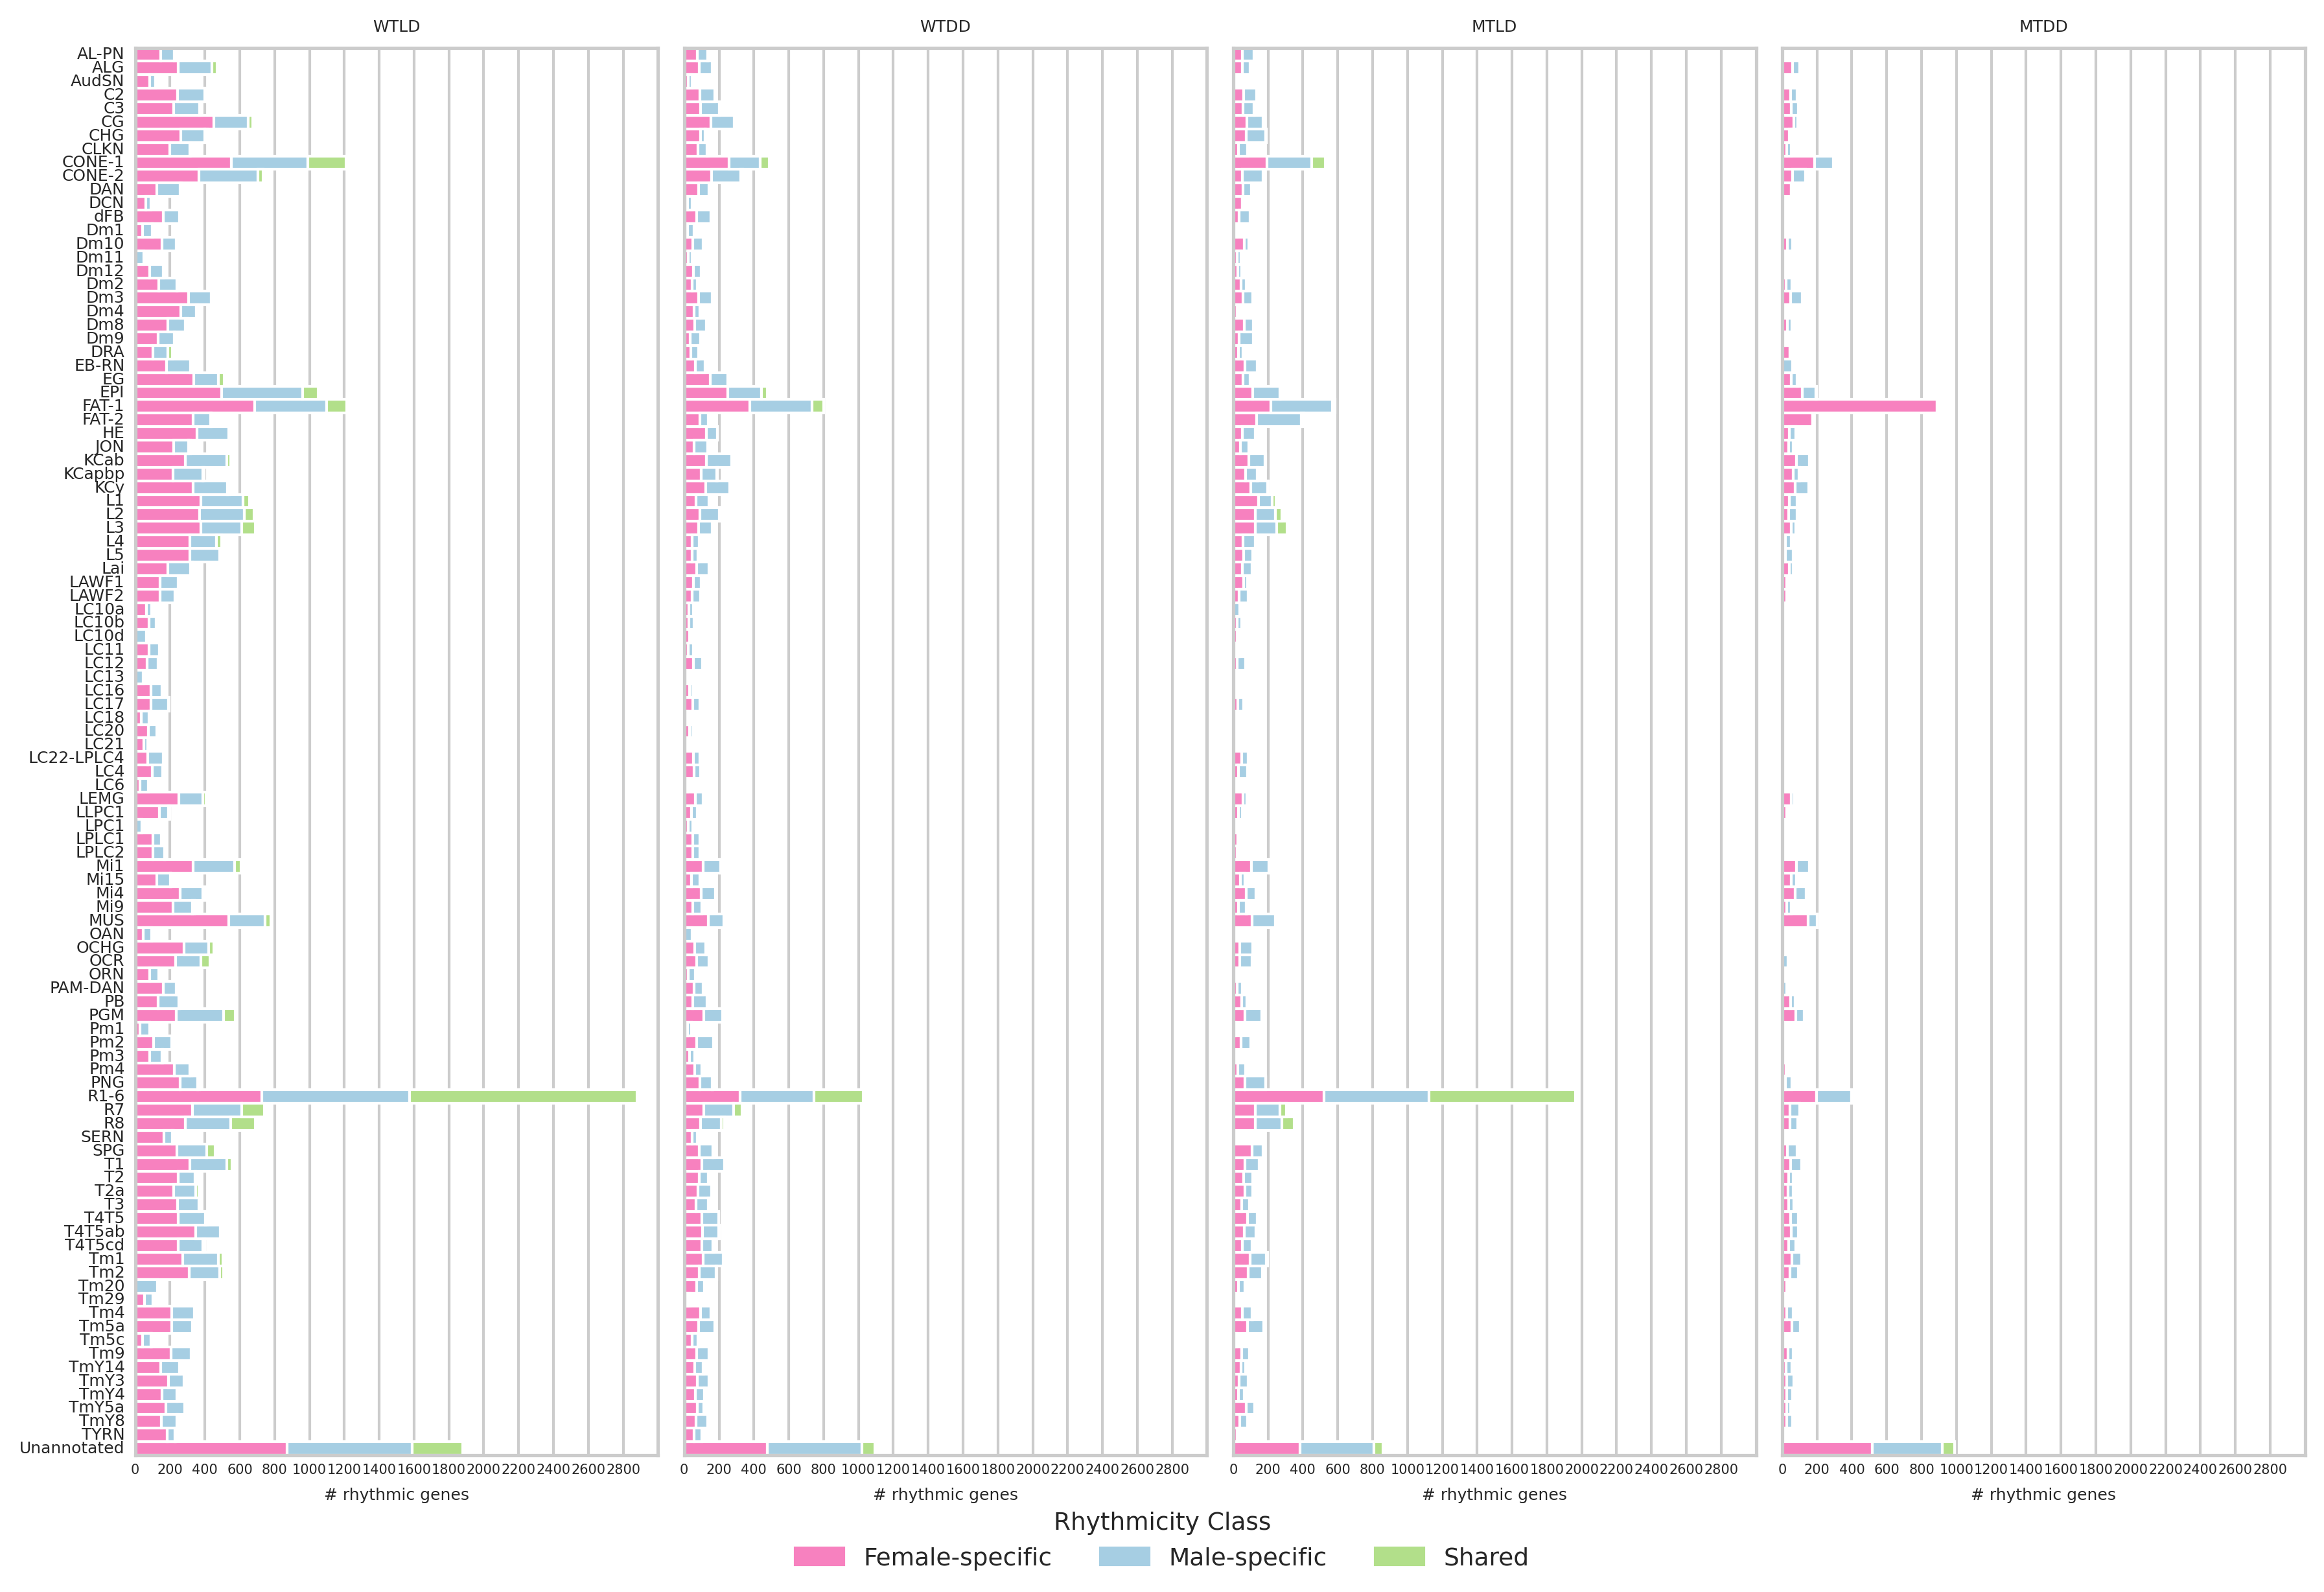

In [20]:
# 1) Build counts (if you haven't already)
counts_pivot = (
    summary_by_condition
    .pivot_table(index=['Condition','cell_type'],
                 columns='Rhythmicity_Class',
                 values='n_genes', fill_value=0)
    .reset_index()
)

rhythm_order = ['Female-specific','Male-specific','Shared']
for r in rhythm_order:
    if r not in counts_pivot.columns:
        counts_pivot[r] = 0

conditions = ['WTLD','WTDD','MTLD','MTDD']
colors = {'Female-specific':'#f781bf','Male-specific':'#a6cee3','Shared':'#b2df8a'}

# consistent row order: case-insensitive A→Z using the WTLD set
cell_type_order = (
    counts_pivot.query("Condition == 'WTLD'")[['cell_type']]
    .drop_duplicates()
    .sort_values('cell_type', key=lambda s: s.str.lower(), ascending = False)
    ['cell_type'].tolist()
)

import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4,
                         figsize=(18, 0.08*len(cell_type_order)),
                         sharey=True)

for i,(ax,cond) in enumerate(zip(axes, conditions)):
    sub = (counts_pivot[counts_pivot['Condition']==cond]
           .set_index('cell_type')
           .reindex(cell_type_order)
           .fillna(0))

    bottoms = np.zeros(len(sub))
    for cat in rhythm_order:
        ax.barh(sub.index, sub[cat], left=bottoms,
                color=colors[cat], height=1,
                label=cat if i==0 else None)
        bottoms += sub[cat].values

    ax.set_title(cond, fontsize=6)
    ax.set_xlabel("# rhythmic genes", fontsize=6)
    ax.set_ylim(-0.5, len(sub)-0.5)
    ax.margins(y=0)

    # --- uniform x-axis ---
    ax.set_xlim(0, 3000)
    ax.set_xticks(np.arange(0, 3000, 200))
    ax.tick_params(axis='x', labelsize=5, length=2, pad=1)

    # first column: draw labels manually
    if i == 0:
        ax.set_yticks([])
        for y, lab in enumerate(sub.index):
            ax.text(-0.02, y, lab,
                    transform=ax.get_yaxis_transform(),
                    ha='right', va='center', fontsize=6)
    else:
        ax.set_yticks([])

# legend
handles = [plt.Rectangle((0,0),1,1,color=colors[c]) for c in rhythm_order]
fig.legend(handles, rhythm_order, title="Rhythmicity Class",
           loc='lower center', ncol=3, frameon=False, fontsize=9, title_fontsize=9)

fig.subplots_adjust(left=0.36, right=0.98, top=0.95, bottom=0.08, wspace=0.05)
plt.show()


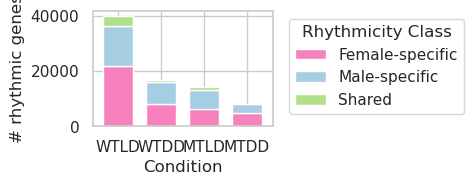

In [21]:
summary_totals = (
    summary_by_condition
    .groupby(['Condition', 'Rhythmicity_Class'])['n_genes']
    .sum()
    .reset_index()
    .pivot(index='Condition', columns='Rhythmicity_Class', values='n_genes')
    .fillna(0)
)

# Reorder
summary_totals = summary_totals.loc[conditions, rhythm_order]

# Plot
summary_totals.plot(kind='bar', stacked=True, color=[colors[r] for r in rhythm_order],
                    figsize=(5,2), width=0.7)

plt.ylabel("# rhythmic genes")
plt.xticks(rotation=0)
plt.legend(title="Rhythmicity Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


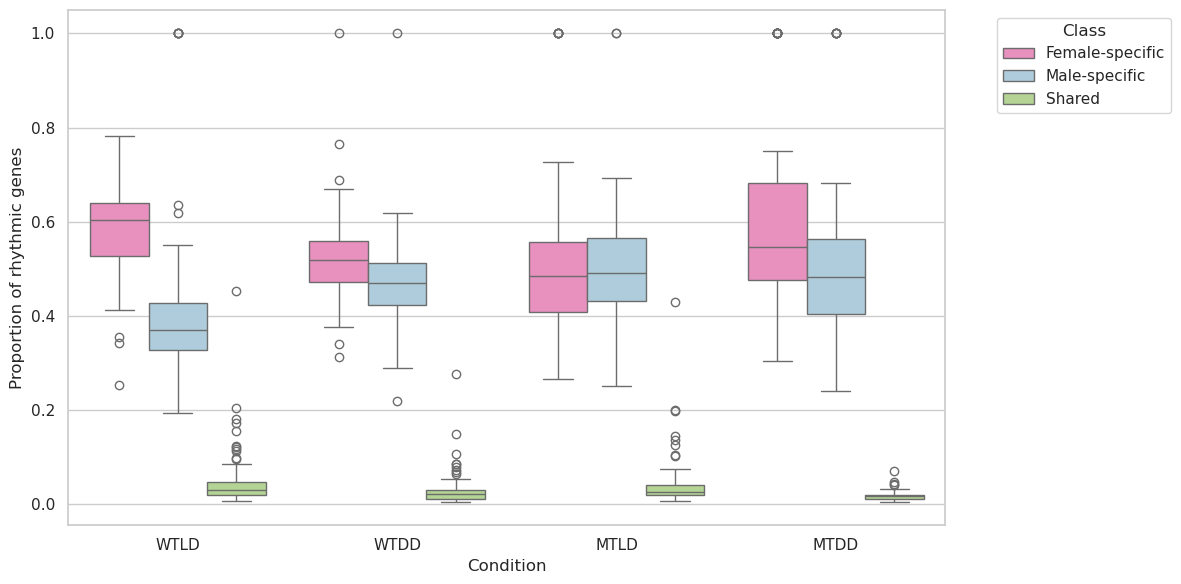

In [22]:
import seaborn as sns

# Pre-format
plot_df = summary_by_condition.copy()
plot_df['proportion'] = plot_df['n_genes'] / plot_df.groupby(['Condition', 'cell_type'])['n_genes'].transform('sum')

# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=plot_df, x='Condition', y='proportion', hue='Rhythmicity_Class',
            order=conditions, hue_order=rhythm_order, palette=colors)

plt.ylabel("Proportion of rhythmic genes")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


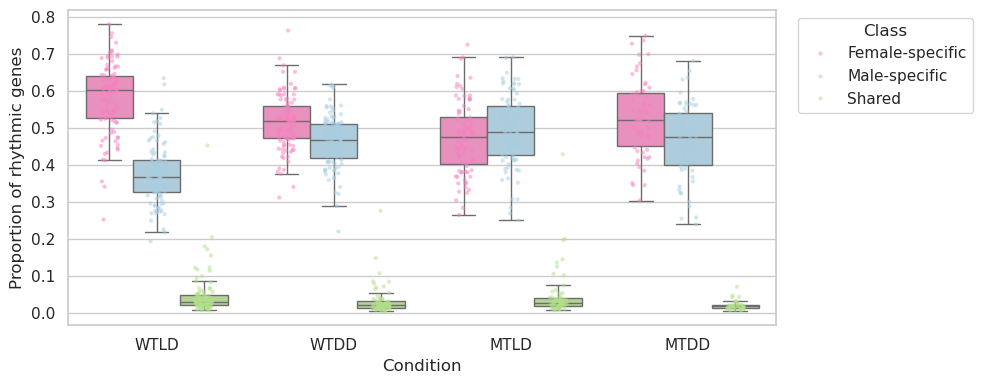

In [23]:
# Remove perfect-1 points (and optionally near-1)
filtered = plot_df[plot_df['proportion'] < 0.999]   # or == 1.0 if you want strict

# (Optional) also require a minimum total gene count to avoid tiny denominators
# filtered = filtered[filtered['total_genes'] >= 10]

plt.figure(figsize=(10,4))
sns.boxplot(data=filtered, x='Condition', y='proportion', hue='Rhythmicity_Class',
            order=conditions, hue_order=rhythm_order, palette=colors,
            showfliers=False)

sns.stripplot(data=filtered, x='Condition', y='proportion', hue='Rhythmicity_Class',
              order=conditions, hue_order=rhythm_order, palette=colors,
              dodge=True, jitter=0.15, alpha=0.5, size=3, linewidth=0)

# Clean up duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Class",
           bbox_to_anchor=(1.02, 1), loc="upper left")

plt.ylabel("Proportion of rhythmic genes")
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
from itertools import combinations
from scipy.stats import chi2_contingency, fisher_exact
from statsmodels.stats.multitest import multipletests

# collapse to counts per condition
agg = (summary_by_condition
       .assign(is_shared=lambda d: d['Rhythmicity_Class']=='Shared')
       .groupby('Condition')
       .apply(lambda g: pd.Series({
           'shared'    : g.loc[g.is_shared, 'n_genes'].sum(),
           'non_shared': g.loc[~g.is_shared, 'n_genes'].sum()
       }))
       .loc[['WTLD','WTDD','MTLD','MTDD']]    # enforce order if you want
)

# global
chi2, p_global, dof, exp = chi2_contingency(agg.values)

# pairwise
rows=[]
for a,b in combinations(agg.index, 2):
    table = agg.loc[[a,b], ['shared','non_shared']].values
    OR, p = fisher_exact(table)
    rows.append((a,b,OR,p))
pair_df = pd.DataFrame(rows, columns=['cond1','cond2','odds_ratio','p_raw'])
pair_df['p_adj'] = multipletests(pair_df['p_raw'], method='fdr_bh')[1]



/tmp/ipykernel_138909/2368982790.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


In [25]:
letters = {'WTLD':'a', 'MTLD':'a', 'WTDD':'b', 'MTDD':'b'}  # based on p_adj
for i, cond in enumerate(agg.index):
    y = agg.loc[cond,'shared'] + agg.loc[cond,'non_shared']  # top of bar (counts)
    ax.text(i, y*1.01, letters[cond], ha='center', va='bottom', fontsize=8)


In [26]:
from scipy.stats import chi2_contingency, fisher_exact
from itertools import combinations
from statsmodels.stats.multitest import multipletests

# global
chi2, p_global, dof, exp = chi2_contingency(agg.values)

# pairwise
rows=[]
for a,b in combinations(agg.index, 2):
    table = agg.loc[[a,b], ['shared','non_shared']].values
    OR, p = fisher_exact(table)
    rows.append((a,b,OR,p))
pair_df = pd.DataFrame(rows, columns=['cond1','cond2','odds_ratio','p_raw'])
pair_df['p_adj'] = multipletests(pair_df['p_raw'], method='fdr_bh')[1]


           pair     p_raw     p_adj
1  (WTLD, MTLD)  0.005456  0.016368
3  (WTDD, MTLD)  0.005294  0.016368
4  (WTDD, MTDD)  0.008391  0.016781
2  (WTLD, MTDD)  0.011909  0.017864
0  (WTLD, WTDD)  0.680763  0.816915
5  (MTLD, MTDD)  0.916160  0.916160


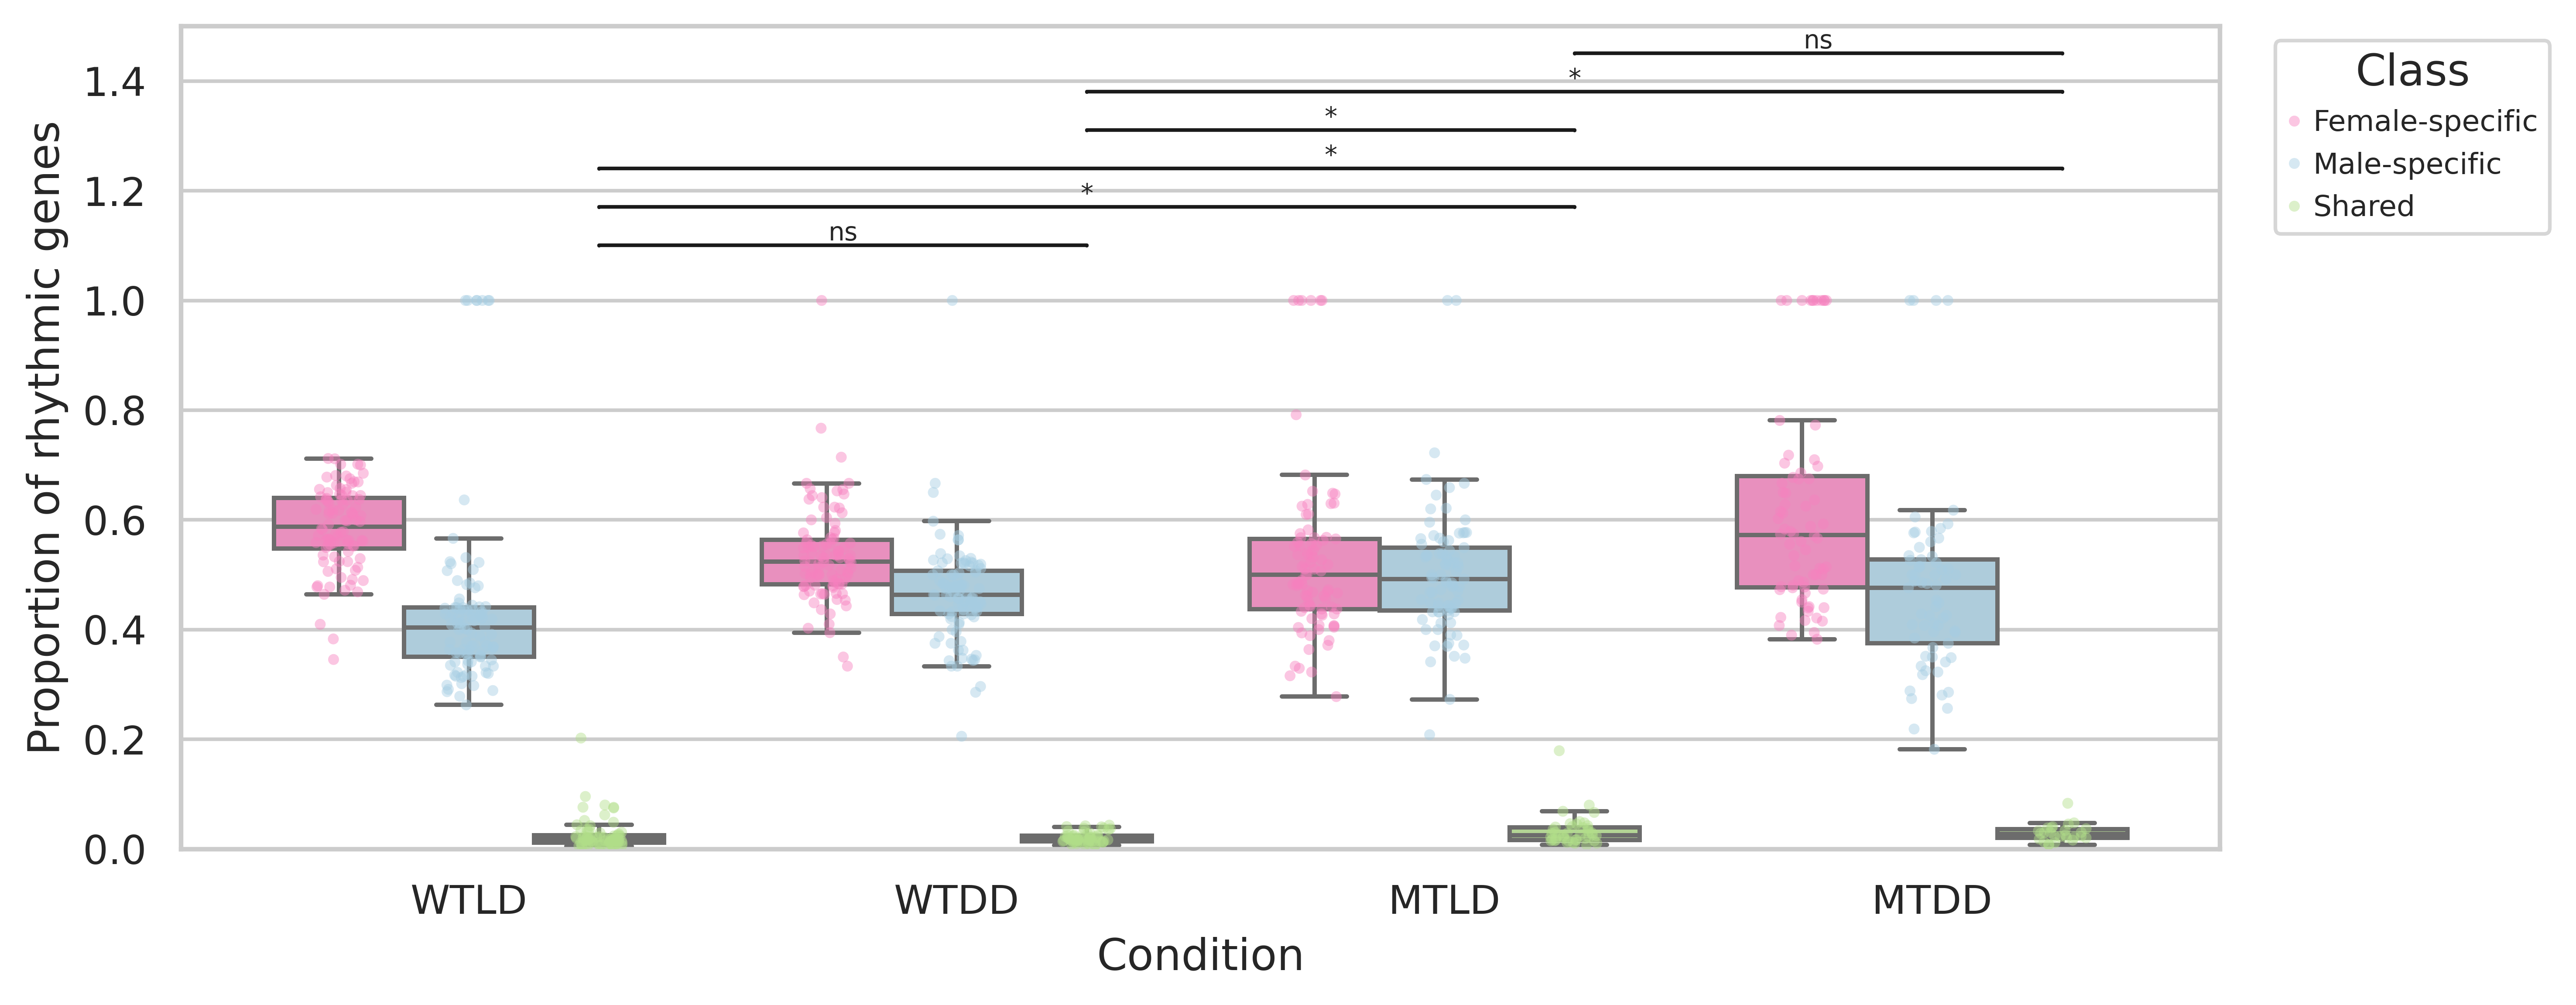

In [37]:
# show just those two pairs from the stats table we built
stats_tbl.query("(cond1=='WTLD' & cond2=='MTLD') or (cond1=='WTDD' & cond2=='MTDD')")


NameError: name 'stats_tbl' is not defined

  cond1 cond2         p_raw     p_adj
2  WTLD  MTDD  9.624550e-07  0.000006
5  MTLD  MTDD  1.220789e-04  0.000366
0  WTLD  WTDD  2.244013e-04  0.000449
3  WTDD  MTLD  1.098111e-02  0.016472
4  WTDD  MTDD  8.926321e-02  0.107116
1  WTLD  MTLD  4.467783e-01  0.446778


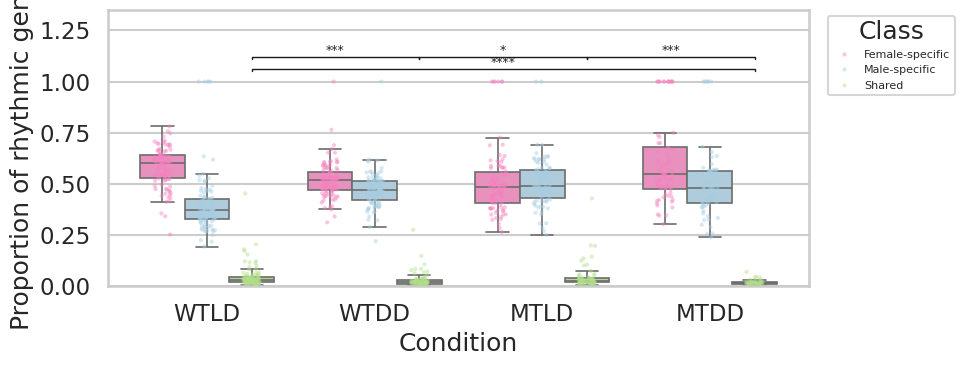

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# -------------------------------------------------
# Assumes you already have `summary_by_condition`
#   with columns: Condition, cell_type, Rhythmicity_Class, n_genes
# If not, build it from your pivot_df as you did before.
# -------------------------------------------------

# ---- prep long df with proportions for plotting ----
conditions   = ['WTLD','WTDD','MTLD','MTDD']
hue_order    = ['Female-specific','Male-specific','Shared']
colors       = {'Female-specific':'#f781bf',
                'Male-specific'   :'#a6cee3',
                'Shared'          :'#b2df8a'}

plot_df = summary_by_condition.copy()
plot_df['proportion'] = (
    plot_df['n_genes'] /
    plot_df.groupby(['Condition','cell_type'])['n_genes'].transform('sum')
)

# -------------------------------------------------
# 1) Stats on SHARED only
# -------------------------------------------------
df_shared = plot_df.query("Rhythmicity_Class == 'Shared'").copy()

# drop exact 1.0 (optional; comment out if you want to keep them)
df_shared = df_shared[df_shared['proportion'] < 1.0]

pairs, pvals = [], []
for a, b in combinations(conditions, 2):
    xa = df_shared.loc[df_shared.Condition == a, 'proportion'].dropna()
    xb = df_shared.loc[df_shared.Condition == b, 'proportion'].dropna()
    if len(xa) == 0 or len(xb) == 0:
        continue
    # if all values identical, mannwhitneyu crashes; skip
    if np.allclose(xa, xa.iloc[0]) and np.allclose(xb, xb.iloc[0]):
        continue
    U, p = mannwhitneyu(xa, xb, alternative='two-sided')
    pairs.append((a, b))
    pvals.append(p)

# FDR correction
p_adj = multipletests(pvals, method='fdr_bh')[1]
stats_tbl = pd.DataFrame({'cond1':[a for a,b in pairs],
                          'cond2':[b for a,b in pairs],
                          'p_raw':pvals,
                          'p_adj':p_adj})
print(stats_tbl.sort_values('p_adj'))

def p2stars(p):
    if   p < 1e-4: return "****"
    elif p < 1e-3: return "***"
    elif p < 1e-2: return "**"
    elif p < 0.05: return "*"
    else:          return "ns"

# keep only significant
sig_tbl = stats_tbl[stats_tbl.p_adj < 0.05].copy()
sig_tbl['stars'] = sig_tbl.p_adj.map(p2stars)

# -------------------------------------------------
# 2) Plot all classes + annotate only Shared pairs
# -------------------------------------------------
sns.set(style='whitegrid', context='talk')

fig, ax = plt.subplots(figsize=(10,4))

# boxplots
sns.boxplot(data=plot_df, x='Condition', y='proportion',
            hue='Rhythmicity_Class',
            order=conditions, hue_order=hue_order,
            palette=colors, showfliers=False,
            linewidth=1.2, ax=ax)

# points
sns.stripplot(data=plot_df, x='Condition', y='proportion',
              hue='Rhythmicity_Class',
              order=conditions, hue_order=hue_order,
              palette=colors, dodge=True, jitter=0.15,
              alpha=0.45, size=3, linewidth=0, ax=ax)

# clean legend duplicates
handles, labels = ax.get_legend_handles_labels()
by_lab = dict(zip(labels, handles))
ax.legend(by_lab.values(), by_lab.keys(), title="Class",
          bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8)

ax.set_ylabel("Proportion of rhythmic genes")

# ---------- positions of Shared boxes ----------
n_hue = len(hue_order)
boxw  = 0.8 / n_hue
shared_pos = hue_order.index('Shared')
x_shared = [i - 0.4 + boxw*(shared_pos + 0.5) for i,_ in enumerate(conditions)]

# ---------- annotate ----------
ymax   = plot_df['proportion'].max()
ax.set_ylim(0, ymax*1.35)

bar_h  = ymax*0.01      # bar thickness height
step   = ymax*0.06      # vertical spacing
base_y = ymax*1.05

# simple no-overlap stacker
levels = []
def next_level(x1, x2):
    lvl = 0
    while any((x1 < b and x2 > a) for a,b,_ in levels if _ == lvl):
        lvl += 1
    return lvl

for _, r in sig_tbl.sort_values('p_adj').iterrows():
    x1 = x_shared[conditions.index(r.cond1)]
    x2 = x_shared[conditions.index(r.cond2)]
    x1, x2 = sorted([x1, x2])

    lvl = next_level(x1, x2)
    y   = base_y + lvl*step

    ax.plot([x1, x1, x2, x2],
            [y,  y+bar_h, y+bar_h, y],
            lw=1, c='k')
    ax.text((x1+x2)/2, y+bar_h*1.2, r.stars,
            ha='center', va='bottom', fontsize=9)

    levels.append((x1, x2, lvl))

plt.tight_layout()
plt.show()


In [28]:
import numpy as np
import pandas as pd

# -------------------------------------------------
# Params (tune as you like)
# -------------------------------------------------
MIN_TOTAL = 50  # ≥ N total rhythmic genes per (Condition, cell_type)
MIN_CLASS = {   # ≥ k genes in each class to keep that proportion
    'Female-specific': 10,
    'Male-specific'  : 10,
    'Shared'         : 5
}
conditions   = ['WTLD','WTDD','MTLD','MTDD']
rhythm_order = ['Female-specific','Male-specific','Shared']

# -------------------------------------------------
# Start from summary_by_condition (Condition, cell_type, Rhythmicity_Class, n_genes)
# -------------------------------------------------
# Wide counts table: rows = (Condition, cell_type); cols = classes
wide = (summary_by_condition
        .pivot_table(index=['Condition','cell_type'],
                     columns='Rhythmicity_Class',
                     values='n_genes',
                     fill_value=0)
        .reindex(columns=rhythm_order, fill_value=0))

# Total rhythmic genes
wide['total'] = wide.sum(axis=1)

# -------------------------------------------------
# 1) Drop cell types that fail total threshold in *every* condition
# -------------------------------------------------
totals_per_cell = wide['total'].groupby(level='cell_type')
drop_these_cells = totals_per_cell.transform(lambda s: (s >= MIN_TOTAL).any()).eq(False)
# mask rows to drop (True = drop)
wide = wide[~drop_these_cells.values]

# -------------------------------------------------
# 2) Compute proportions, but set to NaN when thresholds fail
# -------------------------------------------------
# mask for total threshold (per row)
mask_total_ok = wide['total'] >= MIN_TOTAL

# masks for each class threshold
mask_class_ok = {cls: (wide[cls] >= MIN_CLASS[cls]) for cls in rhythm_order}

# proportions
for cls in rhythm_order:
    prop_col = f'prop_{cls}'
    wide[prop_col] = wide[cls] / wide['total'].replace(0, np.nan)
    # set to NaN if total OR class threshold fails
    wide.loc[~mask_total_ok | ~mask_class_ok[cls], prop_col] = np.nan

# -------------------------------------------------
# 3) Melt back to long form for plotting like before
# -------------------------------------------------
plot_df_filtered = (
    wide.reset_index()
    .melt(id_vars=['Condition','cell_type','total'] + rhythm_order,
          value_vars=[f'prop_{c}' for c in rhythm_order],
          var_name='prop_col', value_name='proportion')
)

# Clean up class name
plot_df_filtered['Rhythmicity_Class'] = plot_df_filtered['prop_col'].str.replace('prop_','')
plot_df_filtered = plot_df_filtered[['Condition','cell_type','Rhythmicity_Class','proportion',
                                     'total'] + rhythm_order]

# -------------------------------------------------
# (Optional) quick sanity checks
# -------------------------------------------------
print("Rows before filtering:", len(summary_by_condition.drop_duplicates(['Condition','cell_type'])))
print("Rows after filtering :", plot_df_filtered[['Condition','cell_type']].drop_duplicates().shape[0])
print("\nDropped cell types (all conditions < MIN_TOTAL):")
dropped_cells = drop_these_cells.groupby(level='cell_type').first()
print(dropped_cells[dropped_cells].index.tolist())

# How many NaNs now?
print("\nNaN proportions per class:")
print(plot_df_filtered.groupby(['Condition','Rhythmicity_Class'])['proportion'].apply(lambda x: x.isna().sum()))

# -------------------------------------------------
# Now just reuse your plotting code, but with plot_df_filtered
# -------------------------------------------------


Rows before filtering: 376
Rows after filtering : 375

Dropped cell types (all conditions < MIN_TOTAL):
['LC13']

NaN proportions per class:
Condition  Rhythmicity_Class
MTDD       Female-specific      20
           Male-specific        22
           Shared               76
MTLD       Female-specific      13
           Male-specific        14
           Shared               72
WTDD       Female-specific      10
           Male-specific        10
           Shared               84
WTLD       Female-specific       4
           Male-specific         1
           Shared               32
Name: proportion, dtype: int64


In [29]:
kept_counts = (plot_df_filtered
               .groupby('Condition')['cell_type']
               .nunique())
print(kept_counts)


Condition
MTDD     78
MTLD     92
WTDD    102
WTLD    103
Name: cell_type, dtype: int64


  cond1 cond2         p_raw     p_adj
2  WTLD  MTDD  9.624550e-07  0.000006
5  MTLD  MTDD  1.220789e-04  0.000366
0  WTLD  WTDD  2.244013e-04  0.000449
3  WTDD  MTLD  1.098111e-02  0.016472
4  WTDD  MTDD  8.926321e-02  0.107116
1  WTLD  MTLD  4.467783e-01  0.446778


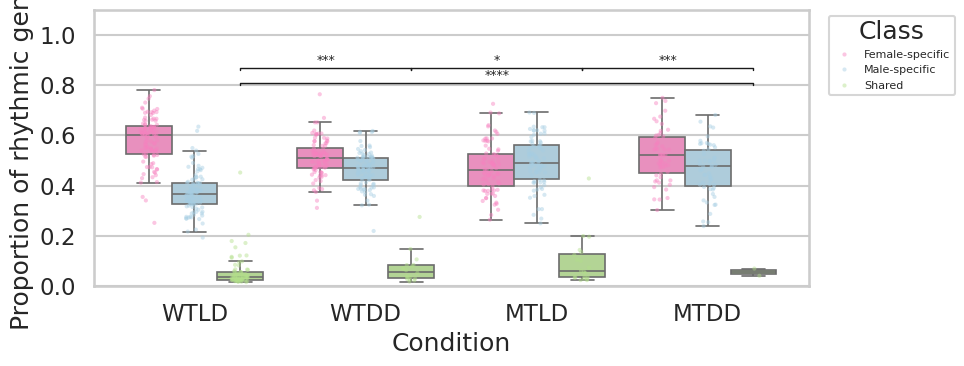

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# -------------------------------------------------
# Assumes you already have `summary_by_condition`
#   with columns: Condition, cell_type, Rhythmicity_Class, n_genes
# If not, build it from your pivot_df as you did before.
# -------------------------------------------------

# ---- prep long df with proportions for plotting ----
conditions   = ['WTLD','WTDD','MTLD','MTDD']
hue_order    = ['Female-specific','Male-specific','Shared']
colors       = {'Female-specific':'#f781bf',
                'Male-specific'   :'#a6cee3',
                'Shared'          :'#b2df8a'}

plot_df = summary_by_condition.copy()
plot_df['proportion'] = (
    plot_df['n_genes'] /
    plot_df.groupby(['Condition','cell_type'])['n_genes'].transform('sum')
)

# -------------------------------------------------
# 1) Stats on SHARED only
# -------------------------------------------------
#df_shared = plot_df.query("Rhythmicity_Class == 'Shared'").copy()

# drop exact 1.0 (optional; comment out if you want to keep them)
df_shared = df_shared[df_shared['proportion'] < 1.0]

pairs, pvals = [], []
for a, b in combinations(conditions, 2):
    xa = df_shared.loc[df_shared.Condition == a, 'proportion'].dropna()
    xb = df_shared.loc[df_shared.Condition == b, 'proportion'].dropna()
    if len(xa) == 0 or len(xb) == 0:
        continue
    # if all values identical, mannwhitneyu crashes; skip
    if np.allclose(xa, xa.iloc[0]) and np.allclose(xb, xb.iloc[0]):
        continue
    U, p = mannwhitneyu(xa, xb, alternative='two-sided')
    pairs.append((a, b))
    pvals.append(p)

# FDR correction
p_adj = multipletests(pvals, method='fdr_bh')[1]
stats_tbl = pd.DataFrame({'cond1':[a for a,b in pairs],
                          'cond2':[b for a,b in pairs],
                          'p_raw':pvals,
                          'p_adj':p_adj})
print(stats_tbl.sort_values('p_adj'))

def p2stars(p):
    if   p < 1e-4: return "****"
    elif p < 1e-3: return "***"
    elif p < 1e-2: return "**"
    elif p < 0.05: return "*"
    else:          return "ns"

# keep only significant
sig_tbl = stats_tbl[stats_tbl.p_adj < 0.05].copy()
sig_tbl['stars'] = sig_tbl.p_adj.map(p2stars)

# -------------------------------------------------
# 2) Plot all classes + annotate only Shared pairs
# -------------------------------------------------
sns.set(style='whitegrid', context='talk')

fig, ax = plt.subplots(figsize=(10,4))

plot_df_filtered = plot_df_filtered[plot_df_filtered['proportion'] < 1.0]

# boxplots
sns.boxplot(data=plot_df_filtered, x='Condition', y='proportion',
            hue='Rhythmicity_Class',
            order=conditions, hue_order=hue_order,
            palette=colors, showfliers=False,
            linewidth=1.2, ax=ax)

# points
sns.stripplot(data=plot_df_filtered, x='Condition', y='proportion',
              hue='Rhythmicity_Class',
              order=conditions, hue_order=hue_order,
              palette=colors, dodge=True, jitter=0.15,
              alpha=0.45, size=3, linewidth=0, ax=ax)

# clean legend duplicates
handles, labels = ax.get_legend_handles_labels()
by_lab = dict(zip(labels, handles))
ax.legend(by_lab.values(), by_lab.keys(), title="Class",
          bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8)

ax.set_ylabel("Proportion of rhythmic genes")

# ---------- positions of Shared boxes ----------
n_hue = len(hue_order)
boxw  = 0.8 / n_hue
shared_pos = hue_order.index('Shared')
x_shared = [i - 0.4 + boxw*(shared_pos + 0.5) for i,_ in enumerate(conditions)]

# ---------- annotate ----------
ymax   = plot_df['proportion'].max()
ax.set_ylim(0, ymax*1.10)

bar_h  = ymax*0.01      # bar thickness height
step   = ymax*0.06      # vertical spacing
base_y = ymax*0.80

# simple no-overlap stacker
levels = []
def next_level(x1, x2):
    lvl = 0
    while any((x1 < b and x2 > a) for a,b,_ in levels if _ == lvl):
        lvl += 1
    return lvl

for _, r in sig_tbl.sort_values('p_adj').iterrows():
    x1 = x_shared[conditions.index(r.cond1)]
    x2 = x_shared[conditions.index(r.cond2)]
    x1, x2 = sorted([x1, x2])

    lvl = next_level(x1, x2)
    y   = base_y + lvl*step

    ax.plot([x1, x1, x2, x2],
            [y,  y+bar_h, y+bar_h, y],
            lw=1, c='k')
    ax.text((x1+x2)/2, y+bar_h*1.2, r.stars,
            ha='center', va='bottom', fontsize=9)

    levels.append((x1, x2, lvl))

plt.tight_layout()
plt.show()


In [31]:
from itertools import combinations
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import numpy as np
import pandas as pd

conditions   = ['WTLD','WTDD','MTLD','MTDD']
rhythm_order = ['Female-specific','Male-specific','Shared']

# Use the filtered proportions (drop exact 1.0 if you want)
df_for_tests = plot_df_filtered.copy()
df_for_tests = df_for_tests[df_for_tests['proportion'] < 1.0]

tests = []
for cls in rhythm_order:
    sub = df_for_tests[df_for_tests['Rhythmicity_Class'] == cls]
    for a, b in combinations(conditions, 2):
        xa = sub.loc[sub.Condition == a, 'proportion'].dropna()
        xb = sub.loc[sub.Condition == b, 'proportion'].dropna()
        # skip if one side empty
        if len(xa) == 0 or len(xb) == 0:
            continue
        # if all values identical in both groups, mannwhitneyu will warn; just skip or set p=1
        if (len(xa) > 0 and len(xb) > 0 and
            np.allclose(xa, xa.iloc[0]) and np.allclose(xb, xb.iloc[0])):
            p = 1.0
            U = np.nan
        else:
            U, p = mannwhitneyu(xa, xb, alternative='two-sided')
        tests.append({
            'Class': cls,
            'cond1': a,
            'cond2': b,
            'n1': len(xa),
            'n2': len(xb),
            'U': U,
            'p_raw': p
        })

test_df = pd.DataFrame(tests)

# Adjust across all tests (more conservative)
test_df['p_adj'] = multipletests(test_df['p_raw'], method='fdr_bh')[1]

def p2stars(p):
    if   p < 1e-4: return "****"
    elif p < 1e-3: return "***"
    elif p < 1e-2: return "**"
    elif p < 0.05: return "*"
    else:          return "ns"

test_df['stars'] = test_df['p_adj'].apply(p2stars)

# Neat sorting
test_df = (test_df
           .sort_values(['Class','p_adj','cond1','cond2'])
           .reset_index(drop=True))

print(test_df)


              Class cond1 cond2  n1  n2       U         p_raw         p_adj  \
0   Female-specific  WTLD  MTLD  99  78  6152.0  1.307665e-11  7.845989e-11   
1   Female-specific  WTLD  WTDD  99  92  6752.0  8.586700e-09  3.864015e-08   
2   Female-specific  WTLD  MTDD  99  55  3689.5  2.679863e-04  8.039588e-04   
3   Female-specific  WTDD  MTLD  92  78  4625.0  1.189666e-03  3.059140e-03   
4   Female-specific  MTLD  MTDD  78  55  1530.5  5.026612e-03  1.130988e-02   
5   Female-specific  WTDD  MTDD  92  55  2391.0  5.792883e-01  6.951460e-01   
6     Male-specific  WTLD  MTLD  99  78  1293.0  3.292983e-14  4.009374e-13   
7     Male-specific  WTLD  WTDD  99  92  1672.5  4.454860e-14  4.009374e-13   
8     Male-specific  WTLD  MTDD  99  55  1299.5  8.143246e-08  2.931569e-07   
9     Male-specific  WTDD  MTLD  92  78  2801.5  1.397226e-02  2.794451e-02   
10    Male-specific  MTLD  MTDD  78  55  2511.5  9.447505e-02  1.545955e-01   
11    Male-specific  WTDD  MTDD  92  55  2512.0  9.4

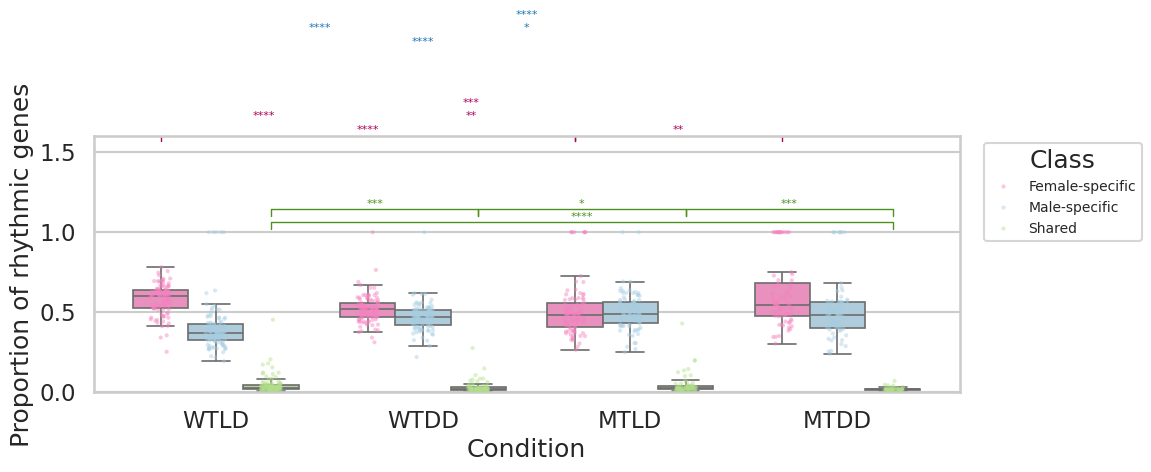

In [32]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# -------------------------------------------------
# CONFIG
# -------------------------------------------------
conditions  = ['WTLD','WTDD','MTLD','MTDD']
classes     = ['Female-specific','Male-specific','Shared']
palette     = {'Female-specific':'#f781bf', 'Male-specific':'#a6cee3', 'Shared':'#b2df8a'}

def p2stars(p):
    return "****" if p < 1e-4 else "***" if p < 1e-3 else "**" if p < 1e-2 else "*" if p < 0.05 else "ns"

# -------------------------------------------------
# 1) (Re)compute pairwise tests for all 3 classes
# -------------------------------------------------
stats_rows = []
for cls in classes:
    sub = plot_df[plot_df['Rhythmicity_Class']==cls].copy()
    # Optionally drop exact 1.0’s
    sub = sub[sub['proportion']<1.0]
    for a,b in combinations(conditions,2):
        xa = sub.loc[sub.Condition==a,'proportion'].dropna()
        xb = sub.loc[sub.Condition==b,'proportion'].dropna()
        if len(xa)==0 or len(xb)==0: continue
        if np.allclose(xa, xa.iloc[0]) and np.allclose(xb, xb.iloc[0]):  # all identical
            continue
        U,p = mannwhitneyu(xa, xb, alternative='two-sided')
        stats_rows.append([cls,a,b,len(xa),len(xb),U,p])

test_df = pd.DataFrame(stats_rows,
                       columns=['Class','cond1','cond2','n1','n2','U','p_raw'])

# FDR within each class (or across all – pick one)
test_df['p_adj'] = (test_df.groupby('Class')['p_raw']
                    .transform(lambda v: multipletests(v, method='fdr_bh')[1]))
test_df['stars'] = test_df['p_adj'].map(p2stars)

# keep only significant pairs if you want less clutter
sig_df = test_df[test_df['p_adj']<0.05].copy()

# -------------------------------------------------
# 2) Plot the box/strip and annotate with separated bands
# -------------------------------------------------
sns.set(style='whitegrid', context='talk')
fig, ax = plt.subplots(figsize=(14,6))  # bigger canvas

# main box/strip
sns.boxplot(data=plot_df, x='Condition', y='proportion',
            hue='Rhythmicity_Class', order=conditions, hue_order=classes,
            palette=palette, showfliers=False, linewidth=1.2, ax=ax)
sns.stripplot(data=plot_df, x='Condition', y='proportion',
              hue='Rhythmicity_Class', order=conditions, hue_order=classes,
              palette=palette, dodge=True, jitter=0.15,
              alpha=0.45, size=3, linewidth=0, ax=ax)

# clean legend duplicates
handles, labels = ax.get_legend_handles_labels()
by_lab = dict(zip(labels, handles))
ax.legend(by_lab.values(), by_lab.keys(), title="Class",
          bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=10)

ax.set_ylabel("Proportion of rhythmic genes")

# ------- x positions of each class’ boxes --------
n_hue      = len(classes)
box_width  = 0.8 / n_hue
x_pos = {}
for idx, cls in enumerate(classes):
    x_pos[cls] = [i - 0.4 + box_width*(idx + 0.5) for i,_ in enumerate(conditions)]

# ------- annotation helper (stack bars w/out overlap) -------
def annotate_pairs(ax, pairs_df, cls, base_y, step, bar_h=0.01, color='k', fontsize=9):
    """
    Draw brackets for one class in its own horizontal band.
    base_y: starting y for that class' band
    step  : vertical spacing between brackets inside that band
    """
    # restrict to this class
    sub = pairs_df[pairs_df['Class']==cls].sort_values('p_adj')
    if sub.empty: return

    # keep only sig if you want
    # sub = sub[sub['p_adj']<0.05]

    levels = []  # keep track of placed (x1,x2,level)
    def next_level(x1,x2):
        lvl=0
        # bump level until there's no overlap
        while any((x1 < b and x2 > a) and L==lvl for a,b,L in levels):
            lvl+=1
        return lvl

    for _,row in sub.iterrows():
        x1 = x_pos[cls][conditions.index(row['cond1'])]
        x2 = x_pos[cls][conditions.index(row['cond2'])]
        if x2 < x1: x1,x2 = x2,x1

        lvl = next_level(x1,x2)
        y   = base_y + lvl*step

        ax.plot([x1, x1, x2, x2],
                [y,  y+bar_h, y+bar_h, y],
                lw=1, c=color)
        ax.text((x1+x2)/2, y+bar_h*1.0, row['stars'],
                ha='center', va='bottom', fontsize=fontsize, color=color)
        levels.append((x1,x2,lvl))

# ------- give each class its own top band -------
ymax = plot_df['proportion'].max()
top_room = 0.60          # % of space above the data for annotations
ax.set_ylim(0, ymax*(1+top_room))

band_height = ymax*0.50  # height allotted to each class' brackets
gap          = ymax*0.05 # empty gap between bands

# bands in order top→bottom (so "Shared" can sit highest if crowded)
band_order   = ['Shared','Female-specific','Male-specific']  # change if you want
colors_band  = {'Female-specific':'#b30059',
                'Male-specific'   :'#1f78b4',
                'Shared'          :'#4d9221'}  # darker versions for bars

current_base = ymax*1.02
for cls in band_order:
    annotate_pairs(ax, sig_df, cls,
                   base_y=current_base,
                   step=band_height/6,  # internal ladder
                   bar_h=band_height/12,
                   color=colors_band[cls],
                   fontsize=8)
    current_base += band_height + gap

plt.tight_layout(rect=[0,0,0.85,1])  # leave room for legend
plt.show()


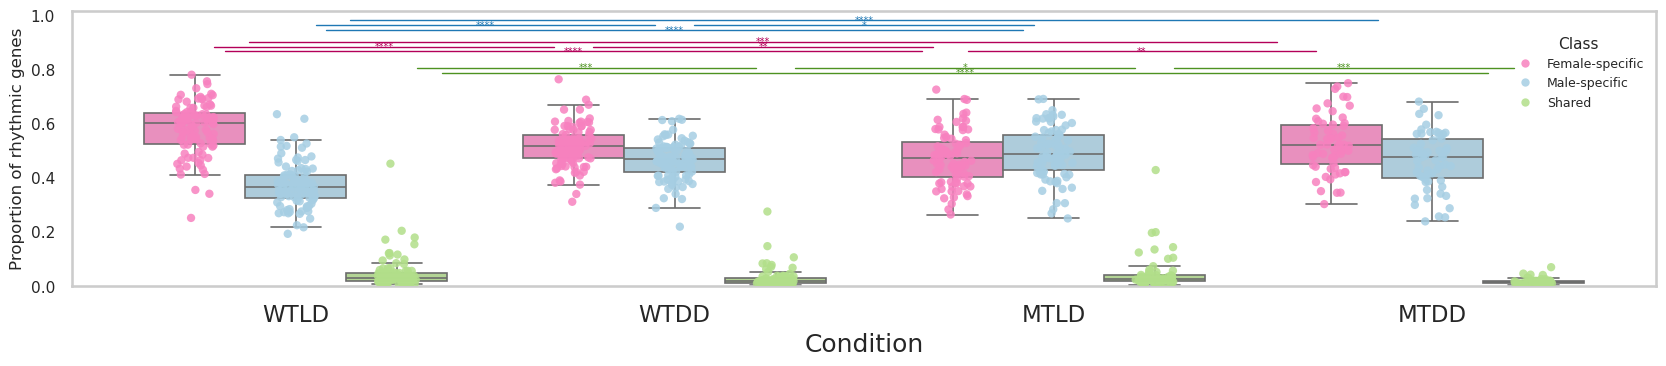

In [33]:
# drop exact 1.0 proportions so they never get plotted as dots or fliers
plot_df = plot_df[plot_df['proportion'] < 1.0]


# ---------- helpers ----------
def p2stars(p):
    return "****" if p < 1e-4 else "***" if p < 1e-3 else "**" if p < 1e-2 else "*" if p < 0.05 else "ns"

def annotate_pairs(ax, pairs_df, cls, x_pos_cls,
                   base_y, step, bar_h,
                   color='k', fontsize=8,
                   star_frac=.9,
                   shrink_frac=0.04,    # % of span trimmed from each side
                   level_pad=0.01):     # extra trim per stacked level
    """
    Draw non-overlapping brackets for one class.
    shrink_frac:    trim proportion of (x2-x1) from BOTH ends
    level_pad:      extra absolute trim added per level to separate stacked bars
    """
    sub = pairs_df[pairs_df['Class']==cls].sort_values('p_adj')
    if sub.empty: 
        return

    levels = []  # store (x1,x2,level)
    def next_level(a,b):
        lvl = 0
        while any((a < B and b > A) and L == lvl for A,B,L in levels):
            lvl += 1
        return lvl

    for _, r in sub.iterrows():
        x1 = x_pos_cls[conditions.index(r.cond1)]
        x2 = x_pos_cls[conditions.index(r.cond2)]
        if x2 < x1:
            x1, x2 = x2, x1

        lvl = next_level(x1, x2)

        # shorten the bracket
        span = x2 - x1
        trim = span * shrink_frac + lvl * level_pad
        x1s, x2s = x1 + trim, x2 - trim

        y = base_y + lvl * step
        ax.plot([x1s, x1s, x2s, x2s],
                [y,    y+bar_h, y+bar_h, y],
                lw=1, c=color, zorder=3)

        star_y = y + bar_h*star_frac
        ax.text((x1s+x2s)/2, star_y, p2stars(r.p_adj),
                ha='center', va='center', fontsize=fontsize,
                color=color, zorder=4, clip_on=False)

        levels.append((x1, x2, lvl))


# ---------- plot ----------
sns.set(style='whitegrid', context='talk')
fig, ax = plt.subplots(figsize=(20,4))
ax.grid(False)
sns.boxplot(data=plot_df, x='Condition', y='proportion',
            hue='Rhythmicity_Class', order=conditions, hue_order=classes,
            palette=palette, showfliers=False, linewidth=1.2, ax=ax)
sns.stripplot(data=plot_df, x='Condition', y='proportion',
              hue='Rhythmicity_Class', order=conditions, hue_order=classes,
              palette=palette, dodge=True, jitter=0.15,
              alpha=0.85, linewidth=0, ax=ax, zorder = 3, size = 6, edgecolor='k')

# tidy legend
h,l = ax.get_legend_handles_labels()
by = dict(zip(l,h))
ax.legend(by.values(), by.keys(), title="Class",
          bbox_to_anchor=(1.02,1), loc='upper left', fontsize=9)

ax.set_ylabel("Proportion of rhythmic genes")

# tighten up the legend
leg = ax.legend(
    by.values(), by.keys(),
    title="Class",
    fontsize=9,         # tick labels inside legend
    title_fontsize=11,   # legend title
    loc="upper right",  # put it inside the axes
    bbox_to_anchor=(1, 0.95),
    frameon=False
)

# shrink the y‐axis label and tick labels
ax.set_ylabel("Proportion of rhythmic genes", fontsize=12)
ax.tick_params(axis='y', labelsize=11)

# x positions for each hue
n_hue     = len(classes)
box_w     = 0.8 / n_hue
x_pos = {cls: [i - 0.4 + box_w*(j+0.5) for i,_ in enumerate(conditions)]
         for j,cls in enumerate(classes)}

# reserve headroom
ymax = plot_df['proportion'].max()
pad         = 0.30          # headroom
ax.set_ylim(0, ymax*(1+pad))

# small bands & spacing
band_height = ymax*0.07   # thin bands
step        = band_height/3
bar_h       = band_height/10
bar_h       = 0
gap         = ymax*0.03

band_order  = ['Shared', 'Female-specific', 'Male-specific']
band_color  = {'Female-specific':'#b30059',
               'Male-specific'   :'#1f78b4',
               'Shared'          :'#4d9221'}

current_base = ymax*1.01
for cls in band_order:
    annotate_pairs(ax, sig_df, cls, x_pos[cls],
                   base_y=current_base,
                   step=step, bar_h=bar_h,
                   color=band_color[cls], fontsize=7,
                   shrink_frac=0.04, level_pad=0.012)
    current_base += band_height + gap


plt.tight_layout(rect=[0,0,0.85,1])
plt.show()


In [63]:
import scanpy as sc

In [64]:
sc.set_figure_params(dpi = 300)

In [66]:
plot_df 

Condition    cell_type Rhythmicity_Class  n_genes  total_genes  proportion
0        MTDD          ALG   Female-specific       32           62    0.516129
1        MTDD          ALG     Male-specific       30           62    0.483871
2        MTDD           C2   Female-specific       22           46    0.478261
3        MTDD           C2     Male-specific       24           46    0.521739
4        MTDD           C3   Female-specific       36           70    0.514286
..        ...          ...               ...      ...          ...         ...
904      WTLD  Unannotated   Female-specific      234          416    0.562500
905      WTLD  Unannotated     Male-specific      168          416    0.403846
906      WTLD  Unannotated            Shared       14          416    0.033654
907      WTLD          dFB   Female-specific       62          111    0.558559
908      WTLD          dFB     Male-specific       49          111    0.441441

[877 rows x 6 columns]

In [34]:
# 1) Compute the means
avg = (
    plot_df
    .groupby(['Condition','Rhythmicity_Class'])['proportion']
    .mean()
    .reset_index(name='mean_prop')
)

# 2) (Optional) Pivot to a wide table
wide_avg = avg.pivot(index='Condition',
                     columns='Rhythmicity_Class',
                     values='mean_prop')

print(wide_avg)


Rhythmicity_Class  Female-specific  Male-specific    Shared
Condition                                                  
MTDD                      0.525008       0.462105  0.019009
MTLD                      0.473130       0.492648  0.046365
WTDD                      0.513823       0.463978  0.030410
WTLD                      0.581184       0.373494  0.045322


In [51]:
summary_by_condition = (
    pivot_df
    .groupby(["Condition", "cell_type", "Rhythmicity_Class"])["CycID"]
    .nunique()
    .reset_index(name="n_genes")
)
summary_by_condition['total_genes'] = summary_by_condition.groupby(
    ['Condition', 'cell_type']
)['n_genes'].transform('sum')
summary_by_condition['proportion'] = (
    summary_by_condition['n_genes'] / summary_by_condition['total_genes']
)
shared_summary = summary_by_condition.query("Rhythmicity_Class == 'Shared'")

# Pivot to make WTLD vs MTLD side-by-side
shared_pivot = shared_summary.pivot_table(
    index="cell_type",
    columns="Condition",
    values="proportion"
).reset_index()

print(shared_pivot.head())


Condition cell_type      MTDD      MTLD      WTDD      WTLD
0             AL-PN       NaN  0.008264  0.007299  0.038462
1               ALG  0.028846  0.010309  0.018293  0.065817
2             AudSN       NaN       NaN       NaN  0.008621
3                C2  0.011364  0.029197       NaN  0.017199
4                C3  0.010417  0.032787  0.019324  0.028796


WTLD shared count: 2223
MTLD shared count: 1119


In [66]:

# Filter for "Shared" rhythmicity class
shared_wtld = set(
    pivot_df.query("Condition == 'WTLD' and Rhythmicity_Class == 'Shared'")['CycID']
)

shared_mtld = set(
    pivot_df.query("Condition == 'MTLD' and Rhythmicity_Class == 'Shared'")['CycID']
)

print(f"WTLD shared count: {len(shared_wtld)}")
print(f"MTLD shared count: {len(shared_mtld)}")

# Intersection and union
intersection = shared_wtld & shared_mtld
union = shared_wtld | shared_mtld

overlap_count = len(intersection)
jaccard_index = overlap_count / len(union) if len(union) > 0 else 0

print(f"Overlap count: {overlap_count}")
print(f"Union count: {len(union)}")
print(f"Jaccard index: {jaccard_index:.3f}")


WTLD shared count: 2223
MTLD shared count: 1119
Overlap count: 821
Union count: 2521
Jaccard index: 0.326


In [62]:
# Filter for "Shared" rhythmicity class
shared_wtld = set(
    pivot_df.query("Condition == 'WTLD' and Rhythmicity_Class == 'Female-specific'")['CycID']
)

shared_mtld = set(
    pivot_df.query("Condition == 'MTLD' and Rhythmicity_Class == 'Female-specific'")['CycID']
)

print(f"WTLD female-specific count: {len(shared_wtld)}")
print(f"MTLD female-specific count: {len(shared_mtld)}")

# Intersection and union
intersection = shared_wtld & shared_mtld
union = shared_wtld | shared_mtld

overlap_count = len(intersection)
jaccard_index = overlap_count / len(union) if len(union) > 0 else 0

print(f"Overlap count: {overlap_count}")
print(f"Union count: {len(union)}")
print(f"Jaccard index: {jaccard_index:.3f}")


WTLD female-specific count: 6000
MTLD female-specific count: 3132
Overlap count: 2780
Union count: 6352
Jaccard index: 0.438


In [63]:
# Filter for "Shared" rhythmicity class
shared_wtld = set(
    pivot_df.query("Condition == 'WTLD' and Rhythmicity_Class == 'Male-specific'")['CycID']
)

shared_mtld = set(
    pivot_df.query("Condition == 'MTLD' and Rhythmicity_Class == 'Male-specific'")['CycID']
)

print(f"WTLD male-specific count: {len(shared_wtld)}")
print(f"MTLD male-specific count: {len(shared_mtld)}")

# Intersection and union
intersection = shared_wtld & shared_mtld
union = shared_wtld | shared_mtld

overlap_count = len(intersection)
jaccard_index = overlap_count / len(union) if len(union) > 0 else 0

print(f"Overlap count: {overlap_count}")
print(f"Union count: {len(union)}")
print(f"Jaccard index: {jaccard_index:.3f}")


WTLD male-specific count: 5124
MTLD male-specific count: 3511
Overlap count: 2810
Union count: 5825
Jaccard index: 0.482


In [64]:
# Filter for "Shared" rhythmicity class
shared_wtld = set(
    pivot_df.query("Condition == 'WTLD' and Rhythmicity_Class == 'Male-specific'")['CycID']
)

shared_mtld = set(
    pivot_df.query("Condition == 'WTDD' and Rhythmicity_Class == 'Male-specific'")['CycID']
)

print(f"WTLD male-specific count: {len(shared_wtld)}")
print(f"WTDD male-specific count: {len(shared_mtld)}")

# Intersection and union
intersection = shared_wtld & shared_mtld
union = shared_wtld | shared_mtld

overlap_count = len(intersection)
jaccard_index = overlap_count / len(union) if len(union) > 0 else 0

print(f"Overlap count: {overlap_count}")
print(f"Union count: {len(union)}")
print(f"Jaccard index: {jaccard_index:.3f}")


WTLD male-specific count: 5124
WTDD male-specific count: 3645
Overlap count: 3011
Union count: 5758
Jaccard index: 0.523


In [65]:
# Filter for "Shared" rhythmicity class
shared_wtld = set(
    pivot_df.query("Condition == 'WTLD' and Rhythmicity_Class == 'Female-specific'")['CycID']
)

shared_mtld = set(
    pivot_df.query("Condition == 'WTDD' and Rhythmicity_Class == 'Female-specific'")['CycID']
)

print(f"WTLD female-specific count: {len(shared_wtld)}")
print(f"WTDD female-specific count: {len(shared_mtld)}")

# Intersection and union
intersection = shared_wtld & shared_mtld
union = shared_wtld | shared_mtld

overlap_count = len(intersection)
jaccard_index = overlap_count / len(union) if len(union) > 0 else 0

print(f"Overlap count: {overlap_count}")
print(f"Union count: {len(union)}")
print(f"Jaccard index: {jaccard_index:.3f}")


WTLD female-specific count: 6000
WTDD female-specific count: 3847
Overlap count: 3388
Union count: 6459
Jaccard index: 0.525


pivot_df columns: ['CycID', 'cell_type', 'Condition', 'Female', 'Male', 'Rhythmicity_Class']
Number of rows in pivot_df: 78782
Number of unique cell types: 104

=== Summary ===
Mean Jaccard index: 0.036
Median Jaccard index: 0.029
Saved Jaccard data to ./jaccard_results/jaccard_WTLD_vs_MTLD.csv


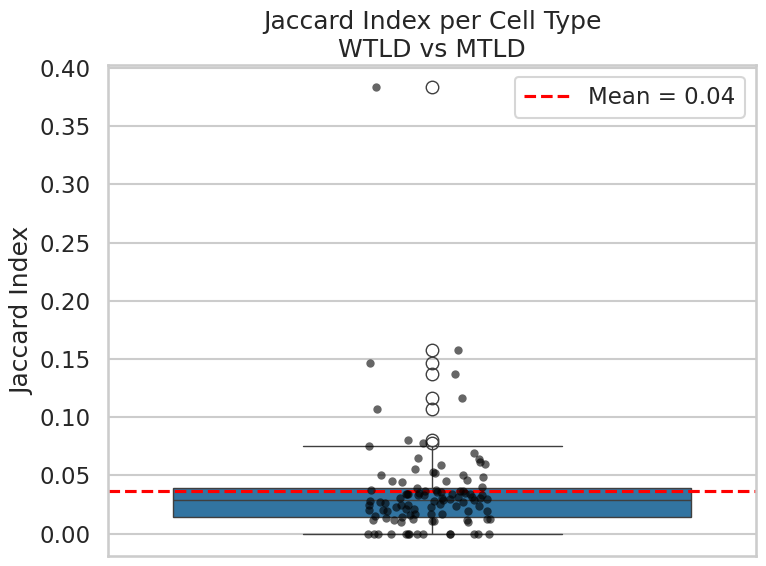

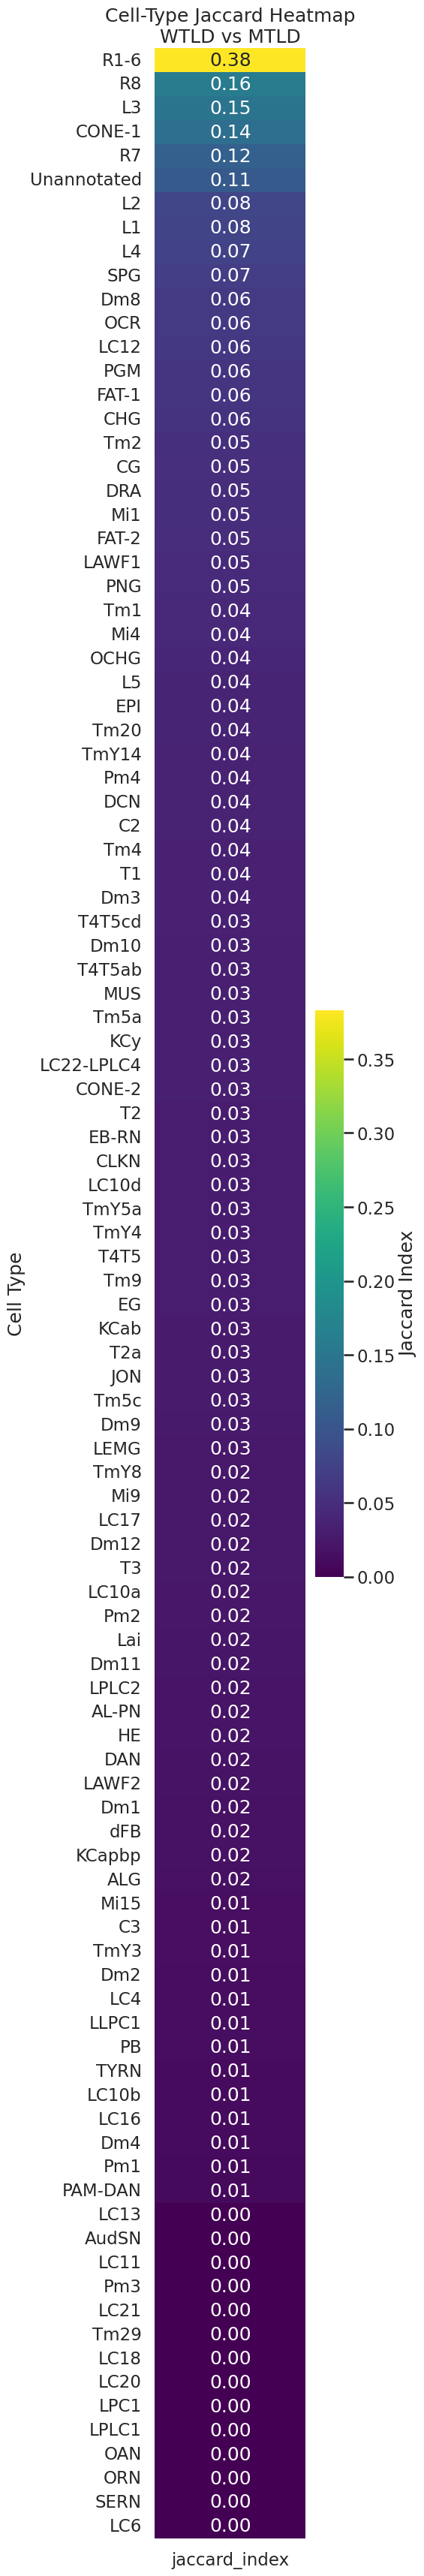


Weighted mean Jaccard index (weighted by WTLD gene counts): 0.073


In [67]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ================================
# USER SETTINGS
# ================================
# Conditions to compare
COND_A = "WTLD"
COND_B = "MTLD"

# Output directory
OUTPUT_DIR = "./jaccard_results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Significance threshold (if needed)
# Assuming rhythmicity threshold is based on p-value or q-value
# If your pivot_df already has only rhythmic genes, you can ignore this
RHYTHM_Q_CUTOFF = 0.05  # adjust if needed

# ================================
# LOAD DATA
# ================================
# pivot_df must contain at least: CycID, cell_type, Condition
# Example: pivot_df = pd.read_csv("pivot_df.csv")

print("pivot_df columns:", pivot_df.columns.tolist())
print("Number of rows in pivot_df:", len(pivot_df))

# Filter to only rhythmic genes if pivot_df has a p-value column
if "avg_p" in pivot_df.columns:
    pivot_df = pivot_df.query("avg_p < @RHYTHM_Q_CUTOFF").copy()
    print(f"Filtered to rhythmic genes with avg_p < {RHYTHM_Q_CUTOFF}: {len(pivot_df)} remaining")

# ================================
# GET CELL TYPES
# ================================
cell_types = pivot_df['cell_type'].unique()
print(f"Number of unique cell types: {len(cell_types)}")

# ================================
# CALCULATE JACCARD INDEX PER CELL TYPE
# ================================
results = []

for ct in sorted(cell_types):
    # Gene sets for this cell type in each condition
    set_a = set(pivot_df.query("Condition == @COND_A and cell_type == @ct")['CycID'])
    set_b = set(pivot_df.query("Condition == @COND_B and cell_type == @ct")['CycID'])
    
    # Calculate intersection and union
    intersection = len(set_a & set_b)
    union = len(set_a | set_b)
    jaccard = intersection / union if union > 0 else np.nan

    results.append({
        "cell_type": ct,
        f"{COND_A}_count": len(set_a),
        f"{COND_B}_count": len(set_b),
        "intersection": intersection,
        "union": union,
        "jaccard_index": jaccard
    })

# Convert to dataframe
jaccard_df = pd.DataFrame(results)

# ================================
# SUMMARY STATS
# ================================
mean_jaccard = jaccard_df['jaccard_index'].mean()
median_jaccard = jaccard_df['jaccard_index'].median()

print("\n=== Summary ===")
print(f"Mean Jaccard index: {mean_jaccard:.3f}")
print(f"Median Jaccard index: {median_jaccard:.3f}")

# Save to CSV
jaccard_df.to_csv(os.path.join(OUTPUT_DIR, f"jaccard_{COND_A}_vs_{COND_B}.csv"), index=False)
print(f"Saved Jaccard data to {OUTPUT_DIR}/jaccard_{COND_A}_vs_{COND_B}.csv")

# ================================
# PLOT DISTRIBUTIONS
# ================================
sns.set(style="whitegrid", context="talk")

# --- Boxplot ---
plt.figure(figsize=(8, 6))
sns.boxplot(y='jaccard_index', data=jaccard_df, color="#1f77b4")
sns.stripplot(y='jaccard_index', data=jaccard_df, color='black', size=6, alpha=0.6)
plt.axhline(mean_jaccard, color='red', linestyle='--', label=f"Mean = {mean_jaccard:.2f}")
plt.ylabel("Jaccard Index")
plt.title(f"Jaccard Index per Cell Type\n{COND_A} vs {COND_B}")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, f"jaccard_boxplot_{COND_A}_vs_{COND_B}.png"), dpi=300)
plt.show()

# --- Heatmap ---
heatmap_data = jaccard_df.pivot_table(
    index='cell_type', values='jaccard_index'
).sort_values('jaccard_index', ascending=False)

plt.figure(figsize=(6, len(heatmap_data)/3))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Jaccard Index'})
plt.title(f"Cell-Type Jaccard Heatmap\n{COND_A} vs {COND_B}")
plt.xlabel("")
plt.ylabel("Cell Type")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, f"jaccard_heatmap_{COND_A}_vs_{COND_B}.png"), dpi=300)
plt.show()

# ================================
# OPTIONAL: WEIGHTED JACCARD SUMMARY
# ================================
# Weight by size of WTLD rhythmic gene sets to avoid small cell types dominating the mean
jaccard_df['weight'] = jaccard_df[f"{COND_A}_count"]
weighted_mean = np.average(jaccard_df['jaccard_index'], weights=jaccard_df['weight'])

print(f"\nWeighted mean Jaccard index (weighted by {COND_A} gene counts): {weighted_mean:.3f}")


# SCENIC

In [28]:
M1 = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:03:27/ctx_bootstrap/reg_M_001.csv")
print(M1)

    Unnamed: 0          Unnamed: 1            Enrichment        Enrichment.1  \
0          NaN                 NaN                   AUC                 NES   
1           TF             MotifID                   NaN                 NaN   
2         Atf3   metacluster_111.4  0.036636695459409875   3.008223852216136   
3      CG11294  metacluster_184.18   0.08299104791995787  3.2999064598066616   
4      CG11294   metacluster_124.2   0.09357556608741442  3.8878727215498556   
..         ...                 ...                   ...                 ...   
231        srp   metacluster_119.3   0.05960526272693627   5.067048113559189   
232        srp   metacluster_117.4   0.05194928549671325  3.4999738608333475   
233        srp   metacluster_169.2   0.05370729438583505  3.8598143336250454   
234        twi   metacluster_176.1   0.05653945289764696    4.35631211285207   
235        vnd    metacluster_28.1  0.045639810426540285  3.0205127225352886   

              Enrichment.2         Enri

    Unnamed: 0          Unnamed: 1            Enrichment        Enrichment.1  \
0          NaN                 NaN                   AUC                 NES   
1           TF             MotifID                   NaN                 NaN   
2         Atf3   metacluster_111.4  0.036636695459409875   3.008223852216136   
3      CG11294  metacluster_184.18   0.08299104791995787  3.2999064598066616   
4      CG11294   metacluster_124.2   0.09357556608741442  3.8878727215498556   
..         ...                 ...                   ...                 ...   
231        srp   metacluster_119.3   0.05960526272693627   5.067048113559189   
232        srp   metacluster_117.4   0.05194928549671325  3.4999738608333475   
233        srp   metacluster_169.2   0.05370729438583505  3.8598143336250454   
234        twi   metacluster_176.1   0.05653945289764696    4.35631211285207   
235        vnd    metacluster_28.1  0.045639810426540285  3.0205127225352886   

              Enrichment.2         Enri

In [6]:
import pandas as pd
import numpy as np
import glob, os, ast

BASE_DIR = "/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:03:27/ctx_bootstrap/"
OUT_DIR  = BASE_DIR  # change if you want a different output folder
os.makedirs(OUT_DIR, exist_ok=True)

# SCENIC/CTX "reg" columns we expect after skipping the first two rows
REG_COLS = [
    "TF", "MotifID", "AUC", "NES", "MotifSimilarityQvalue", "OrthologousIdentity",
    "Annotation", "Context", "TargetGenes", "RankAtMax"
]

def load_and_explode_reg(path, bootstrap_idx):
    """
    Load a single reg_*.csv, skip the two pseudo-header rows, assign columns,
    parse TargetGenes, and explode into an edge list: TF, Target, TargetWeight (+ motif stats).
    """
    # Skip the first two rows that contain pseudo-headers, read the rest as data
    df = pd.read_csv(path, header=None, skiprows=2)
    # Some files may have fewer columns due to commas inside strings; enforce width then trim
    if df.shape[1] < len(REG_COLS):
        # Try a safer read that preserves quoted commas
        df = pd.read_csv(path, header=None, skiprows=2, engine="python")
    # Truncate or pad columns to expected width
    if df.shape[1] >= len(REG_COLS):
        df = df.iloc[:, :len(REG_COLS)]
    else:
        # pad with NaNs if somehow fewer columns
        for _ in range(len(REG_COLS) - df.shape[1]):
            df[df.shape[1]] = np.nan
    df.columns = REG_COLS

    # Drop empty rows
    df = df.dropna(subset=["TF", "TargetGenes"], how="any")

    # Parse the TargetGenes column: looks like "[('GeneA', 0.5), ('GeneB', 0.3), ...]"
    def parse_targets(x):
        try:
            parsed = ast.literal_eval(x)
            # expects list of (gene, weight) tuples
            if isinstance(parsed, list):
                return [(str(g), float(w)) for g, w in parsed if g is not None]
        except Exception:
            pass
        return []

    df["ParsedTargets"] = df["TargetGenes"].apply(parse_targets)
    df = df[df["ParsedTargets"].map(len) > 0]

    # Explode to edge-level
    edges = df.loc[:, ["TF", "MotifID", "AUC", "NES", "ParsedTargets"]].explode("ParsedTargets").copy()
    edges[["Target", "TargetWeight"]] = pd.DataFrame(edges["ParsedTargets"].tolist(), index=edges.index)
    edges = edges.drop(columns=["ParsedTargets"])

    # Attach bootstrap run index
    edges["Bootstrap"] = int(bootstrap_idx)
    return edges

def build_consensus_for_sex(sex):
    pattern = os.path.join(BASE_DIR, f"reg_{sex}_*.csv")
    files = sorted(glob.glob(pattern))
    print(f"[{sex}] Found {len(files)} files")

    all_edges = []
    for i, f in enumerate(files, start=1):
        try:
            e = load_and_explode_reg(f, i)
            all_edges.append(e)
        except Exception as ex:
            print(f"  !! Skipping {f} due to parse error: {ex}")

    if not all_edges:
        raise RuntimeError(f"No edges parsed for sex={sex}")

    edges = pd.concat(all_edges, ignore_index=True)

    # Consensus by TF-Target across bootstraps
    # We aggregate TargetWeight (edge weight) and motif-level AUC/NES (mean across motifs/bootstraps)
    consensus = (
        edges
        .groupby(["TF", "Target"], as_index=False)
        .agg(
            Count=("Bootstrap", "nunique"),
            MeanTargetWeight=("TargetWeight", "mean"),
            StdTargetWeight=("TargetWeight", "std"),
            MeanAUC=("AUC", "mean"),
            MeanNES=("NES", "mean"),
        )
        .sort_values(["Count", "MeanTargetWeight"], ascending=[False, False])
    )

    # Optional: also keep a more detailed table that preserves MotifID-level info (helpful for QA)
    detailed = (
        edges
        .groupby(["TF", "Target", "MotifID"], as_index=False)
        .agg(
            Count=("Bootstrap", "nunique"),
            MeanTargetWeight=("TargetWeight", "mean"),
            StdTargetWeight=("TargetWeight", "std"),
            MeanAUC=("AUC", "mean"),
            MeanNES=("NES", "mean"),
        )
        .sort_values(["Count", "MeanTargetWeight"], ascending=[False, False])
    )

    # Save
    out_consensus = os.path.join(OUT_DIR, f"reg_{sex}_consensus_edges.csv")
    out_detailed  = os.path.join(OUT_DIR, f"reg_{sex}_consensus_edges_by_motif.csv")
    consensus.to_csv(out_consensus, index=False)
    detailed.to_csv(out_detailed, index=False)
    print(f"[{sex}] Saved consensus: {out_consensus} ({len(consensus)} edges)")
    print(f"[{sex}] Saved detailed : {out_detailed}  ({len(detailed)} TF-Target-Motif rows)")
    return consensus, detailed

# Run for each sex
cons_M, det_M = build_consensus_for_sex("M")
cons_F, det_F = build_consensus_for_sex("F")


[M] Found 42 files
  !! Skipping /lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:03:27/ctx_bootstrap/reg_M_consensus_edges.csv due to parse error: Columns must be same length as key
  !! Skipping /lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:03:27/ctx_bootstrap/reg_M_consensus_edges_by_motif.csv due to parse error: Columns must be same length as key
[M] Saved consensus: /lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:03:27/ctx_bootstrap/reg_M_consensus_edges.csv (74108 edges)
[M] Saved detailed : /lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:03:27/ctx_bootstrap/reg_M_consensus_edges_by_motif.csv  (133223 TF-Target-Motif rows)
[F] Found 42 files
  !! Skipping /lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:03:27/ctx_bootstrap/reg_F_consensus_edges.csv due to parse error: Columns must be same length as key
  !! Skipping /lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:03:27/ctx_bootstrap/reg_F_consensus_edges_by_motif.csv due to parse error: Columns must be same length as key
[F

In [30]:
# Load back the saved consensus files
m = pd.read_csv(os.path.join(OUT_DIR, "reg_M_consensus_edges.csv"))
f = pd.read_csv(os.path.join(OUT_DIR, "reg_F_consensus_edges.csv"))

mf = m.merge(f, on=["TF","Target"], how="outer", suffixes=("_M","_F"))
mf["CountDiff"] = mf["Count_F"].fillna(0) - mf["Count_M"].fillna(0)
mf["WeightDiff"] = mf["MeanTargetWeight_F"].fillna(0) - mf["MeanTargetWeight_M"].fillna(0)

# Example filters:
# Stronger/stable in females (>=50% bootstraps and 20% higher weight)
female_biased = mf.query("Count_F >= 20 and (Count_F - Count_M) >= 10 and WeightDiff >= 0.1")
male_biased   = mf.query("Count_M >= 20 and (Count_M - Count_F) >= 10 and WeightDiff <= -0.1")

female_biased.head(), male_biased.head()


(        TF  Target  Count_M  MeanTargetWeight_M  StdTargetWeight_M  MeanAUC_M  \
 60   Abd-B  CG7991     14.0            0.504365           0.246361   0.131858   
 357   Atf3  Act42A      1.0            0.004933                NaN   0.036702   
 359   Atf3   Act5C      4.0            0.069308           0.023207   0.035182   
 403   Atf3   AnxB9     24.0            0.568985           0.248032   0.038643   
 410   Atf3    Arc1      7.0            0.063783           0.033785   0.035527   
 
      MeanNES_M  Count_F  MeanTargetWeight_F  StdTargetWeight_F  MeanAUC_F  \
 60    3.459192     31.0            1.630206           0.652547   0.134044   
 357   3.281035     26.0            0.157904           0.094452   0.039399   
 359   3.157180     32.0            0.366223           0.185942   0.041776   
 403   3.518864     40.0            2.574685           0.751462   0.052179   
 410   3.274456     34.0            0.672305           0.575321   0.043010   
 
      MeanNES_F  CountDiff  WeightDi

In [7]:
import pandas as pd
import os

# Base directory where your consensus files were saved
BASE_DIR = "/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:03:27/ctx_bootstrap/"

# Load male consensus
male_file = os.path.join(BASE_DIR, "reg_M_consensus_edges.csv")
m = pd.read_csv(male_file)

# Load female consensus
female_file = os.path.join(BASE_DIR, "reg_F_consensus_edges.csv")
f = pd.read_csv(female_file)

print("Male consensus shape:", m.shape)
print("Female consensus shape:", f.shape)


Male consensus shape: (74108, 7)
Female consensus shape: (78009, 7)


In [8]:
# Rename columns to avoid conflicts
m = m.rename(columns={
    "Count": "Count_M",
    "MeanTargetWeight": "MeanTargetWeight_M",
    "StdTargetWeight": "StdTargetWeight_M",
    "MeanAUC": "MeanAUC_M",
    "MeanNES": "MeanNES_M"
})

f = f.rename(columns={
    "Count": "Count_F",
    "MeanTargetWeight": "MeanTargetWeight_F",
    "StdTargetWeight": "StdTargetWeight_F",
    "MeanAUC": "MeanAUC_F",
    "MeanNES": "MeanNES_F"
})


In [9]:
# Merge both networks
merged = pd.merge(m, f, on=["TF", "Target"], how="outer")

# Fill NaNs with zeros (for cases where edge was missing in one sex)
for col in ["Count_M","Count_F",
            "MeanTargetWeight_M","MeanTargetWeight_F",
            "StdTargetWeight_M","StdTargetWeight_F",
            "MeanAUC_M","MeanAUC_F",
            "MeanNES_M","MeanNES_F"]:
    merged[col] = merged[col].fillna(0)

print("Merged table shape:", merged.shape)
print(merged.head())


Merged table shape: (127247, 12)
      TF               Target  Count_M  MeanTargetWeight_M  StdTargetWeight_M  \
0  Abd-B  18SrRNA-Psi:CR45861      3.0            0.289709           0.136016   
1  Abd-B                Abd-B     29.0            1.000000           0.000000   
2  Abd-B                Ac78C      1.0            0.357045           0.000000   
3  Abd-B                AnxB9      0.0            0.000000           0.000000   
4  Abd-B             Baldspot      4.0            0.957653           0.488995   

   MeanAUC_M  MeanNES_M  Count_F  MeanTargetWeight_F  StdTargetWeight_F  \
0   0.093713   3.129331      0.0            0.000000           0.000000   
1   0.140756   3.432617     27.0            1.000000           0.000000   
2   0.117654   3.183039      0.0            0.000000           0.000000   
3   0.000000   0.000000      2.0            0.447711           0.086547   
4   0.126160   3.187157      0.0            0.000000           0.000000   

   MeanAUC_F  MeanNES_F  
0  

In [10]:
merged["CountDiff"] = merged["Count_F"] - merged["Count_M"]
merged["WeightDiff"] = merged["MeanTargetWeight_F"] - merged["MeanTargetWeight_M"]

print(merged[["TF","Target","Count_M","Count_F","CountDiff","WeightDiff"]].head())


      TF               Target  Count_M  Count_F  CountDiff  WeightDiff
0  Abd-B  18SrRNA-Psi:CR45861      3.0      0.0       -3.0   -0.289709
1  Abd-B                Abd-B     29.0     27.0       -2.0    0.000000
2  Abd-B                Ac78C      1.0      0.0       -1.0   -0.357045
3  Abd-B                AnxB9      0.0      2.0        2.0    0.447711
4  Abd-B             Baldspot      4.0      0.0       -4.0   -0.957653


In [11]:
stable_edges = merged[
    ((merged["Count_M"] >= 20) | (merged["Count_F"] >= 20)) &
    ((merged["MeanTargetWeight_M"].fillna(0) >= 0.5) | (merged["MeanTargetWeight_F"].fillna(0) >= 0.5))
].copy()

print("Stable edge count:", stable_edges.shape[0])


Stable edge count: 6084


In [12]:
# Define thresholds
MIN_DIFF = 10    # bootstrap count difference
MIN_WEIGHT_DIFF = 0.5  # weight difference threshold

# Female-biased edges
female_biased = stable_edges.query("CountDiff >= @MIN_DIFF and WeightDiff >= @MIN_WEIGHT_DIFF")

# Male-biased edges
male_biased = stable_edges.query("CountDiff <= -@MIN_DIFF and WeightDiff <= -@MIN_WEIGHT_DIFF")

print("Female-biased edges:", female_biased.shape[0])
print("Male-biased edges:", male_biased.shape[0])


Female-biased edges: 1236
Male-biased edges: 889


In [13]:
tf_summary = (
    stable_edges
    .groupby("TF")
    .agg(
        total_edges=("Target", "count"),
        mean_countdiff=("CountDiff", "mean"),
        mean_weightdiff=("WeightDiff", "mean")
    )
    .sort_values("mean_weightdiff", ascending=False)
)

print(tf_summary.head(10))  # top female-biased TFs
print(tf_summary.tail(10))  # top male-biased TFs


        total_edges  mean_countdiff  mean_weightdiff
TF                                                  
grn               1       17.000000         5.443476
Hmx               3       24.666667         2.846618
shn               4       24.250000         2.183996
nub               9       20.666667         2.112067
Ets97D            1       32.000000         2.100426
Hr96              6       22.833333         1.918155
twi               4       18.500000         1.916784
hb                8       23.750000         1.847859
Kah              13       21.461538         1.794625
Max               9       22.111111         1.756263
        total_edges  mean_countdiff  mean_weightdiff
TF                                                  
so                2      -24.000000        -1.829244
Nf-YC             1      -27.000000        -1.851634
vnd              76      -34.434211        -1.852649
Hesr              3      -27.000000        -1.857557
Sox21b            2      -21.000000        -2.

In [14]:
# Load rhythmic gene sets
female_rhythmic = set(pd.read_csv("WTLD_F_combined.csv")['CycID'])
male_rhythmic = set(pd.read_csv("WTLD_M_combined.csv")['CycID'])

# Example: overlap for female-biased edges
female_targets = set(female_biased['Target'])
overlap_female = female_targets & female_rhythmic

print(f"Female-biased edges: {len(female_targets)}")
print(f"Overlap with female rhythmic genes: {len(overlap_female)}")

# Fisher enrichment
from scipy.stats import fisher_exact

total_genes = len(set(merged['Target']))  # total possible genes
only_female = len(female_targets - female_rhythmic)
only_rhythmic = len(female_rhythmic - female_targets)
both = len(overlap_female)
neither = total_genes - both - only_female - only_rhythmic

table = [[both, only_female], [only_rhythmic, neither]]
odds, pval = fisher_exact(table)
print(f"Fisher exact test p={pval:.3e}, odds ratio={odds:.2f}")


Female-biased edges: 1069
Overlap with female rhythmic genes: 690
Fisher exact test p=5.696e-21, odds ratio=1.85


In [15]:
import pandas as pd, numpy as np, os, re
from math import pi
from numpy import cos, sin, exp

BASE = "/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:03:27/ctx_bootstrap/"
TF_M = "/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/TF_rhythmicity_avg_M.csv"
TF_F = "/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/TF_rhythmicity_avg_F.csv"

# Keep only rhythmic TFs with avg_p < 0.05
TF_P_THRESHOLD = 0.05
tfM = tfM.query("avg_p < @TF_P_THRESHOLD").copy()
tfF = tfF.query("avg_p < @TF_P_THRESHOLD").copy()


# ---- 1) Load consensus edges (per sex)
m = pd.read_csv(os.path.join(BASE, "reg_M_consensus_edges.csv"))
f = pd.read_csv(os.path.join(BASE, "reg_F_consensus_edges.csv"))
m = m.rename(columns={"Count":"Count_M","MeanTargetWeight":"MeanTargetWeight_M"})
f = f.rename(columns={"Count":"Count_F","MeanTargetWeight":"MeanTargetWeight_F"})

merged = pd.merge(m, f, on=["TF","Target"], how="outer")
for c in ["Count_M","Count_F","MeanTargetWeight_M","MeanTargetWeight_F"]:
    merged[c] = merged[c].fillna(0.0)

# (optional) keep only reasonably stable edges in either sex
edges_keep = merged.query("(Count_M >= 20) | (Count_F >= 20)").copy()

# ---- 2) Load TF rhythmicity (per sex), clean TF names, select condition
def clean_tf_name(x: str) -> str:
    # Your CycID looks like "Atf3..." etc. Take the part before the first '...'
    tf = x.split("...")[0]
    # Fix common punctuation variants (e.g., Abd.B -> Abd-B)
    tf = tf.replace("Abd.B", "Abd-B").replace("ftz.f1","ftz-f1")
    return tf

def load_tf_tbl(path, sex_label):
    tf = pd.read_csv(path)
    tf["TF"] = tf["CycID"].map(clean_tf_name)
    tf["sex"] = sex_label
    return tf

# Load the TF rhythmicity files
tfM = load_tf_tbl(TF_M, "M")
tfF = load_tf_tbl(TF_F, "F")

# Choose genotype & light condition to analyze
GENO = "Wild-type"
LIGHT = "DD"   # or "DD"

# Filter to the condition of interest
tfM = tfM.query("genotype == @GENO and light_condition == @LIGHT").copy()
tfF = tfF.query("genotype == @GENO and light_condition == @LIGHT").copy()

# **NEW: Filter to rhythmic TFs based on avg_p**
TF_P_THRESHOLD = 0.05
tfM = tfM.query("avg_p < @TF_P_THRESHOLD").copy()
tfF = tfF.query("avg_p < @TF_P_THRESHOLD").copy()

# Rename columns for downstream steps
tfM = tfM.rename(columns={"celltype":"cell_type","avg_phase":"tf_phase"})
tfF = tfF.rename(columns={"celltype":"cell_type","avg_phase":"tf_phase"})


# ---- 3) Load rhythmic gene phases per sex (edit file paths & column names as needed)
genesM_raw = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/WTDD_M_combined.csv")
genesF_raw = pd.read_csv("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09/WTDD_F_combined.csv")

def normalize_gene_table(df):
    # find gene id column
    cols_lower = {c.lower(): c for c in df.columns}
    gene_col = None
    for cand in ["cycid", "gene", "target", "symbol"]:
        if cand in cols_lower:
            gene_col = cols_lower[cand]
            break
    if gene_col is None:
        raise ValueError("Could not find a gene ID column (CycID/gene/target/symbol)")

    # find cell type column
    ct_col = None
    for cand in ["cell_type", "celltype", "celltype_name"]:
        if cand in cols_lower:
            ct_col = cols_lower[cand]
            break
    if ct_col is None:
        raise ValueError("Could not find a cell type column (cell_type/celltype)")

    # find phase column
    phase_col = None
    for cand in ["gene_phase", "avg_phase", "phase", "phase_mean"]:
        if cand in cols_lower:
            phase_col = cols_lower[cand]
            break
    if phase_col is None:
        raise ValueError("Could not find a phase column (avg_phase/phase)")

    out = df[[ct_col, gene_col, phase_col]].copy()
    out.columns = ["cell_type", "Target", "gene_phase"]  # <-- standard names
    return out

genesM = normalize_gene_table(genesM_raw)
genesF = normalize_gene_table(genesF_raw)


# If these tables contain multiple genotypes/conditions, subset here as needed.
# Example (uncomment and adjust if such columns exist):
# genesM = genesM.query("genotype == @GENO and light_condition == @LIGHT").copy()
# genesF = genesF.query("genotype == @GENO and light_condition == @LIGHT").copy()

# ---- 4) Build per-sex, per-celltype TF→Target→Phase join
def wrap_delta_hours(d):
    # map differences to (-12, 12] hours
    d = (d + 12.0) % 24.0 - 12.0
    return d

def circ_summary(tf_phase_h, gene_phase_h):
    # Convert to radians
    tf_r = 2*pi*tf_phase_h/24.0
    ge_r = 2*pi*gene_phase_h/24.0
    # Δ (target - TF), radians & hours
    delta = ge_r - tf_r
    # Wrap to (-pi, pi]
    delta = (delta + pi) % (2*pi) - pi
    # PLV and mean lag
    z = np.exp(1j*delta)
    plv = np.abs(np.mean(z))
    mean_lag_r = np.angle(np.mean(z))
    mean_lag_h = (mean_lag_r * 24.0) / (2*pi)
    # circular correlation via cosine/sine embedding
    X = np.c_[np.cos(tf_r), np.sin(tf_r)]
    Y = np.c_[np.cos(ge_r), np.sin(ge_r)]
    # corr = first canonical correlation between X and Y
    # simple proxy: average of pairwise Pearson between components
    r = np.corrcoef(np.c_[X, Y].T)
    corr = np.nanmean([r[0,2], r[0,3], r[1,2], r[1,3]])
    return plv, mean_lag_h, corr

def analyze_sex(edges_keep, tf_tbl, genes_tbl, sex_label):
    # Join edges to TF phases (per cell type), then to gene phases in the same cell type
    # Start by expanding across cell types: for each cell type present in tf_tbl,
    # keep edges, and join TF & gene phases within that cell type
    results = []
    for ct in sorted(tf_tbl["cell_type"].unique()):
        tf_ct = tf_tbl.loc[tf_tbl["cell_type"]==ct, ["TF","cell_type","tf_phase"]]
        if tf_ct.empty: 
            continue
        # join TF phase onto edges (by TF), then gene phase by Target==gene within the same cell type
        e = edges_keep.merge(tf_ct[["TF","tf_phase","cell_type"]], on="TF", how="inner")
        g_ct = genes_tbl.loc[genes_tbl["cell_type"]==ct, ["Target","gene_phase"]]
        eg = e.merge(g_ct, on="Target", how="inner")

        if eg.empty:
            continue

        # compute Δphase and stats
        eg["delta_h"] = wrap_delta_hours(eg["gene_phase"] - eg["tf_phase"])
        plv, mean_lag_h, corr = circ_summary(eg["tf_phase"].to_numpy(), eg["gene_phase"].to_numpy())
        results.append({
            "sex": sex_label,
            "cell_type": ct,
            "n_pairs": eg.shape[0],
            "PLV": plv,
            "mean_lag_h": mean_lag_h,
            "circ_corr": corr
        })
    return pd.DataFrame(results)

resM = analyze_sex(edges_keep, tfM, genesM, "M")
resF = analyze_sex(edges_keep, tfF, genesF, "F")

summary = pd.concat([resM, resF], ignore_index=True).sort_values(["cell_type","sex"])
print(summary.head(20))

# (Optional) identify TFs with strongest per-celltype locking
def per_tf_stats(edges_keep, tf_tbl, genes_tbl, sex_label, min_pairs=10):
    out = []
    for ct, tf in tf_tbl[["cell_type","TF"]].drop_duplicates().itertuples(index=False):
        tfrow = tf_tbl[(tf_tbl["TF"]==tf) & (tf_tbl["cell_type"]==ct)]
        if tfrow.empty: 
            continue
        tf_phase = tfrow["tf_phase"].iloc[0]
        e = edges_keep.query("TF == @tf").copy()
        g_ct = genes_tbl.loc[genes_tbl["cell_type"]==ct, ["Target","gene_phase"]]
        eg = e.merge(g_ct, on="Target", how="inner")
        if eg.shape[0] < min_pairs:
            continue
        eg["delta_h"] = wrap_delta_hours(eg["gene_phase"] - tf_phase)
        z = np.exp(1j * eg["delta_h"] * 2*pi/24.0)
        plv = np.abs(np.mean(z))
        mean_lag_h = np.angle(np.mean(z)) * 24.0/(2*pi)
        out.append({"sex":sex_label,"cell_type":ct,"TF":tf,"n_targets":eg.shape[0],
                    "PLV":plv,"mean_lag_h":mean_lag_h})
    return pd.DataFrame(out)

tfM_stats = per_tf_stats(edges_keep, tfM, genesM, "M")
tfF_stats = per_tf_stats(edges_keep, tfF, genesF, "F")
tf_stats = pd.concat([tfM_stats, tfF_stats], ignore_index=True)

# Examples: top phase-locked TFs per sex
print(tf_stats.sort_values(["sex","PLV"], ascending=[True,False]).groupby("sex").head(10))


NameError: name 'tfM' is not defined

In [16]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from math import pi

# ---------- utilities ----------
def _wrap_hours(x):
    return (x + 12.0) % 24.0 - 12.0

def _collect_deltas_for_tf(edges_keep, tf_tbl, genes_tbl, tf_name, cell_type=None, min_targets=5):
    """Return a dataframe of target rows with delta_h for one TF, optionally within a cell_type."""
    # pick TF phase per cell type
    tf_rows = tf_tbl.loc[tf_tbl["TF"]==tf_name, ["TF","cell_type","tf_phase"]]
    if cell_type is not None:
        tf_rows = tf_rows.query("cell_type == @cell_type")
    if tf_rows.empty:
        return pd.DataFrame(columns=["TF","cell_type","Target","tf_phase","gene_phase","delta_h"])

    # restrict edges to this TF
    e = edges_keep.query("TF == @tf_name").copy()
    if e.empty:
        return pd.DataFrame(columns=["TF","cell_type","Target","tf_phase","gene_phase","delta_h"])

    out = []
    for ct, tf_phase in tf_rows[["cell_type","tf_phase"]].itertuples(index=False):
        g_ct = genes_tbl.loc[genes_tbl["cell_type"]==ct, ["Target","gene_phase"]]
        eg = e.merge(g_ct, on="Target", how="inner")
        if eg.shape[0] >= min_targets:
            eg = eg.assign(TF=tf_name, cell_type=ct, tf_phase=tf_phase)
            eg["delta_h"] = _wrap_hours(eg["gene_phase"] - tf_phase)
            out.append(eg[["TF","cell_type","Target","tf_phase","gene_phase","delta_h"]])
    return pd.concat(out, ignore_index=True) if out else pd.DataFrame(columns=["TF","cell_type","Target","tf_phase","gene_phase","delta_h"])

def plot_delta_phase(tf_name, sex_label,
                     edges_keep, tf_tbl, genes_tbl,
                     cell_type=None, bins=24, savepath=None):
    """
    Polar histogram (Δphase in hours mapped to radians) + linear KDE/hist.
    If cell_type is None, concatenates across all cell types where that TF is rhythmic+linked.
    """
    dat = _collect_deltas_for_tf(edges_keep, tf_tbl, genes_tbl, tf_name, cell_type)
    if dat.empty:
        print(f"[{sex_label}] {tf_name}: no data (check TF rhythmicity or edges).")
        return

    # radians for polar
    theta = dat["delta_h"].to_numpy() * 2*np.pi/24.0

    fig = plt.figure(figsize=(11,5))
    # Polar
    ax1 = plt.subplot(1,2,1, projection="polar")
    ax1.set_title(f"{tf_name} Δphase (Target−TF) — {sex_label}" + (f" [{cell_type}]" if cell_type else ""))
    ax1.hist(theta, bins=bins)  # default styling
    ax1.set_theta_zero_location("N")
    ax1.set_theta_direction(-1)
    ax1.set_thetagrids([0,60,120,180,240,300], labels=["0h","4h","8h","12h","16h","20h"])

    # Linear
    ax2 = plt.subplot(1,2,2)
    ax2.hist(dat["delta_h"], bins=bins, density=True)
    ax2.set_xlabel("Δphase (hours)  [Target − TF]")
    ax2.set_xlim([-12,12])
    ax2.set_ylabel("Density")
    ax2.set_title(f"n={dat.shape[0]} | mean={dat['delta_h'].mean():.2f}h")

    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches="tight")
        print(f"saved → {savepath}")
    plt.show()


In [55]:
pwd

'/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09'

In [18]:
import os, numpy as np, pandas as pd

# ---------- paths (adjust if needed) ----------
BASE = "/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:03:27/ctx_bootstrap/"
ROOT_PHASE = "/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09"
OUTDIR = "/lustre/fs4/yng_lab/scratch/pkim/tables"
os.makedirs(OUTDIR, exist_ok=True)

# ---------- load consensus edges from earlier ----------
m = pd.read_csv(os.path.join(BASE, "reg_M_consensus_edges.csv")).rename(
    columns={"Count":"Count_M","MeanTargetWeight":"MeanTargetWeight_M"}
)
f = pd.read_csv(os.path.join(BASE, "reg_F_consensus_edges.csv")).rename(
    columns={"Count":"Count_F","MeanTargetWeight":"MeanTargetWeight_F"}
)
cons = pd.merge(m, f, on=["TF","Target"], how="outer").fillna(0)

# ---------- helpers you already used ----------
def clean_tf_name(x: str) -> str:
    tf = x.split("...")[0]
    tf = tf.replace("Abd.B","Abd-B").replace("ftz.f1","ftz-f1")
    return tf

def load_tf_rhythmicity(sex, genotype, light, p_thresh=0.05):
    path = os.path.join(ROOT_PHASE, f"TF_rhythmicity_avg_{sex}.csv")
    tf = pd.read_csv(path)
    tf["TF"] = tf["CycID"].map(clean_tf_name)
    tf = tf.query("genotype == @genotype and light_condition == @light").copy()
    tf = tf.rename(columns={"celltype":"cell_type","avg_phase":"tf_phase"})
    # keep only rhythmic TFs if avg_p exists
    if "avg_p" in tf.columns:
        tf = tf.query("avg_p < @p_thresh").copy()
    return tf  # keep avg_p column if present

def normalize_gene_table(df):
    cols_lower = {c.lower(): c for c in df.columns}
    # id
    for cand in ["cycid","gene","target","symbol"]:
        if cand in cols_lower: gid = cols_lower[cand]; break
    else: raise ValueError("no gene id col")
    # ct
    for cand in ["cell_type","celltype","celltype_name"]:
        if cand in cols_lower: ct = cols_lower[cand]; break
    else: raise ValueError("no cell type col")
    # phase
    for cand in ["gene_phase","avg_phase","phase","phase_mean"]:
        if cand in cols_lower: ph = cols_lower[cand]; break
    else: raise ValueError("no phase col")
    out = df[[ct, gid, ph]].copy()
    out.columns = ["cell_type","Target","gene_phase"]
    return out

def gene_phase_path(genotype, light, sex):
    g = "WT" if genotype == "Wild-type" else "MT"
    s = "M" if sex == "M" else "F"
    return os.path.join(ROOT_PHASE, f"{g}{light}_{s}_combined.csv")

def load_gene_phases(sex, genotype, light):
    df = pd.read_csv(gene_phase_path(genotype, light, sex))
    return normalize_gene_table(df)

def wrap_hours(d):
    return (d + 12.0) % 24.0 - 12.0

# ---------- main builder ----------
def build_rhythmic_tf_to_gene_map(genotype, light, sex,
                                  min_edge_count=20,  # require edge seen in ≥50% bootstraps in that sex
                                  tf_p_thresh=0.05,
                                  save_csv=True):
    """
    Returns a long table:
    [genotype, light, sex, cell_type, TF, Target,
     tf_phase, gene_phase, delta_h, edge_count, edge_weight]
    """
    # 1) rhythmic TFs (per cell type)
    tf_tbl = load_tf_rhythmicity(sex, genotype, light, p_thresh=tf_p_thresh)
    if tf_tbl.empty: 
        return pd.DataFrame()

    # 2) rhythmic genes (per cell type)
    genes_tbl = load_gene_phases(sex, genotype, light)
    if genes_tbl.empty:
        return pd.DataFrame()

    # 3) choose consensus edges available in this sex
    if sex == "M":
        edges = cons.loc[cons["Count_M"] >= min_edge_count,
                         ["TF","Target","Count_M","MeanTargetWeight_M"]].rename(
            columns={"Count_M":"edge_count","MeanTargetWeight_M":"edge_weight"}
        )
    else:
        edges = cons.loc[cons["Count_F"] >= min_edge_count,
                         ["TF","Target","Count_F","MeanTargetWeight_F"]].rename(
            columns={"Count_F":"edge_count","MeanTargetWeight_F":"edge_weight"}
        )
    if edges.empty:
        return pd.DataFrame()

    # 4) join (TF→Target edges) with TF phase per cell type, then gene phase in same cell type
    out_rows = []
    for ct in sorted(tf_tbl["cell_type"].unique()):
        tf_ct = tf_tbl.loc[tf_tbl["cell_type"]==ct, ["TF","tf_phase"]].copy()
        if tf_ct.empty: 
            continue
        e_ct = edges.merge(tf_ct, on="TF", how="inner")
        g_ct = genes_tbl.loc[genes_tbl["cell_type"]==ct, ["Target","gene_phase"]].copy()
        eg = e_ct.merge(g_ct, on="Target", how="inner")
        if eg.empty:
            continue
        eg["delta_h"] = wrap_hours(eg["gene_phase"] - eg["tf_phase"])
        eg["cell_type"] = ct
        eg["genotype"]  = genotype
        eg["light"]     = light
        eg["sex"]       = sex
        out_rows.append(eg[["genotype","light","sex","cell_type",
                            "TF","Target","tf_phase","gene_phase","delta_h",
                            "edge_count","edge_weight"]])

    result = pd.concat(out_rows, ignore_index=True) if out_rows else pd.DataFrame()
    if save_csv and not result.empty:
        tag = f"{'WT' if genotype=='Wild-type' else 'MT'}{light}_{sex}"
        outpath = os.path.join(OUTDIR, f"rhythmic_TF_to_gene_map_{tag}.csv")
        result.to_csv(outpath, index=False)
        print("saved:", outpath, "| rows:", result.shape[0])
    return result


In [19]:
all_maps = []
for genotype in ["Wild-type","per0"]:
    for light in ["LD","DD"]:
        for sex in ["M","F"]:
            tbl = build_rhythmic_tf_to_gene_map(genotype, light, sex,
                                                min_edge_count=20, tf_p_thresh=0.05,
                                                save_csv=True)
            all_maps.append(tbl)
tf_gene_map = pd.concat([t for t in all_maps if t is not None and not t.empty], ignore_index=True)
print("total rows across all conditions:", tf_gene_map.shape)


saved: /lustre/fs4/yng_lab/scratch/pkim/tables/rhythmic_TF_to_gene_map_WTLD_M.csv | rows: 6918
saved: /lustre/fs4/yng_lab/scratch/pkim/tables/rhythmic_TF_to_gene_map_WTLD_F.csv | rows: 13836
saved: /lustre/fs4/yng_lab/scratch/pkim/tables/rhythmic_TF_to_gene_map_WTDD_M.csv | rows: 381
saved: /lustre/fs4/yng_lab/scratch/pkim/tables/rhythmic_TF_to_gene_map_WTDD_F.csv | rows: 1689
saved: /lustre/fs4/yng_lab/scratch/pkim/tables/rhythmic_TF_to_gene_map_MTLD_M.csv | rows: 865
saved: /lustre/fs4/yng_lab/scratch/pkim/tables/rhythmic_TF_to_gene_map_MTLD_F.csv | rows: 1324
saved: /lustre/fs4/yng_lab/scratch/pkim/tables/rhythmic_TF_to_gene_map_MTDD_M.csv | rows: 206
saved: /lustre/fs4/yng_lab/scratch/pkim/tables/rhythmic_TF_to_gene_map_MTDD_F.csv | rows: 286
total rows across all conditions: (25505, 11)


In [20]:
(tf_gene_map
 .groupby(["genotype","light","sex","cell_type","TF"])
 .size().reset_index(name="n_targets")
 .sort_values(["genotype","light","sex","cell_type","n_targets"], ascending=[True,True,True,True,False])
 .groupby(["genotype","light","sex","cell_type"])
 .head(10)
 .to_csv(os.path.join(OUTDIR,"top_TFs_per_celltype.csv"), index=False))


In [28]:
tf_gene_map

genotype light sex    cell_type    TF   Target   tf_phase  gene_phase  \
0      Wild-type    LD   M          ALG  Hnf4  CG15673  15.983777    9.602249   
1      Wild-type    LD   M          ALG  Hnf4  CG30015  15.983777   14.150925   
2      Wild-type    LD   M          ALG  Hnf4  CG31705  15.983777   20.930240   
3      Wild-type    LD   M          ALG  Hnf4  CG33970  15.983777    9.684598   
4      Wild-type    LD   M          ALG  Hnf4   Eip75B  15.983777   17.621603   
...          ...   ...  ..          ...   ...      ...        ...         ...   
25500       per0    DD   F  Unannotated  lola  unc-104  18.028140    3.725002   
25501       per0    DD   F  Unannotated  lola   unc-13  18.028140   17.611416   
25502       per0    DD   F  Unannotated  lola    upSET  18.028140    5.376685   
25503       per0    DD   F  Unannotated  lola      zip  18.028140    1.542052   
25504       per0    DD   F  Unannotated   pnr    Traf4  18.610961    3.995871   

         delta_h  edge_count  edge_weight  
0      -6.381528        39.0     0.340229  
1      -1.832853        38.0     0.610138  
2       4.946463        35.0     1.121990  
3      -6.299180        29.0     1.246147  
4       1.637825        22.0     0.087346  
...          ...         ...          ...  
25500   9.696862        32.0     0.548084  
25501  -0.416724        39.0     1.464145  
25502  11.348545        38.0     2.108723  
25503   7.513912        37.0     1.105540  
25504   9.384910        24.0     1.151386  

[25505 rows x 11 columns]

In [63]:
pwd

'/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:04:09'

In [21]:
tag = ("Wild-type","LD","F")
subset = tf_gene_map.query("genotype==@tag[0] and light==@tag[1] and sex==@tag[2]")
lags = (subset
        .groupby(["cell_type","TF"])["delta_h"]
        .apply(lambda s: pd.Series({"n":s.size,"mean":s.mean(),"sd":s.std()}))
        .reset_index())
lags.head()


cell_type    TF level_2   delta_h
0     AL-PN  Hr38       n  1.000000
1     AL-PN  Hr38    mean -5.781809
2     AL-PN  Hr38      sd       NaN
3       ALG   Dll       n  4.000000
4       ALG   Dll    mean -1.424436

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, PathPatch
from matplotlib.path import Path
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os, math
import numpy as np
import matplotlib.cm as cm
from matplotlib.path import Path
from matplotlib.patches import PathPatch

def hsv24(h):
    return cm.hsv(((0 if pd.isna(h) else h) % 24) / 24.0)

def circmean24(ph, w=None):
    """Circular mean over 0–24h, returns mean in hours."""
    ph = np.asarray(ph, float) % 24.0
    if w is None: w = np.ones_like(ph, float)
    ang = 2*np.pi*ph/24.0
    C = np.sum(w*np.cos(ang)); S = np.sum(w*np.sin(ang))
    if C==0 and S==0: return np.nan
    ang_mean = np.arctan2(S, C)
    if ang_mean < 0: ang_mean += 2*np.pi
    return (ang_mean * 24.0) / (2*np.pi)

def gradient_trapezoid(ax, xL, yL, hL, xR, yR, hR, cL, cR):
    """
    Draw a left-right linear gradient inside a TF trapezoid by
    imshow + clipping to the trapezoid path.
    """
    # polygon path
    verts = [(xL, yL), (xL, yL+hL), (xR, yR+hR), (xR, yR), (xL, yL)]
    codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
    poly = Path(verts, codes)
    patch = PathPatch(poly, facecolor='none', edgecolor='none')
    ax.add_patch(patch)

    # build horizontal RGBA gradient (rectangular), then clip to polygon
    N = 256
    rgba = np.zeros((1, N, 4), float)
    cL = np.array(cL); cR = np.array(cR)
    for k in range(4):
        rgba[0, :, k] = np.linspace(cL[k], cR[k], N)

    # bounds to cover the entire trapezoid; clip will do the rest
    x0, x1 = min(xL, xR), max(xL, xR)
    y0 = min(yL, yR)
    y1 = max(yL+hL, yR+hR)

    im = ax.imshow(rgba, extent=(x0, x1, y0, y1), origin='lower', aspect='auto')
    im.set_clip_path(patch)
    return patch  # returned in case you want to add an outline later


# ---------- helpers ----------
def phase_color(h):  # HSV around 24h
    return cm.hsv(((0 if pd.isna(h) else h) % 24)/24.0)

def ribbon(x0,y0,x1,y1,w,curv=0.35,alpha=0.22,color=(0.5,0.5,0.5)):
    w0=w1=w/2.0
    c1x=x0+curv*(x1-x0); c1y=y0
    c2x=x1-curv*(x1-x0); c2y=y1
    verts=[(x0,y0-w0),(c1x,c1y-w0),(c2x,c2y-w1),(x1,y1-w1),
           (x1,y1+w1),(c2x,c2y+w1),(c1x,c1y+w0),(x0,y0+w0),(x0,y0-w0)]
    codes=[Path.MOVETO,Path.CURVE4,Path.CURVE4,Path.CURVE4,
           Path.LINETO,Path.CURVE4,Path.CURVE4,Path.CURVE4,Path.CLOSEPOLY]
    return PathPatch(Path(verts,codes), facecolor=(*color,alpha), edgecolor='none')

def circular_bin_center(vals, width):
    """Return a representative phase for a set (circular mean); width only for label context."""
    if len(vals)==0: return np.nan
    ang = np.array(vals) * 2*np.pi / 24.0
    z = np.exp(1j*ang).mean()
    mu = (np.angle(z) * 24.0 / (2*np.pi)) % 24.0
    return mu

# ---------- core grouper ----------
def build_shared_blocks(tf_gene_map,
                        tf_window_h=2.0,        # TF phases within ±2h -> same TF block
                        gene_window_h=2.0,      # target phases within ±2h -> same gene block
                        min_edge_count=30,
                        min_edge_weight=None,
                        max_abs_delta_h=None):
    # 1) subset to WT / LD / Female and drop Unannotated
    base = tf_gene_map.query("genotype=='Wild-type' and light=='LD' and sex=='F'").copy()
    base = base.loc[base["cell_type"]!="Unannotated"].copy()

    # strictness on edges
    if min_edge_count is not None:
        base = base.loc[base.edge_count >= min_edge_count]
    if min_edge_weight is not None:
        base = base.loc[base.edge_weight >= min_edge_weight]
    if max_abs_delta_h is not None:
        base = base.loc[base.delta_h.abs() <= max_abs_delta_h]

    # 2) drop TF→TF (and self) edges
    tf_set = set(base["TF"].unique())
    base = base.loc[~base["Target"].isin(tf_set)].copy()

    if base.empty:
        return pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

    # 3) assign TF phase-blocks (shared across cell types)
    # key = (TF name, bin index on 24h with bin size = tf_window_h)
    tf_bins = np.floor((base["tf_phase"] % 24) / tf_window_h).astype(int)
    base["tf_bin"] = tf_bins
    base["TF_block_id"] = base["TF"].astype(str) + "::" + base["tf_bin"].astype(str)

    # 4) assign gene phase-blocks *within each TF_block_id* (shared across cell types)
    gene_bins = np.floor((base["gene_phase"] % 24) / gene_window_h).astype(int)
    base["gene_bin"] = gene_bins
    base["Gene_block_id"] = base["TF_block_id"] + "::" + base["gene_bin"].astype(str)

    # 5) node tables
    # cell nodes
    cells = (base.groupby("cell_type", as_index=False)
                  .agg(total_edges=("Target","nunique")))  # just to have something if needed

    # TF-block nodes
    tf_blocks = (base.groupby(["TF_block_id","TF","tf_bin"], as_index=False)
                      .agg(n_genes=("Target","nunique"),
                           mean_tf_phase=("tf_phase","mean")))
    tf_blocks["tf_block_center"] = (tf_blocks["tf_bin"] + 0.5)*tf_window_h % 24

    # Gene-block nodes (per TF-block)
    gene_blocks = (base.groupby(["Gene_block_id","TF_block_id","gene_bin"], as_index=False)
                        .agg(n_genes=("Target","nunique"),
                             mean_gene_phase=("gene_phase","mean"),
                             genes=("Target", lambda s: sorted(set(s)))))
    gene_blocks["gene_block_center"] = (gene_blocks["gene_bin"] + 0.5)*gene_window_h % 24

    # 6) edges (weights)
    # Condition is implicit; create:
    #   cell -> TF_block : weight = #unique targets (from that cell) contributing to the TF_block
    edge_cell_tf = (base.groupby(["cell_type","TF_block_id"], as_index=False)
                         .agg(weight=("Target","nunique")))

    #   TF_block -> Gene_block : weight = #genes in that gene block
    edge_tf_gene = (base.groupby(["TF_block_id","Gene_block_id"], as_index=False)
                         .agg(weight=("Target","nunique")))

    return cells, tf_blocks, gene_blocks, edge_cell_tf, edge_tf_gene


Global max rhythmic genes: 872.0
→ Wild-type LD F → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_Wildtype_LD_F.png
saved → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_Wildtype_LD_F.png


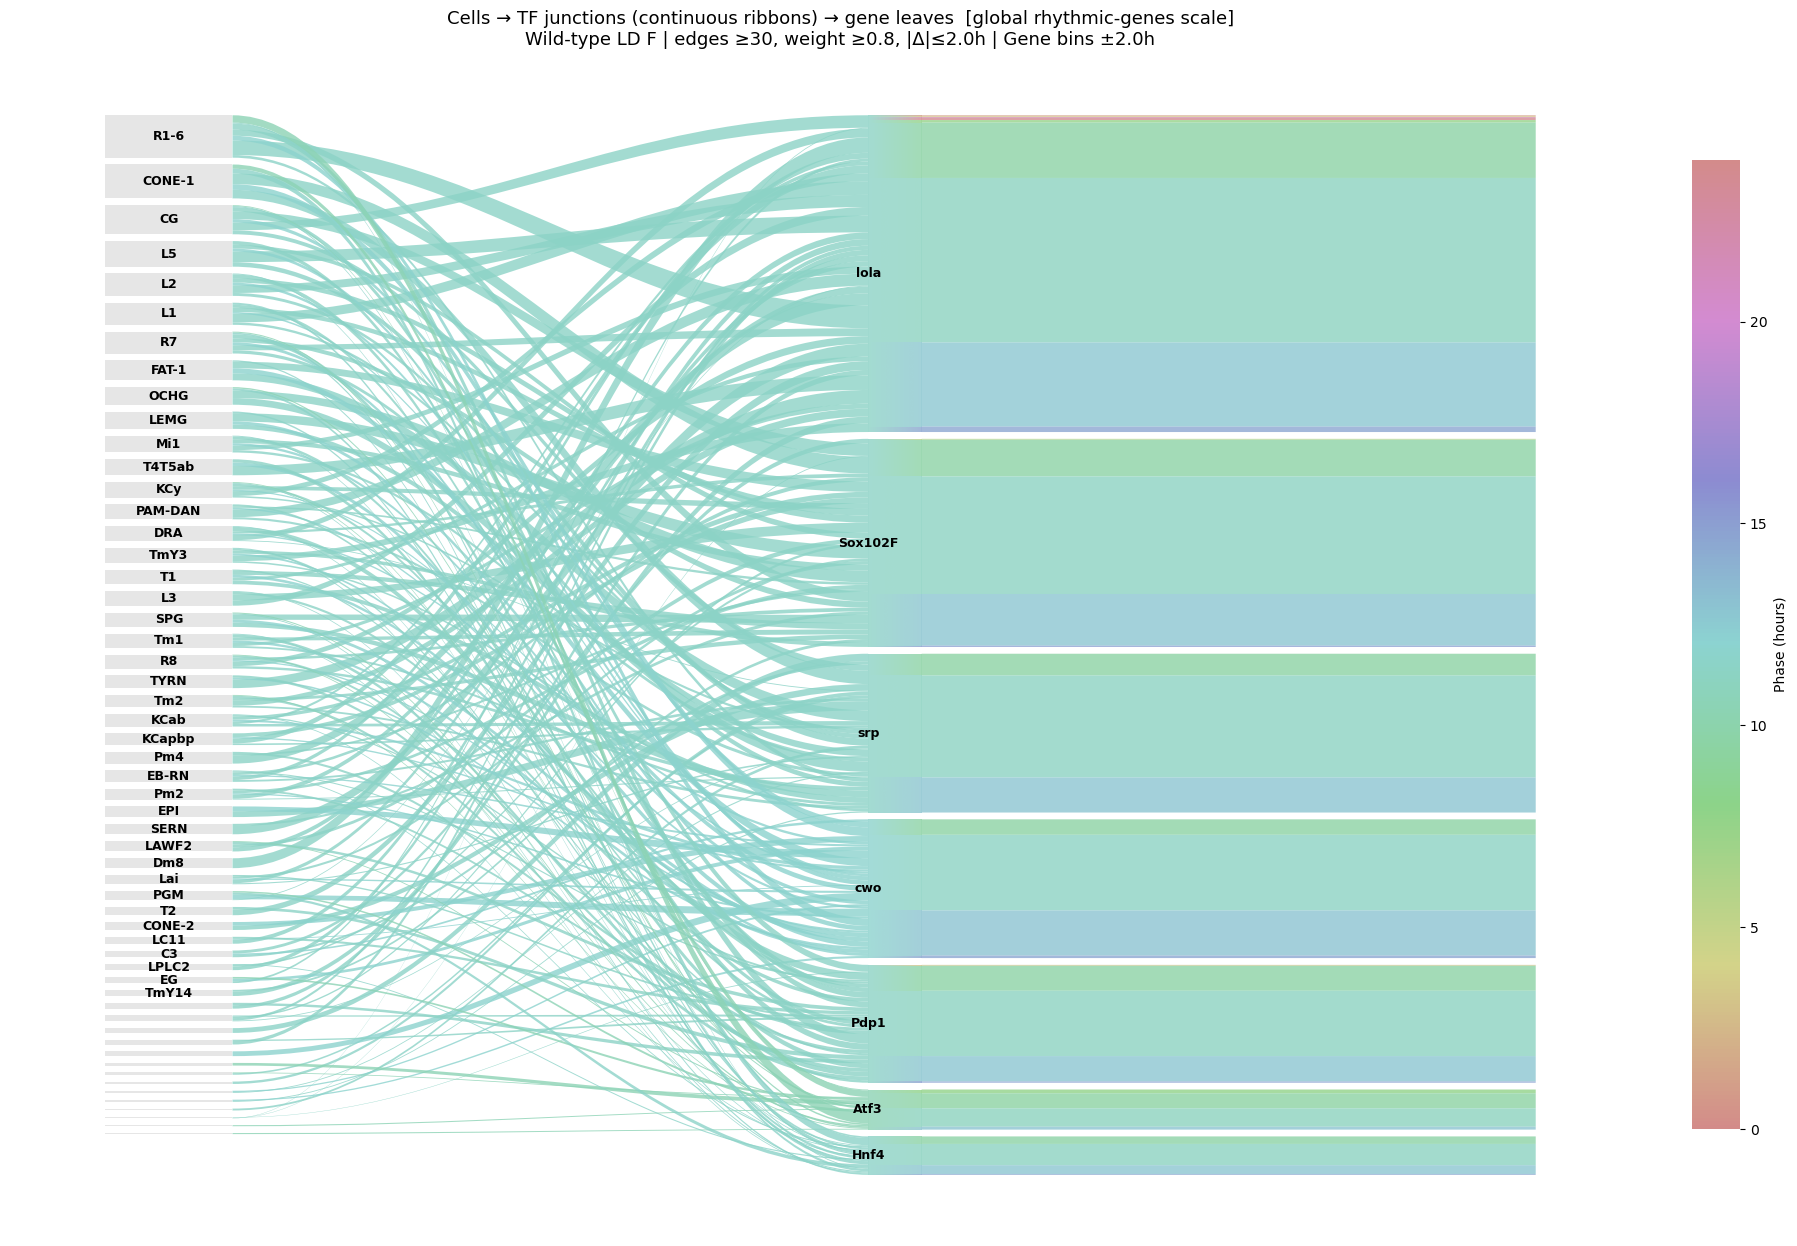

→ Wild-type LD M → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_Wildtype_LD_M.png
saved → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_Wildtype_LD_M.png


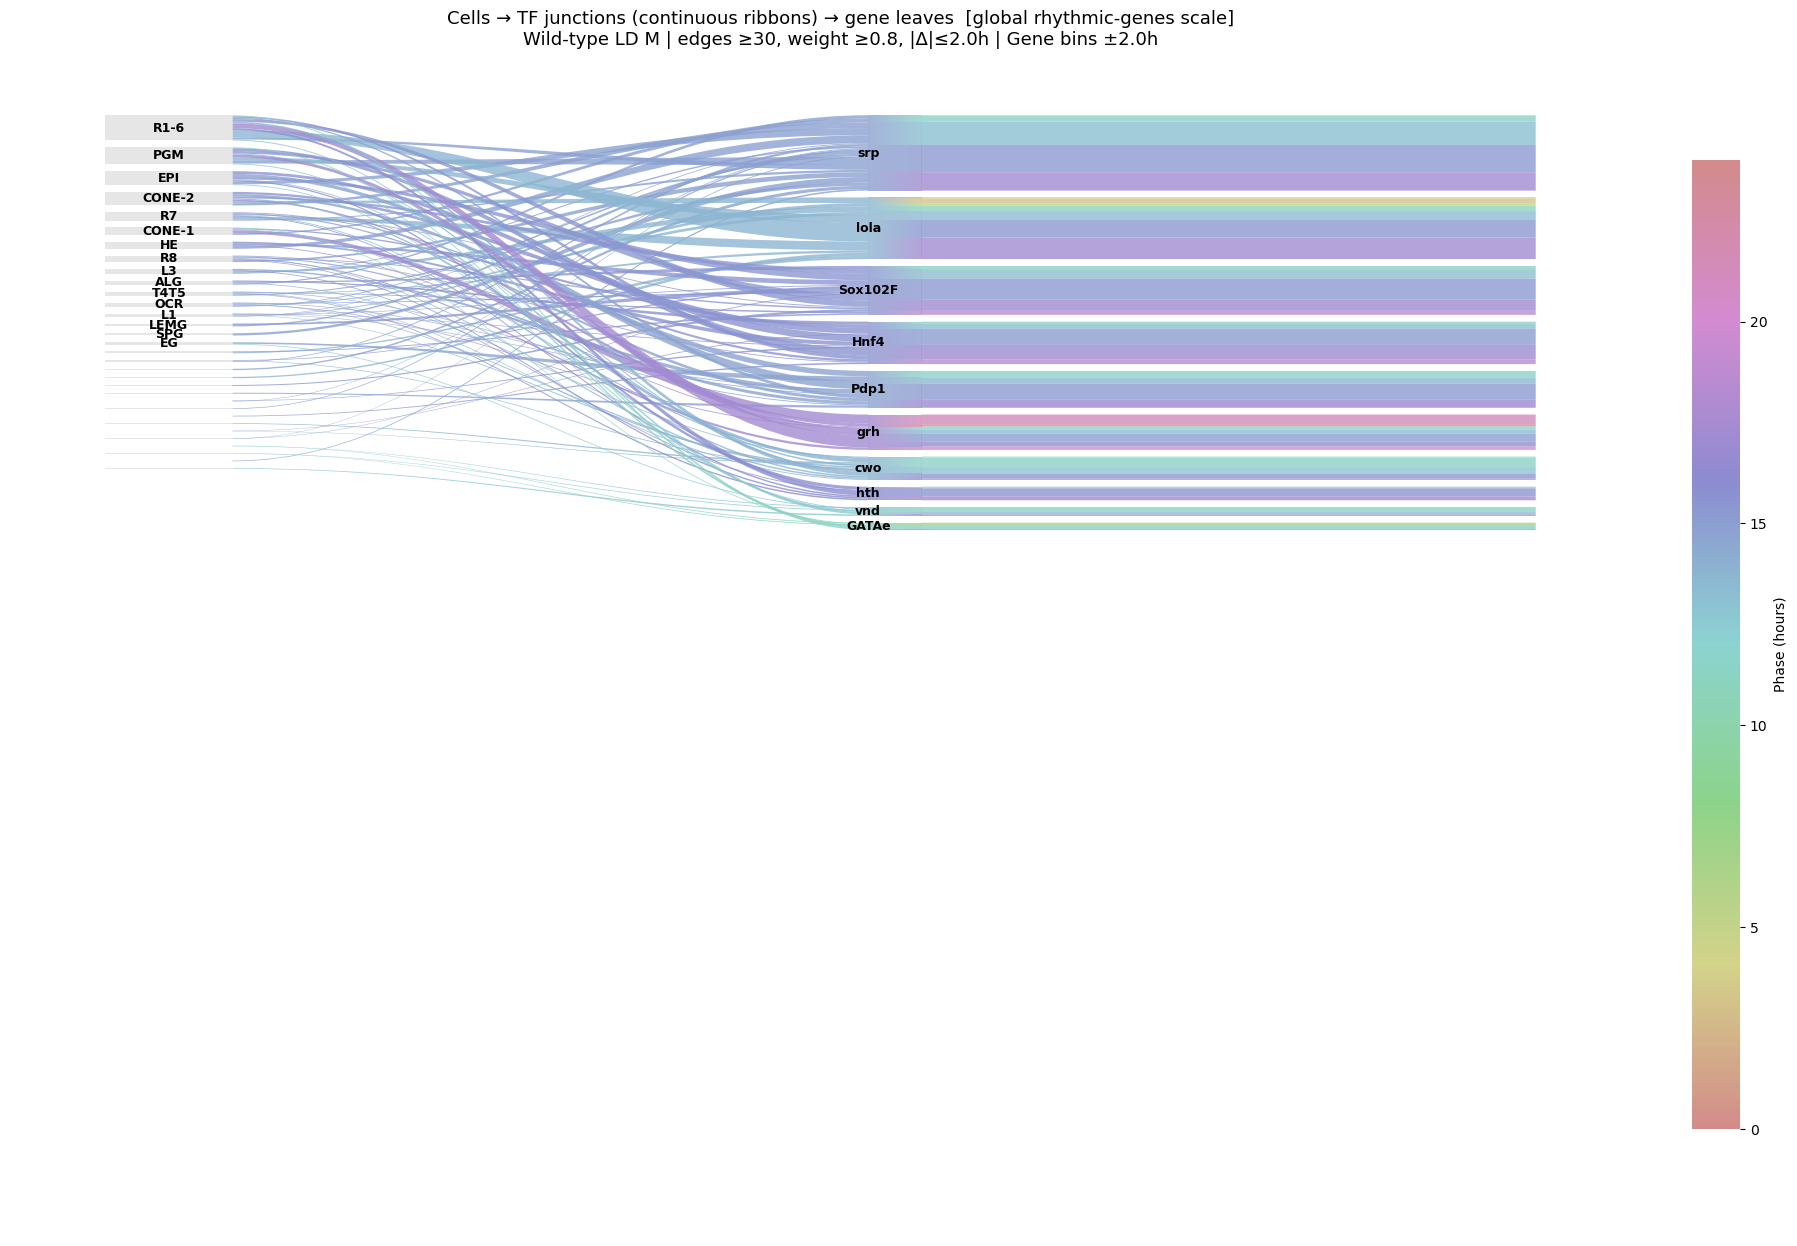

→ Wild-type DD F → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_Wildtype_DD_F.png
saved → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_Wildtype_DD_F.png


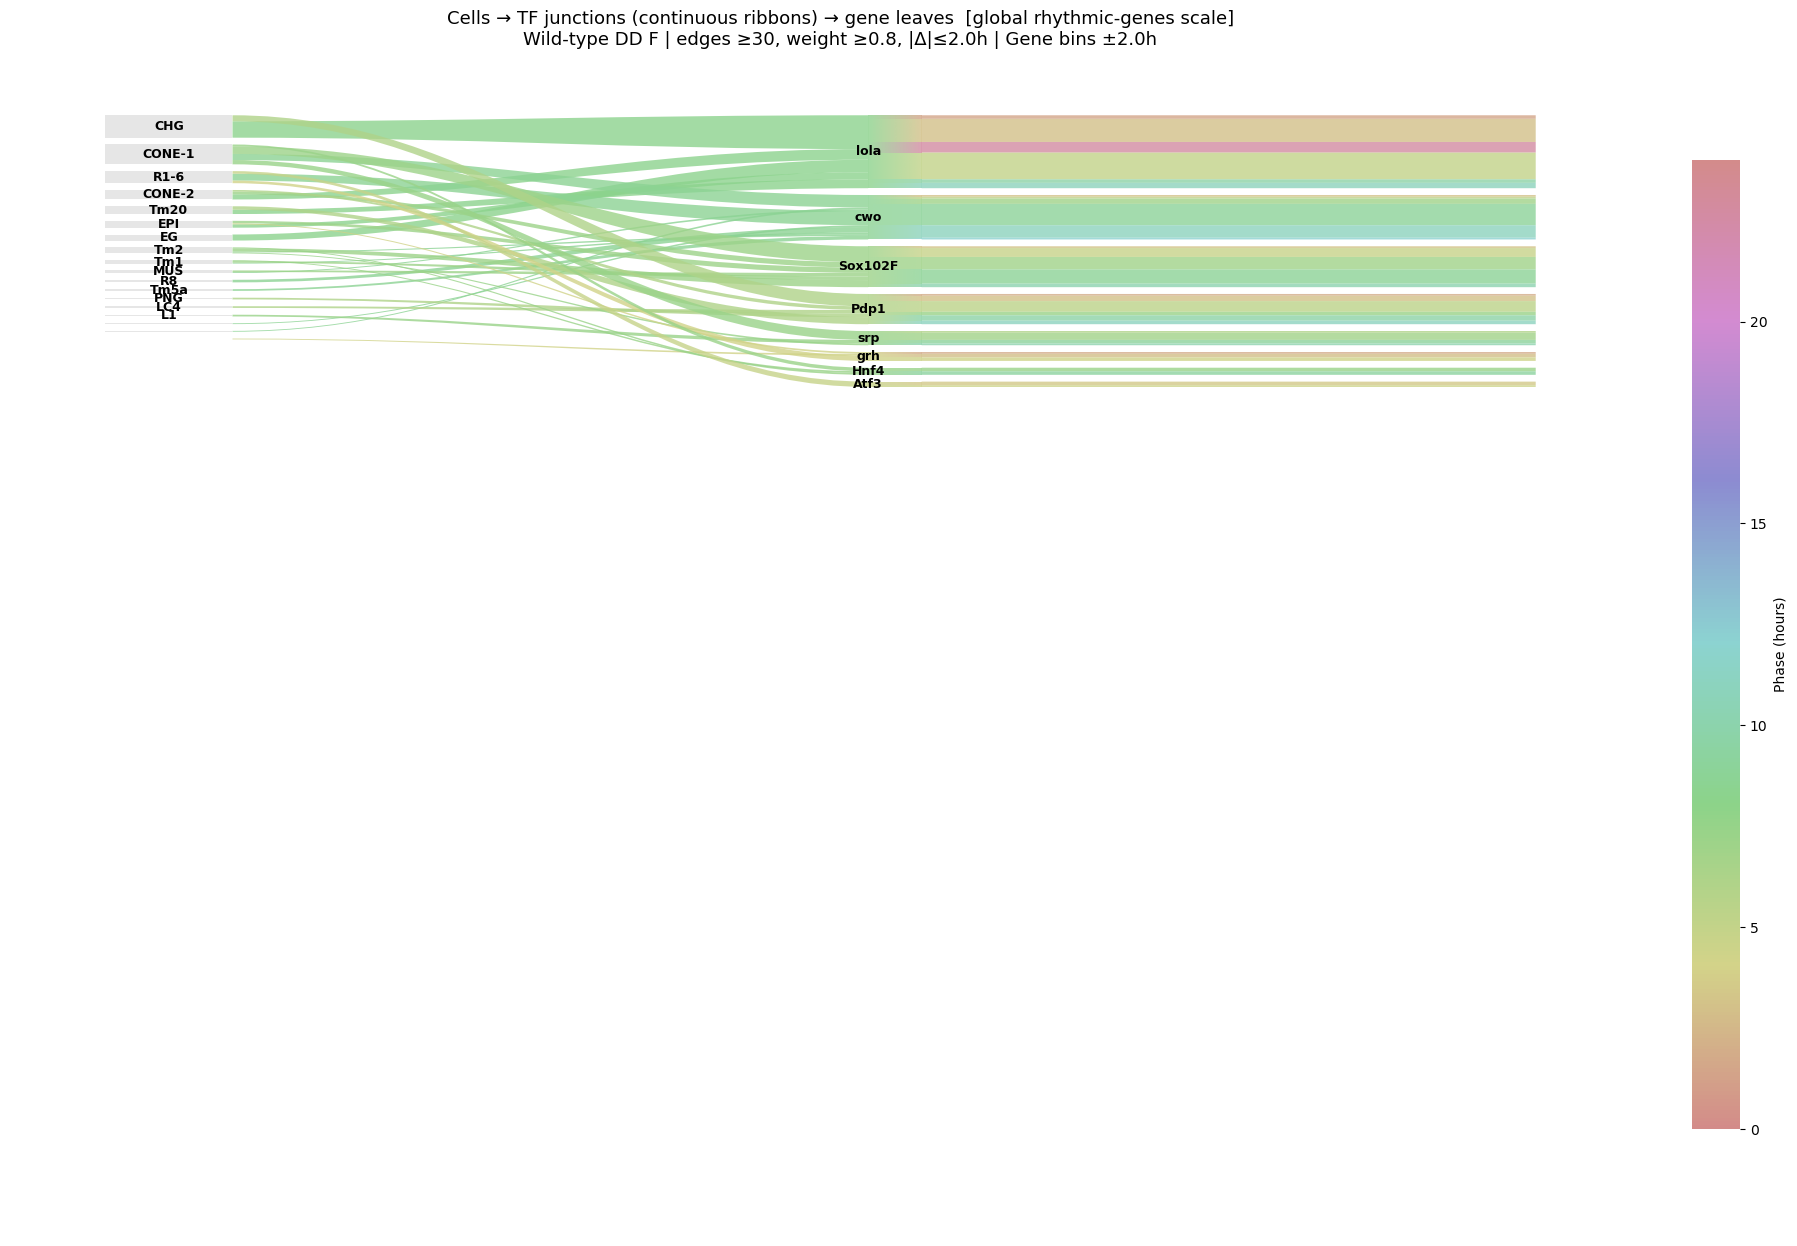

→ Wild-type DD M → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_Wildtype_DD_M.png
saved → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_Wildtype_DD_M.png


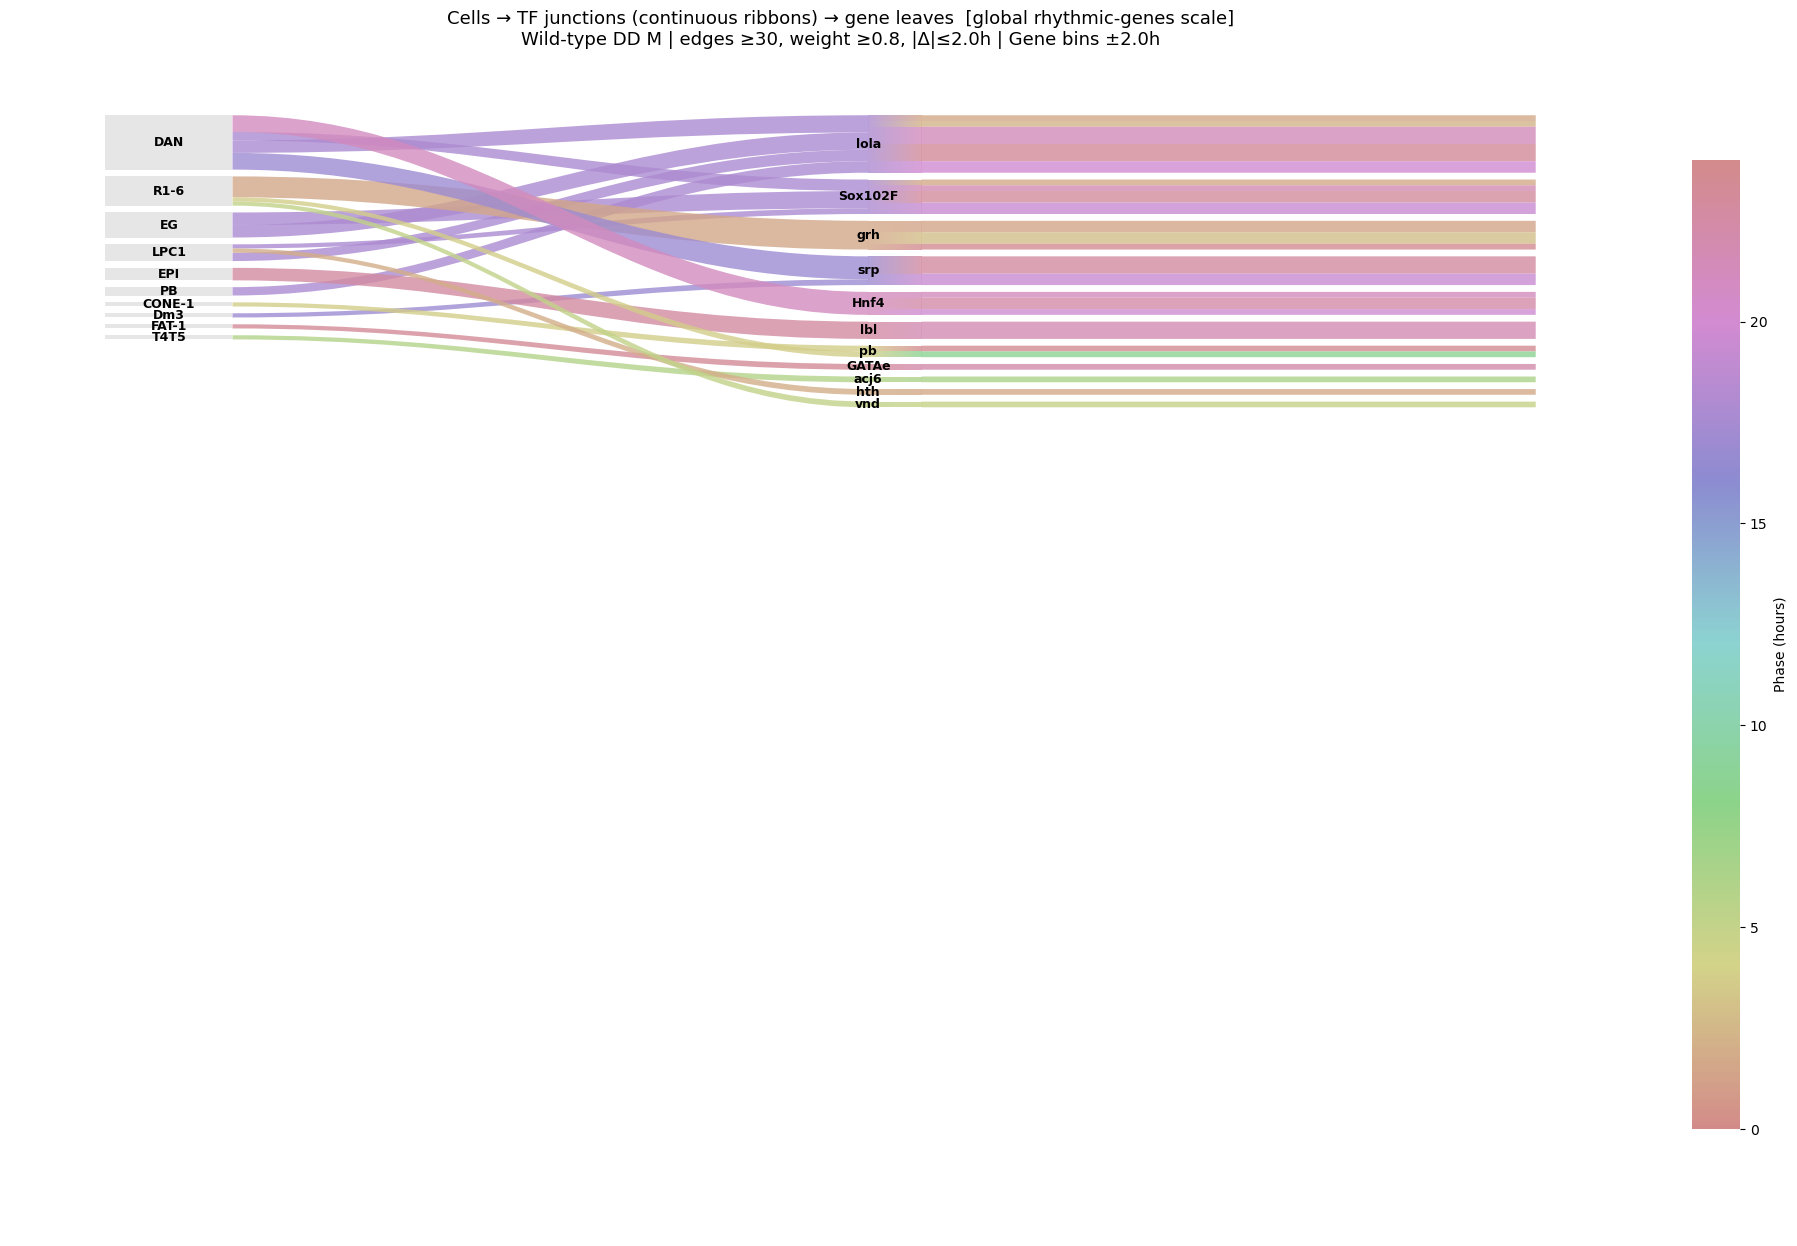

→ per0 LD F → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_per0_LD_F.png
saved → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_per0_LD_F.png


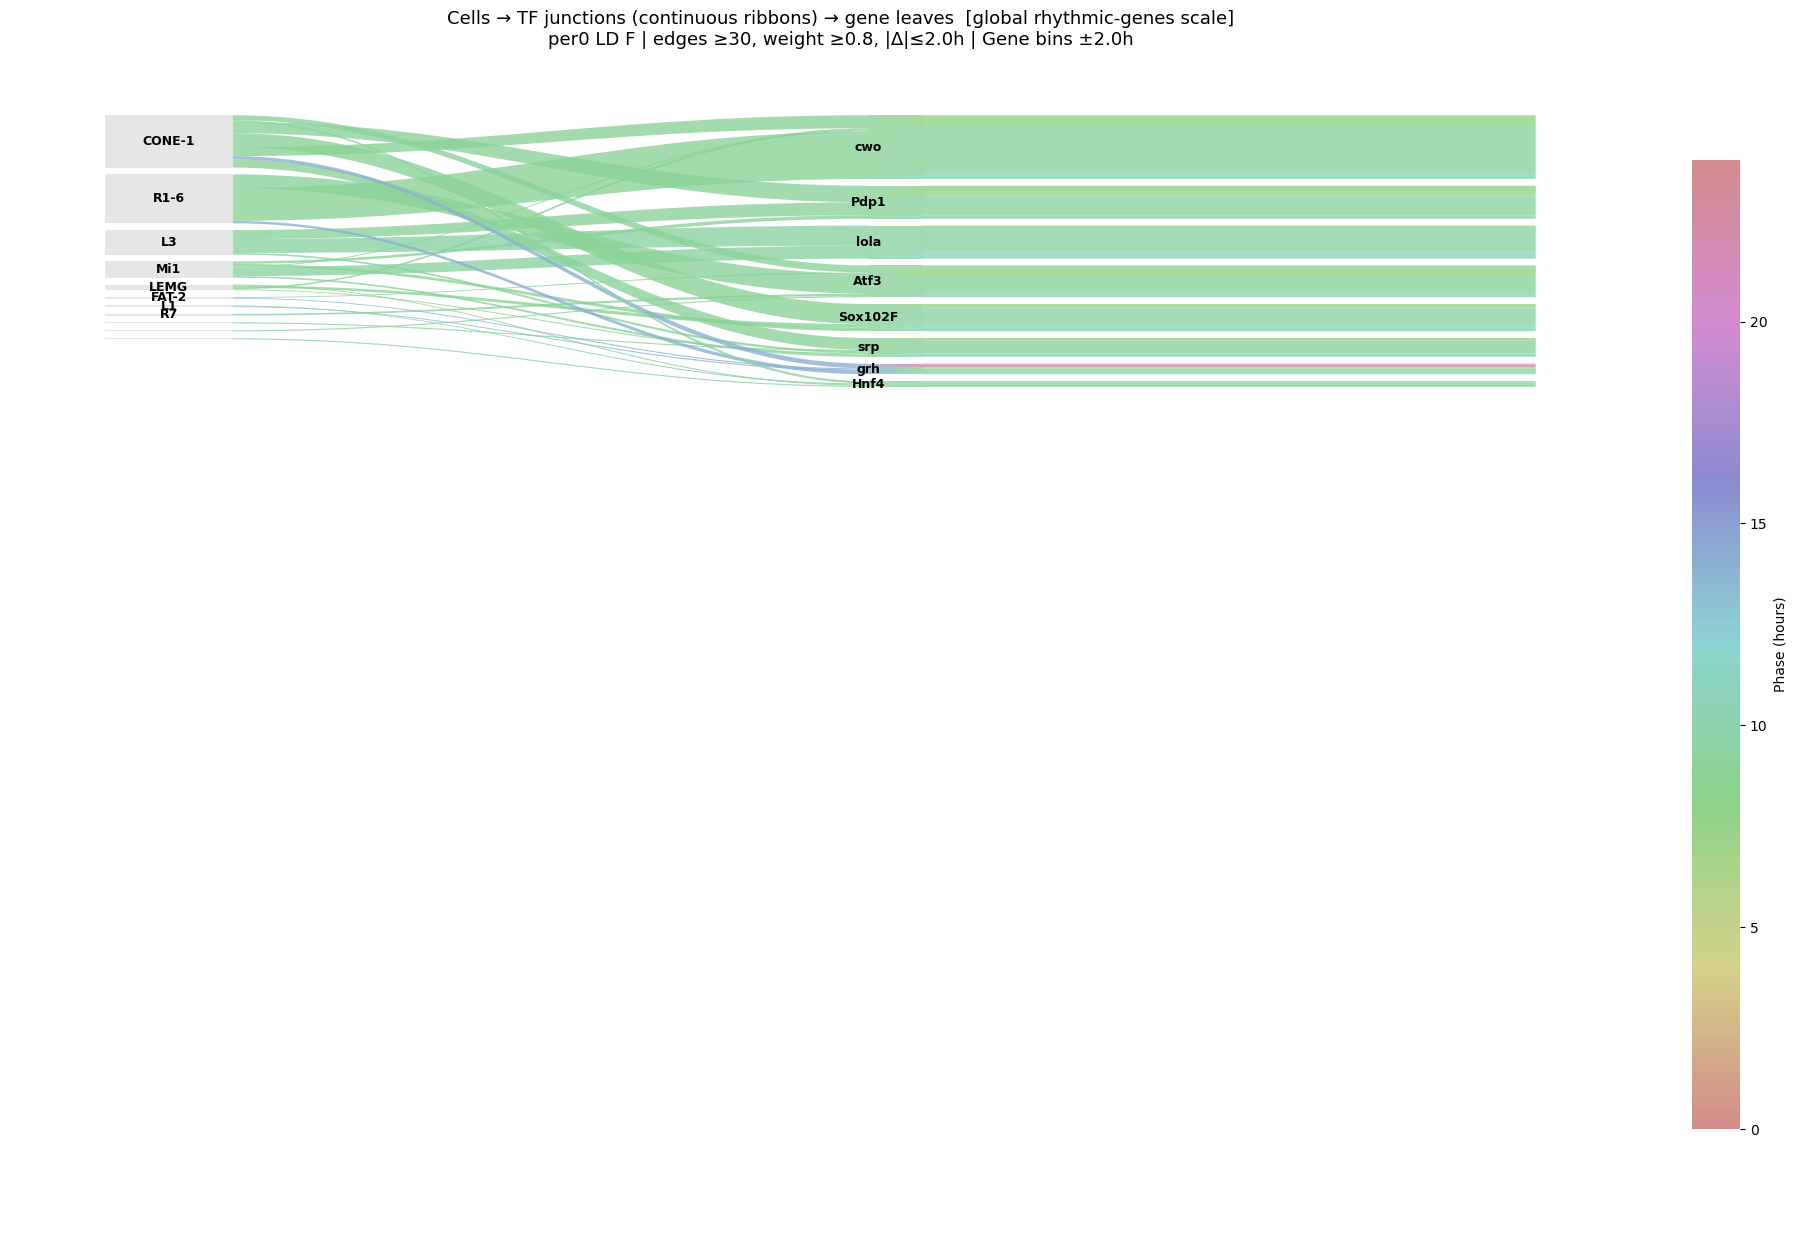

→ per0 LD M → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_per0_LD_M.png
saved → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_per0_LD_M.png


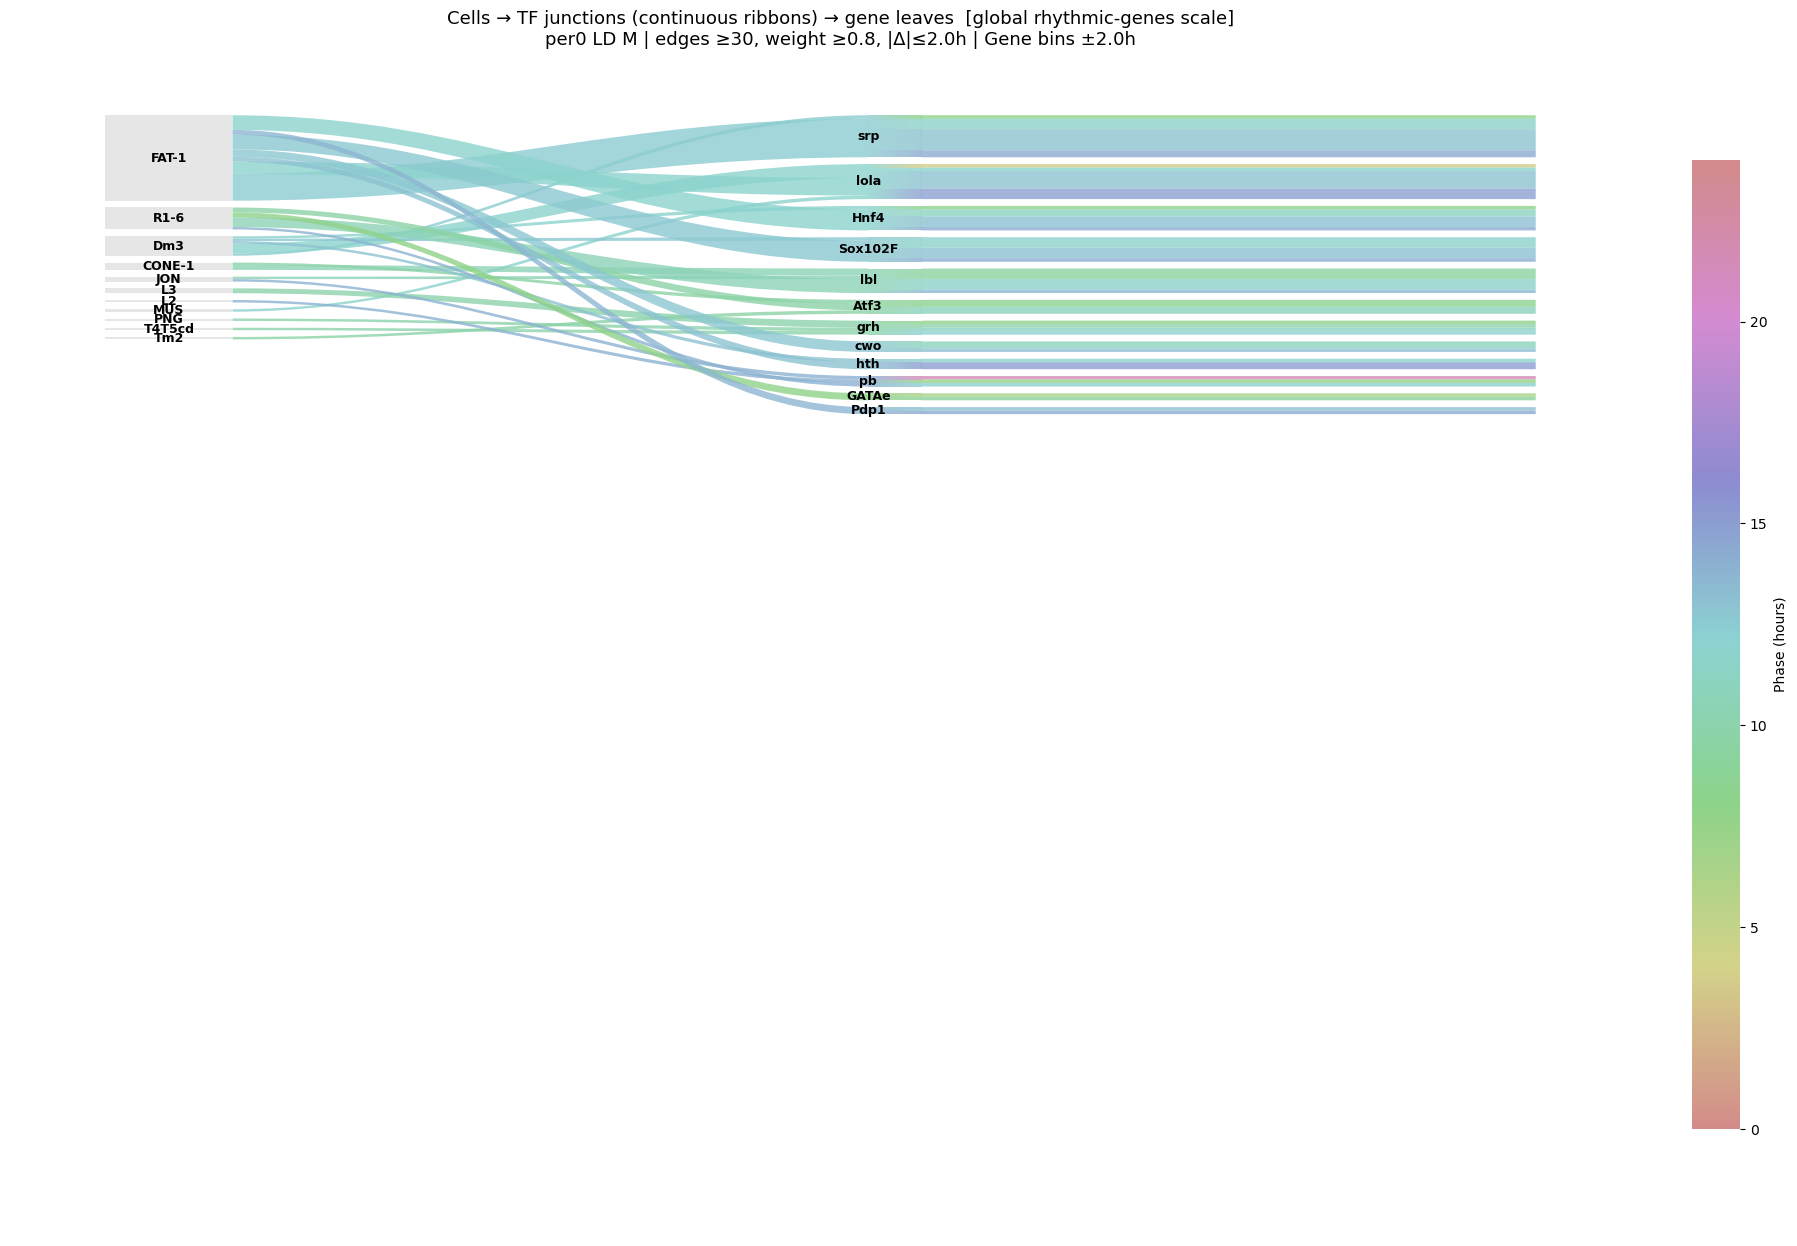

→ per0 DD F → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_per0_DD_F.png
saved → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_per0_DD_F.png


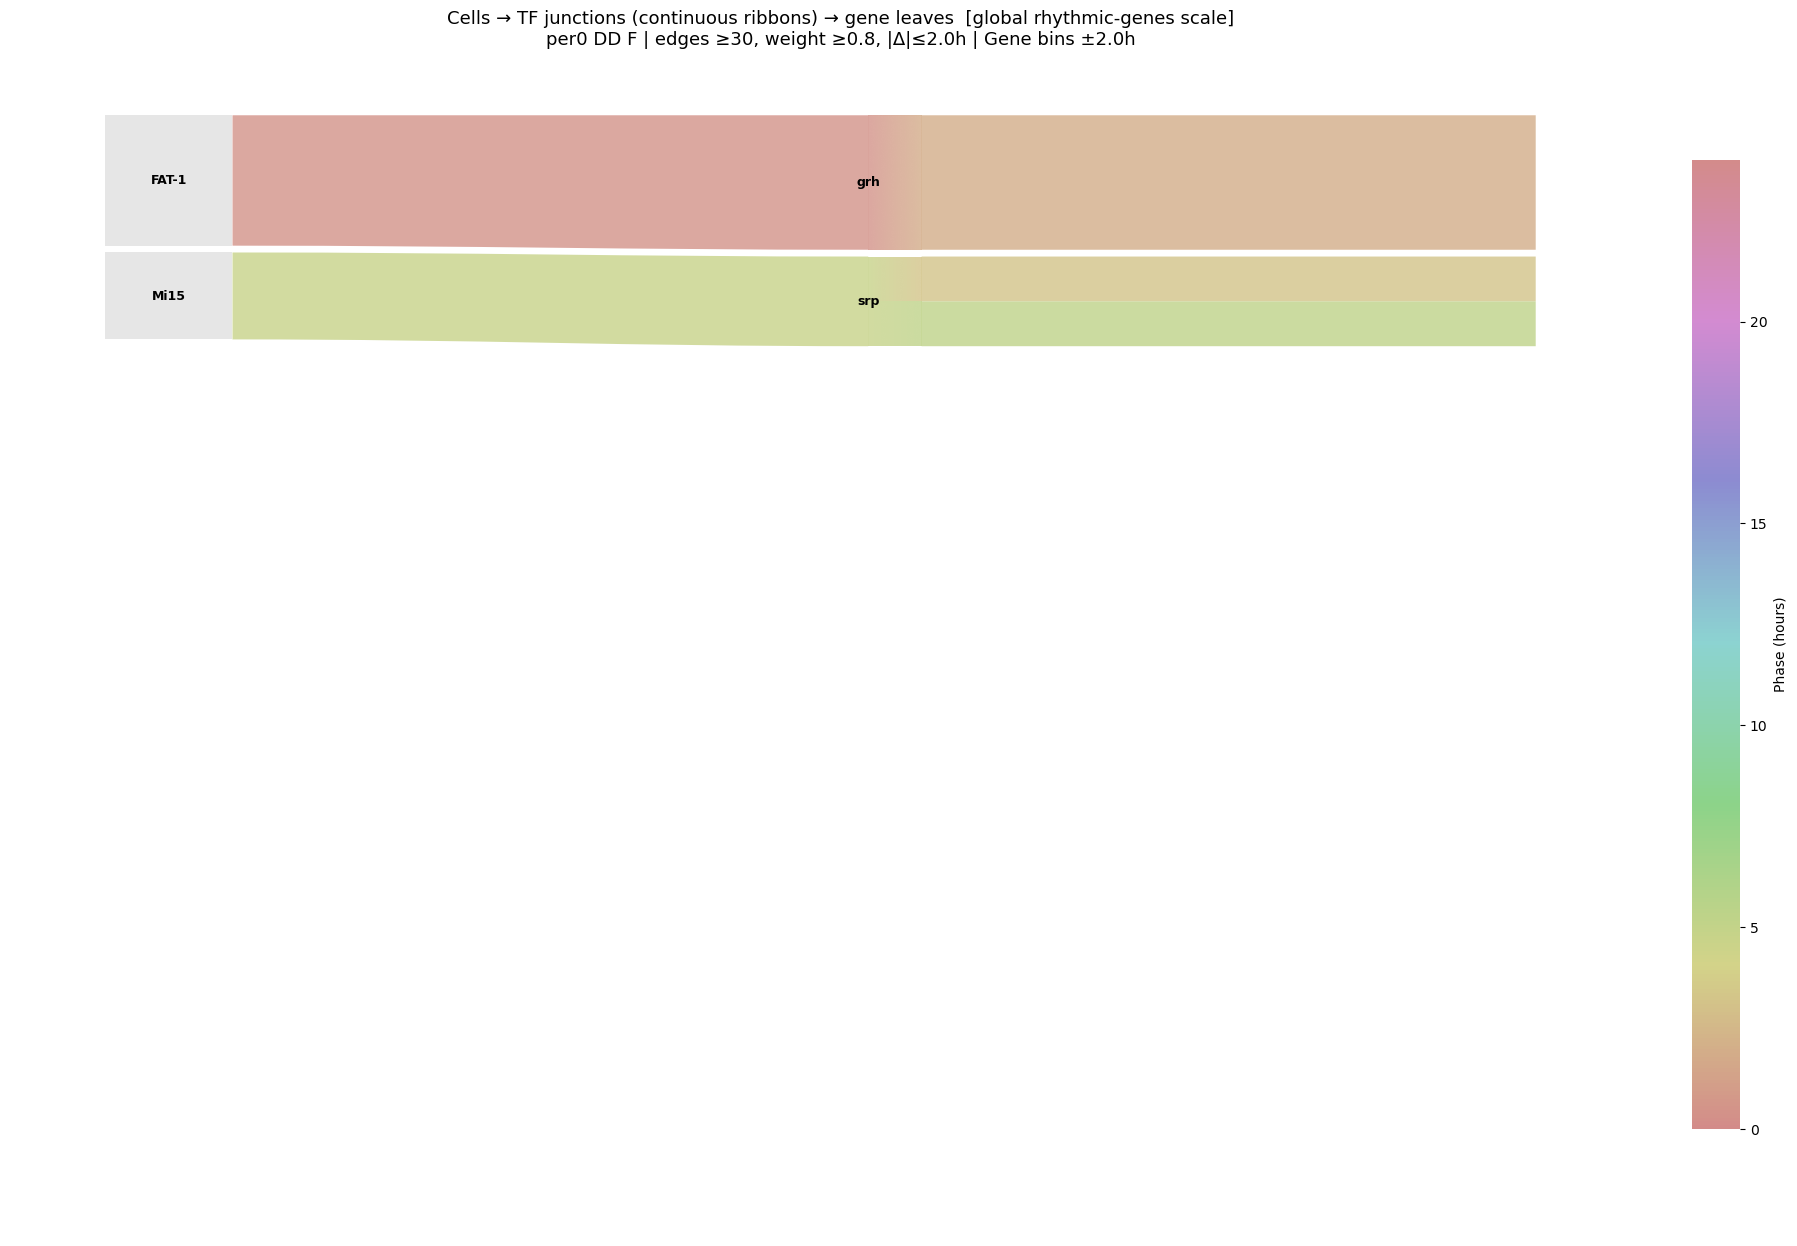

→ per0 DD M → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_per0_DD_M.png
saved → /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid/sankey_per0_DD_M.png


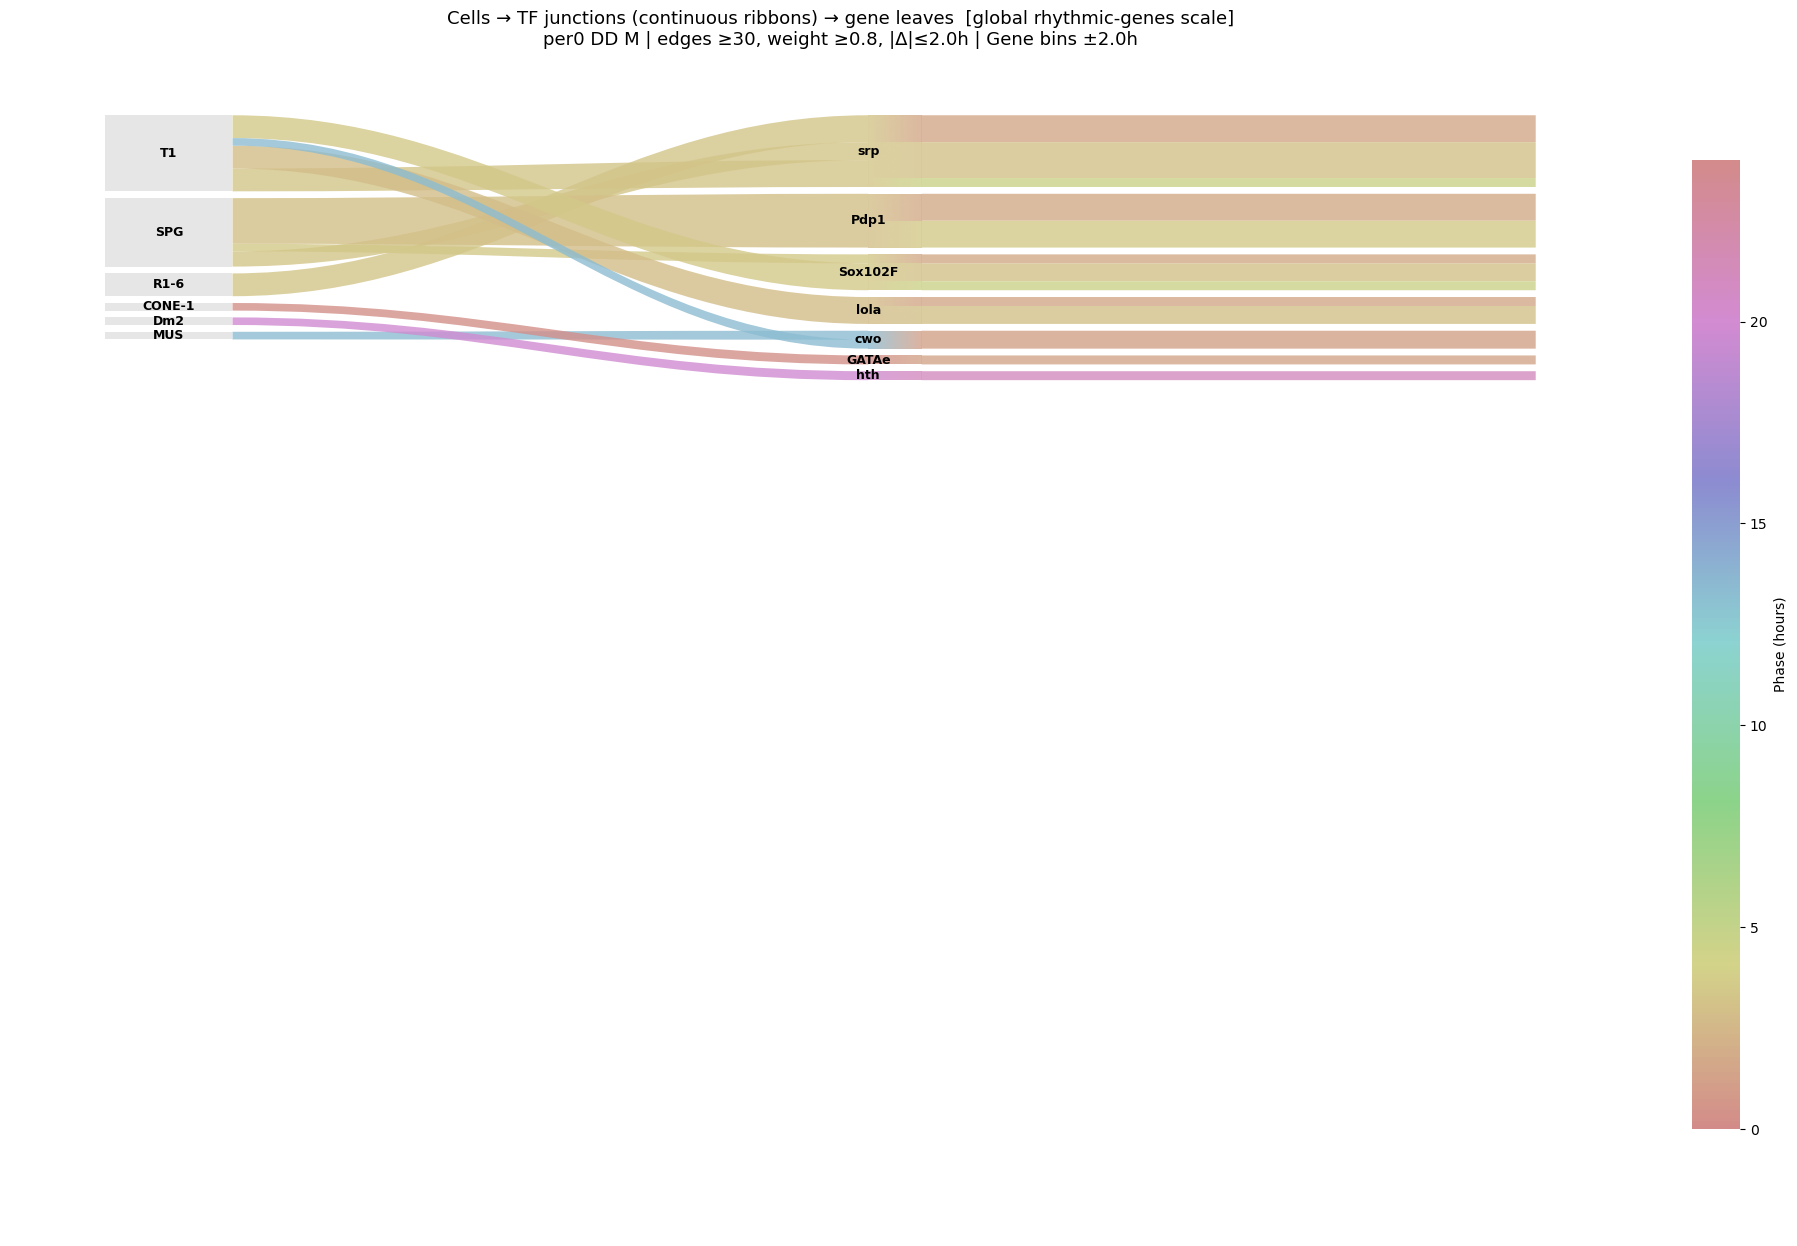

In [26]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, PathPatch
from matplotlib.path import Path
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import colorsys

# =========================
# Helpers
# =========================
# --- painterly phase colors (oilwheel) ---
def _phase_to_oil_rgb(phase, sat=0.45, light=0.60, warm_glaze=0.18, gamma=0.90):
    """
    Map 0–24h phase → soft 'oil painting' RGB:
      - HLS wheel (constant lightness + reduced saturation)
      - gentle gamma to soften primaries
      - warm canvas glaze (blend toward warm ivory)
    """
    if phase is None or (isinstance(phase, float) and np.isnan(phase)):
        h = 0.0
    else:
        h = (float(phase) % 24.0) / 24.0

    r, g, b = colorsys.hls_to_rgb(h, light, sat)     # NOTE: colorsys uses H L S
    rgb = np.array([r, g, b], float)

    # soften with a mild gamma (values <1 darken/saturate mid-tones a bit)
    rgb = np.clip(rgb, 0, 1) ** gamma

    # warm ivory canvas glaze
    warm = np.array([0.965, 0.95, 0.90])
    rgb = (1.0 - warm_glaze) * rgb + warm_glaze * warm

    return np.clip(rgb, 0, 1)

def hsv24(phase):
    """Backwards-compatible name: return RGBA using the painterly oil palette."""
    rgb = _phase_to_oil_rgb(phase)
    return (rgb[0], rgb[1], rgb[2], 1.0)

def make_oilwheel_cmap(n=256, **kwargs):
    """Cyclic colormap for the colorbar using the same oil palette."""
    phases = np.linspace(0, 24, n, endpoint=False)
    colors = [_phase_to_oil_rgb(p, **kwargs) for p in phases]
    return mcolors.ListedColormap(colors, name="oilwheel")


def circmean24(ph, w=None):
    """Circular mean of phases (0–24 h)."""
    ph = np.asarray(ph, float) % 24.0
    if w is None:
        w = np.ones_like(ph, float)
    ang = 2*np.pi*ph/24.0
    C = np.sum(w*np.cos(ang)); S = np.sum(w*np.sin(ang))
    if C == 0 and S == 0:
        return np.nan
    a = np.arctan2(S, C)
    if a < 0: a += 2*np.pi
    return a * 24.0 / (2*np.pi)

def tapered_band(x0, y0, h0, x1, y1, h1, curv=0.35, alpha=0.6, color=(0.6,0.6,0.6)):
    """Smooth curved ribbon between two vertical spans."""
    c1x = x0 + curv * (x1 - x0)
    c2x = x1 - curv * (x1 - x0)
    y0t = y0 + h0
    y1t = y1 + h1
    verts = [
        (x0, y0), (c1x, y0), (c2x, y1), (x1, y1),
        (x1, y1t), (c2x, y1t), (c1x, y0t), (x0, y0t), (x0, y0)
    ]
    codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4,
             Path.LINETO, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CLOSEPOLY]
    return PathPatch(Path(verts, codes),
                     facecolor=(color[0], color[1], color[2], alpha),
                     edgecolor='none')

def addp(ax, patch):
    """Add patch and clip to axes bounds."""
    patch.set_clip_on(True)
    patch.set_clip_path(ax.patch)
    ax.add_patch(patch)

def _stack_spans_softmin(keys, weights, top, bot, gap=0.0, min_h_frac=0.0):
    """
    Stack with a soft minimum height per slice (axis fraction), then renormalize
    so the column fills the available space.
    """
    keys = list(keys)
    w = np.asarray(list(weights), float)
    Htot = (top - bot)
    if w.sum() <= 0 or Htot <= 0:
        n = max(1, len(keys))
        h = np.ones(n) * (Htot / n)
    else:
        h = (w / w.sum()) * Htot
    if min_h_frac > 0:
        total_gap = gap * max(0, len(keys) - 1)
        avail = max(Htot - total_gap, 1e-9)
        h = np.maximum(h, min_h_frac * 1.0)  # axis fraction already
        h = h * (avail / h.sum())
    spans = {}
    y = top
    for k, hi in zip(keys, h):
        spans[k] = (y - hi, hi)
        y -= (hi + gap)
    return spans

def gradient_quad(ax, x0, x1, y0_left, y1_left, y0_right, y1_right, cL_rgba, cR_rgba, alpha_override=None):
    """Horizontal gradient inside a convex quadrilateral."""
    verts = [(x0, y0_left), (x0, y1_left), (x1, y1_right), (x1, y0_right), (x0, y0_left)]
    codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
    poly = Path(verts, codes)
    patch = PathPatch(poly, facecolor='none', edgecolor='none')
    ax.add_patch(patch)

    N = 256
    arr = np.zeros((1, N, 4), float)
    cL = np.array(cL_rgba); cR = np.array(cR_rgba)
    if alpha_override is not None:
        cL[3] = alpha_override; cR[3] = alpha_override
    for k in range(4):
        arr[0, :, k] = np.linspace(cL[k], cR[k], N)

    x_min, x_max = min(x0,x1), max(x0,x1)
    y_min = min(y0_left, y1_left, y0_right, y1_right)
    y_max = max(y0_left, y1_left, y0_right, y1_right)

    im = ax.imshow(arr, extent=(x_min, x_max, y_min, y_max), origin='lower', aspect='auto')
    im.set_clip_path(patch)
    return patch

# =========================
# Global metric helpers
# =========================
def _condition_metric(tf_gene_map, genotype, light, sex,
                      exclude_cells, min_edge_count, min_edge_weight, max_abs_delta_h,
                      metric="span"):
    df = tf_gene_map.query("genotype==@genotype and light==@light and sex==@sex").copy()
    if exclude_cells:
        df = df.loc[~df["cell_type"].isin(exclude_cells)]
    if min_edge_count is not None:
        df = df.loc[df.edge_count >= min_edge_count]
    if min_edge_weight is not None:
        df = df.loc[df.edge_weight >= min_edge_weight]
    if max_abs_delta_h is not None:
        df = df.loc[df.delta_h.abs() <= max_abs_delta_h]
    tf_set = set(df.TF.unique())
    df = df.loc[~df.Target.isin(tf_set)].copy()
    if df.empty:
        return 0.0

    if metric == "rhythmic_genes":
        # unique genes with defined phase
        return float(df.loc[df["gene_phase"].notna(), "Target"].nunique())

    # default: span (= sum of per-TF max(inflow,outflow))
    c2tf = (df.groupby(["cell_type","TF"], as_index=False)
              .agg(flow=("Target","nunique")).rename(columns={"TF":"TFid"}))
    tf2leaf = (df.assign(LeafID=df["Target"])
                 .groupby(["TF","LeafID"], as_index=False)
                 .agg(flow=("LeafID","size")).rename(columns={"TF":"TFid"}))
    tf_in   = c2tf.groupby("TFid", as_index=False)["flow"].sum().rename(columns={"flow":"inflow"})
    tf_out  = tf2leaf.groupby("TFid", as_index=False)["flow"].sum().rename(columns={"flow":"outflow"})
    TFs = pd.merge(tf_in, tf_out, on="TFid", how="outer").fillna(0.0)
    return float(TFs[["inflow","outflow"]].max(axis=1).sum())

def compute_global_max(tf_gene_map, genotypes, lights, sexes,
                       exclude_cells=("Unannotated",),
                       min_edge_count=30, min_edge_weight=0.8, max_abs_delta_h=2.0,
                       metric="span"):
    mx = 0.0
    for g in genotypes:
        for L in lights:
            for s in sexes:
                mx = max(mx, _condition_metric(tf_gene_map, g, L, s,
                                               exclude_cells, min_edge_count, min_edge_weight, max_abs_delta_h,
                                               metric=metric))
    return mx

# =========================
# Main plotter (continuous ribbons; global/local scaling)
# =========================
def sankey_cells_TFs_genes_bilobed(
    tf_gene_map,
    genotype="Wild-type", light="LD", sex="F",
    exclude_cells=("Unannotated",),

    # thresholds / pruning
    min_edge_count=30, min_edge_weight=0.8, max_abs_delta_h=2.0,
    min_cell_frac=None,           # keep all cells by default
    min_tf_frac=0.015,            # drop TFs contributing <1.5% within panel
    label_min_frac=0.006,         # label only if tall enough

    # soft minimum visual heights (fractions of axis height)
    min_cell_h_frac=0.0015,       # ~0.15%
    min_slice_h_frac=0.0008,      # within TFs

    # binning
    tf_window_h=None,
    gene_window_h=2.0,
    min_leaf_size=1,

    # layout & size
    figsize=(20, 14),
    x_cell=0.10, x_tfL=0.46, x_tfR=0.54, x_leaf=0.92,
    column_top=0.95, column_bottom=0.05, col_gap=0.006,
    borderless=True,

    # ribbon alphas
    alpha_left=0.80,              # cell→TF
    alpha_right=0.80,             # TF→leaf

    # gradient throat at arrow starts
    right_throat_frac=0.08,

    # vertical scaling controls
    scale_by="rhythmic_genes",    # "rhythmic_genes" or "span"
    global_scale_max=None,        # supply from compute_global_max(...)
    vscale_mode="global",         # "global" or "local"
    min_panel_scale=0.22,         # keep sparse panels readable
    scale_exponent=1.0,           # 1.0 linear; <1 compresses dynamic range

    savepath=None
):
    # ---------- filter rows ----------
    df = tf_gene_map.query("genotype==@genotype and light==@light and sex==@sex").copy()
    if exclude_cells:
        df = df.loc[~df["cell_type"].isin(exclude_cells)]
    if min_edge_count is not None:
        df = df.loc[df.edge_count >= min_edge_count]
    if min_edge_weight is not None:
        df = df.loc[df.edge_weight >= min_edge_weight]
    if max_abs_delta_h is not None:
        df = df.loc[df.delta_h.abs() <= max_abs_delta_h]

    # remove TF self-targets
    tf_set = set(df.TF.unique())
    df = df.loc[~df.Target.isin(tf_set)].copy()
    if df.empty:
        print("No data after filtering.")
        return

    # flows
    c2tf = (df.groupby(["cell_type","TF"], as_index=False)
              .agg(flow=("Target","nunique")).rename(columns={"TF":"TFid"}))

    # --- RIGHT SIDE: use TOTAL GENE INSTANCES (row counts), not unique genes ---
    if gene_window_h is None:
        df["LeafID"] = df["TF"].astype(str) + "::" + df["Target"].astype(str)
    else:
        df["gene_bin"] = np.floor((df["gene_phase"] % 24)/gene_window_h).astype(int)
        df["LeafID"] = df["TF"].astype(str) + "::" + df["gene_bin"].astype(str)

    tf2leaf = (df.groupby(["TF","LeafID"], as_index=False)
                 .agg(flow=("Target","size"))            # ← TOTAL counts (not nunique)
                 .rename(columns={"TF":"TFid"}))
    tf2leaf = tf2leaf.loc[tf2leaf["flow"] >= min_leaf_size]

    # phases
    tf_phase_avg = (df.groupby("TF", as_index=False)["tf_phase"]
                      .mean().set_index("TF")["tf_phase"].to_dict())
    leaf_phase = (df.groupby("LeafID", as_index=False)["gene_phase"]
                    .mean().set_index("LeafID")["gene_phase"].to_dict())

    # ----- panel metric for vertical scaling -----
    if scale_by == "rhythmic_genes":
        panel_metric = float(df.loc[df["gene_phase"].notna(), "Target"].nunique())
        metric_tag = "global rhythmic-genes scale"
    else:
        tf_in   = c2tf.groupby("TFid", as_index=False)["flow"].sum().rename(columns={"flow":"inflow"})
        tf_out  = tf2leaf.groupby("TFid", as_index=False)["flow"].sum().rename(columns={"flow":"outflow"})
        TFs_for_scale = pd.merge(tf_in, tf_out, on="TFid", how="outer").fillna(0.0)
        panel_metric = float(TFs_for_scale[["inflow","outflow"]].max(axis=1).sum())
        metric_tag = "global span scale"

    # geometry
    full_col_height = column_top - column_bottom
    if vscale_mode == "global" and global_scale_max and global_scale_max > 0:
        ratio = panel_metric / global_scale_max
        ratio = max(min_panel_scale, ratio ** scale_exponent)
        colH = full_col_height * ratio
        top_eff, bot_eff = column_top, column_top - colH  # top-anchored
    else:
        colH = full_col_height
        top_eff, bot_eff = column_top, column_bottom

    # prune tiny TFs within this panel
    tf_in   = c2tf.groupby("TFid", as_index=False)["flow"].sum().rename(columns={"flow":"inflow"})
    tf_out  = tf2leaf.groupby("TFid", as_index=False)["flow"].sum().rename(columns={"flow":"outflow"})
    TFs = pd.merge(tf_in, tf_out, on="TFid", how="outer").fillna(0.0)
    TFs["span"] = TFs[["inflow","outflow"]].max(axis=1)
    panel_total_span = float(TFs["span"].sum())
    TFs["frac"] = TFs["span"] / (panel_total_span if panel_total_span > 0 else 1.0)
    keep_tfs = set(TFs.loc[TFs["frac"] >= min_tf_frac, "TFid"])
    TFs = TFs.loc[TFs["TFid"].isin(keep_tfs)].copy()
    c2tf = c2tf.loc[c2tf["TFid"].isin(keep_tfs)]
    tf2leaf = tf2leaf.loc[tf2leaf["TFid"].isin(keep_tfs)]
    if TFs.empty:
        print("No TFs after filtering.")
        return

    # optionally prune cells; default is keep all
    if isinstance(min_cell_frac, (int, float)) and min_cell_frac is not None:
        cell_tot_all = c2tf.groupby("cell_type", as_index=False)["flow"].sum().rename(columns={"flow":"total"})
        grand_all = float(cell_tot_all["total"].sum())
        keep_cells = set(cell_tot_all.loc[cell_tot_all["total"]/max(grand_all,1.0) >= float(min_cell_frac), "cell_type"])
        if keep_cells:
            c2tf = c2tf.loc[c2tf["cell_type"].isin(keep_cells)].copy()
            df = df.loc[df["cell_type"].isin(keep_cells)].copy()

    # cells layout with soft-min
    cell_tot = c2tf.groupby("cell_type", as_index=False)["flow"].sum().rename(columns={"flow":"total"})
    cells_sorted = cell_tot.sort_values("total", ascending=False).reset_index(drop=True)
    cell_spans = _stack_spans_softmin(
        cells_sorted["cell_type"], cells_sorted["total"], top_eff, bot_eff,
        gap=col_gap, min_h_frac=min_cell_h_frac
    )

    # per-cell → TF subspans (left side)
    cell_to_tf_spans = {}
    for ct, grp in c2tf.groupby("cell_type"):
        b, H = cell_spans[ct]
        cell_to_tf_spans[ct] = _stack_spans_softmin(
            grp["TFid"].tolist(), grp["flow"].to_numpy(), b+H, b,
            gap=0.0, min_h_frac=min_slice_h_frac
        )

    # TF layout as continuous ribbons
    scale = (colH / float(TFs["span"].sum())) if float(TFs["span"].sum()) > 0 else 0.0
    TFs = TFs.sort_values("span", ascending=False).reset_index(drop=True)
    TFs["Hin_s"]  = TFs["inflow"]  * scale
    TFs["Hout_s"] = TFs["outflow"] * scale

    tf_geom = {}
    y_cursor = top_eff
    for _, r in TFs.iterrows():
        tf   = r["TFid"]
        Hin  = float(r["Hin_s"])
        Hout = float(r["Hout_s"])
        Hmax = max(Hin, Hout) if (Hin>0 or Hout>0) else 0.0
        yc   = y_cursor - Hmax/2.0
        y_split = yc - Hmax/2.0

        yL = yc - Hin/2.0
        yR = yc - Hout/2.0

        left_scaled = {}
        if Hin > 0 and tf in c2tf["TFid"].values:
            spans = _stack_spans_softmin(
                c2tf.loc[c2tf["TFid"]==tf, "cell_type"],
                c2tf.loc[c2tf["TFid"]==tf, "flow"],
                yL+Hin, yL, gap=0.0, min_h_frac=min_slice_h_frac
            )
            for ct, (b, h) in spans.items():
                new_b = y_split + (b - yL) * (Hmax / Hin)
                new_h = h * (Hmax / Hin)
                left_scaled[ct] = (new_b, new_h)

        right_scaled = {}
        if Hout > 0 and tf in tf2leaf["TFid"].values:
            spans = _stack_spans_softmin(
                tf2leaf.loc[tf2leaf["TFid"]==tf, "LeafID"],
                tf2leaf.loc[tf2leaf["TFid"]==tf, "flow"],
                yR+Hout, yR, gap=0.0, min_h_frac=min_slice_h_frac
            )
            for gid, (b, h) in spans.items():
                new_b = y_split + (b - yR) * (Hmax / Hout)
                new_h = h * (Hmax / Hout)
                right_scaled[gid] = (new_b, new_h)

        tf_geom[tf] = dict(
            y_split=y_split, Hmax=Hmax, left_scaled=left_scaled, right_scaled=right_scaled,
            tf_color=hsv24(tf_phase_avg.get(tf, np.nan))
        )

        y_cursor -= Hmax
        y_cursor -= col_gap

    leaf_hue = {gid: hsv24(leaf_phase.get(gid, np.nan))
                for gid in {k for d in (g["right_scaled"] for g in tf_geom.values()) for k in d.keys()}}

    # ---------- draw ----------
    fig, ax = plt.subplots(figsize=figsize)
    plt.subplots_adjust(left=0.090, right=0.955, bottom=0.095, top=0.94)

    # Cells (narrow, light gray)
    for ct, (b, H) in cell_spans.items():
        ec = 'none' if borderless else 'black'
        p = Rectangle((x_cell-0.08, b), 0.08, H, facecolor="#E6E6E6", edgecolor=ec, linewidth=0.6)
        addp(ax, p)
        if H / max(colH, 1e-9) >= label_min_frac:
            ax.text(x_cell-0.04, b+H/2, ct, ha="center", va="center",
                    fontsize=9, fontweight="bold", clip_on=True)

    # Continuous ribbons with gradient throat on the right
    x_split = (x_tfL + x_tfR) * 0.5
    x_grad_end = x_split + right_throat_frac * (x_leaf - x_split)

    for tf, g in tf_geom.items():
        y0 = g["y_split"]; Hmax = g["Hmax"]
        if Hmax <= 0:
            continue
        if Hmax / max(colH,1e-9) >= label_min_frac:
            ax.text(x_split, y0 + Hmax/2, tf, ha="center", va="center",
                    fontsize=9, fontweight="bold", clip_on=True)

        tf_col = g["tf_color"]
        for ct, (bL, hL) in g["left_scaled"].items():
            b0, h0 = cell_to_tf_spans[ct][tf]
            addp(ax, tapered_band(x_cell, b0, h0, x_split, bL, hL,
                                  curv=0.40, alpha=alpha_left, color=tf_col))
        for gid, (bR, hR) in g["right_scaled"].items():
            leaf_col = leaf_hue.get(gid, (0,0,0,0))
            tf_colA   = (tf_col[0],  tf_col[1],  tf_col[2],  alpha_right)
            leaf_colA = (leaf_col[0], leaf_col[1], leaf_col[2], alpha_right)
            gradient_quad(ax, x_split, x_grad_end, bR, bR+hR, bR, bR+hR,
                          tf_colA, leaf_colA, alpha_override=alpha_right)
            addp(ax, tapered_band(x_grad_end, bR, hR, x_leaf, bR, hR,
                                  curv=0.38, alpha=alpha_right, color=leaf_col))

    # Cosmetics / limits
    if borderless:
        for spine in ax.spines.values():
            spine.set_visible(False)
    ax.set_xlim(-0.04, 1.005)
    ax.set_ylim(-0.04, 1.005)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(
        f"Cells → TF junctions (continuous ribbons) → gene leaves  [{metric_tag if vscale_mode=='global' else 'local scale'}]\n"
        f"{genotype} {light} {sex} | edges ≥{min_edge_count}, weight ≥{min_edge_weight}, |Δ|≤{max_abs_delta_h}h"
        + ("" if gene_window_h is None else f" | Gene bins ±{gene_window_h}h"),
        fontsize=13
    )

    OIL_CMAP = make_oilwheel_cmap()
    norm = mcolors.Normalize(vmin=0, vmax=24)
    sm = plt.cm.ScalarMappable(cmap=OIL_CMAP, norm=norm); sm.set_array([])

    cb = plt.colorbar(sm, ax=ax, fraction=0.028, pad=0.012, label="Phase (hours)")
    cb.outline.set_visible(not borderless)

    if savepath:
        os.makedirs(os.path.dirname(savepath), exist_ok=True)
        plt.savefig(savepath, dpi=220)
        print("saved →", savepath)
    plt.show()


# =========================
# Example batch run (GLOBAL scaling by rhythmic genes)
# =========================

KW = dict(
    exclude_cells=("Unannotated",),
    min_edge_count=30,
    min_edge_weight=0.8,
    max_abs_delta_h=2.0,
    tf_window_h=2.0,
    gene_window_h=2.0,
    figsize=(20, 14),
    right_throat_frac=0.08,
    borderless=True,
    # visibility soft-mins:
    min_cell_h_frac=0.0015,
    min_slice_h_frac=0.0008,
    # keep all cells:
    min_cell_frac=None,
    # panel scaling controls:
    min_panel_scale=0.22,
    scale_exponent=0.85,
    # use rhythmic-genes scaling:
    scale_by="rhythmic_genes",
    vscale_mode="global",
)

GENOS  = ["Wild-type", "per0"]
LIGHTS = ["LD", "DD"]
SEXES  = ["F", "M"]

global_max = compute_global_max(
    tf_gene_map, genotypes=GENOS, lights=LIGHTS, sexes=SEXES,
    exclude_cells=KW["exclude_cells"],
    min_edge_count=KW["min_edge_count"],
    min_edge_weight=KW["min_edge_weight"],
    max_abs_delta_h=KW["max_abs_delta_h"],
    metric="rhythmic_genes",
)
print("Global max rhythmic genes:", global_max)

out_root = "/lustre/fs4/yng_lab/scratch/pkim/plots/sankey_grid"
os.makedirs(out_root, exist_ok=True)

made = []
for g in GENOS:
    for L in LIGHTS:
        for s in SEXES:
            fname = f"sankey_{g.replace('-','')}_{L}_{s}.png"
            fpath = f"{out_root}/{fname}"
            print("→", g, L, s, "→", fpath)
            sankey_cells_TFs_genes_bilobed(
                tf_gene_map,
                genotype=g, light=L, sex=s,
                global_scale_max=global_max,
                savepath=fpath,
                **KW
            )
            made.append((g, L, s, fpath))


In [25]:
# =========================
# Sankey: cells → TFs → genes (bilobed TFs, no overlaps)
# =========================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.path import Path
from matplotlib.patches import PathPatch, Polygon

# ---------- utilities ----------
PHASE_CMAP = cm.hsv  # 0..24 → HSV

def _phase_color(ph):
    """Map phase (hours 0–24) → RGBA via HSV."""
    if pd.isna(ph): ph = 0.0
    h = (float(ph) % 24.0) / 24.0
    return mpl.cm.hsv(h)

def _bin_phase(phs, width):
    """Return centers for phase bins (width in hours)."""
    if width is None:
        return phs
    c = np.round(np.asarray(phs) / width) * width
    c %= 24.0
    return c

def _draw_ribbon(ax, x0, y0a, y0b, x1, y1a, y1b, color, lw=0.0, alpha=0.6):
    """Smooth ribbon polygon between [x0,y0a:y0b] and [x1,y1a:y1b]."""
    cx0 = x0 + (x1 - x0) * 0.5
    verts = [
        (x0, y0a),
        (cx0, y0a), (cx0, y1a), (x1, y1a),
        (x1, y1b),
        (cx0, y1b), (cx0, y0b), (x0, y0b),
        (x0, y0a),
    ]
    codes = [
        Path.MOVETO,
        Path.CURVE4, Path.CURVE4, Path.CURVE4,
        Path.LINETO,
        Path.CURVE4, Path.CURVE4, Path.CURVE4,
        Path.CLOSEPOLY,
    ]
    patch = PathPatch(Path(verts, codes), facecolor=color, edgecolor='none', lw=lw, alpha=alpha)
    ax.add_patch(patch)

def hblock(ax, x0, x1, y0, y1, fc='0.95', ec='0.35', lw=0.8, z=2):
    """Draw a rectangle block (x0..x1, y0..y1)."""
    ax.add_patch(plt.Rectangle((x0, y0), x1-x0, y1-y0,
                               facecolor=fc, edgecolor=ec, lw=lw, zorder=z))

def bezier_band(ax, x0, x1, y0a, y0b, y1a, y1b, color, alpha=0.6, z=1):
    """Draw a smooth band without overlap between two vertical segments."""
    import matplotlib.path as mpath
    import matplotlib.patches as mpatches
    Path = mpath.Path
    verts = [
        (x0, y0a),
        (x0 + (x1-x0)*0.5, y0a),
        (x0 + (x1-x0)*0.5, y1a),
        (x1, y1a),
        (x1, y1b),
        (x0 + (x1-x0)*0.5, y1b),
        (x0 + (x1-x0)*0.5, y0b),
        (x0, y0b),
        (x0, y0a),
    ]
    codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.LINETO,
             Path.LINETO, Path.CURVE3, Path.CURVE3, Path.LINETO, Path.CLOSEPOLY]
    patch = mpatches.PathPatch(Path(verts, codes), facecolor=color,
                               edgecolor='none', alpha=alpha, zorder=z)
    ax.add_patch(patch)

def layout_vertical_blocks(names, heights, y0=0.0, y1=1.0, gap=0.004):
    """Return dict: name -> (ymin, ymax) laid out top→bottom."""
    H = float(sum(heights)) + gap*(len(heights)-1 if len(heights) > 0 else 0)
    scale = (y1 - y0) / max(H, 1e-9)
    ys = {}
    cur = y1
    for nm, h in zip(names, heights):
        hh = h * scale
        ymin = cur - hh
        ys[nm] = (ymin, cur)
        cur = ymin - gap
    return ys

def phase_to_rgba(hours):
    """Map 0..24h to RGBA (HSV wheel)."""
    h = np.mod(hours, 24.0) / 24.0
    return PHASE_CMAP(h)

# ---------- core preparation ----------
def condition_total_flow(df, genotype, light, sex,
                         exclude_cells=("Unannotated",),
                         min_edge_count=30, min_edge_weight=0.8,
                         max_abs_delta_h=2.0):
    sub = df.query(
        "genotype==@genotype and light==@light and sex==@sex"
    ).copy()
    if exclude_cells:
        sub = sub[~sub["cell_type"].isin(exclude_cells)]
    # apply filters if columns exist; otherwise ignore that filter
    if "edge_count" in sub.columns:
        sub = sub[sub["edge_count"] >= min_edge_count]
    if "edge_weight" in sub.columns:
        sub = sub[sub["edge_weight"] >= min_edge_weight]
    if "delta_h" in sub.columns and max_abs_delta_h is not None:
        sub = sub[sub["delta_h"].abs() <= max_abs_delta_h]
    total = float(sub["edge_weight"].sum()) if "edge_weight" in sub.columns else float(len(sub))
    return total, sub



# --- sankey_bilobed: single condition ---
def sankey_cells_TFs_genes_bilobed(df, genotype, light, sex,
    min_cell_frac=0.004,      # drop cells contributing <0.4% of left traffic
    min_cell2tf_frac=0.015,   # per-cell, skip TF links <1.5% of that cell’s traffic
    top_k_tfs_per_cell=None,  # or set e.g. 6 to cap ribbons per cell
    exclude_cells=("Unannotated",),
    min_edge_count=30, min_edge_weight=0.8, max_abs_delta_h=2.0,
    gene_window_h=2.0,
    global_ref=None,       # total-traffic value used to scale height; if None, per-plot
    figsize=(14, 7), savepath=None, title_prefix=None):

    total, sub = condition_total_flow(
        df, genotype, light, sex,
        exclude_cells=exclude_cells,
        min_edge_count=min_edge_count,
        min_edge_weight=min_edge_weight,
        max_abs_delta_h=max_abs_delta_h,
    )
    if sub.empty:
        print(f"[warn] no edges for {genotype} {light} {sex} with current filters.")
        return

    # Phase bins for gene panels (no overlap; each bin stacked)
    if gene_window_h is None or gene_window_h <= 0:
        sub["gene_bin"] = (sub["gene_phase"].round(2))  # per-gene strips
    else:
        sub["gene_bin"] = (np.floor((sub["gene_phase"] % 24) / gene_window_h) * gene_window_h)

    # left traffic per cell type
    cell_flow = sub.groupby("cell_type")["edge_weight"].sum().sort_values(ascending=False)
    tot_left = cell_flow.sum() if len(cell_flow) else 0.0
    keep = cell_flow[(cell_flow / max(tot_left,1e-9)) >= min_cell_frac]
    dropped = set(cell_flow.index) - set(keep.index)
    if len(dropped):
        sub = sub[sub["cell_type"].isin(keep.index)]
        cell_flow = keep
    # incoming & outgoing traffic per TF (two different heights!)
    tf_in   = sub.groupby("TF")["edge_weight"].sum()
    tf_out  = sub.groupby(["TF","gene_bin"])["edge_weight"].sum().groupby("TF").sum()
    tf_order = tf_out.sort_values(ascending=False).index.tolist()

    # gene leaves per (TF, gene_bin)
    leaves = sub.groupby(["TF","gene_bin"])["edge_weight"].sum().reset_index()
    leaves["color"] = leaves["gene_bin"].map(lambda b: phase_to_rgba((b + (gene_window_h or 0)/2) % 24))

    # === figure height scaling ===
    ref = global_ref if (global_ref is not None and global_ref > 0) else float(total)
    scale_h = max(total / max(ref, 1e-9), 0.08)   # avoid tiny plots
    fig = plt.figure(figsize=(28, 11)*np.array([1, max(total/max(global_ref,1e-9), 0.08)]), constrained_layout=False)
    ax = fig.add_axes([0.04, 0.07, 0.88, 0.86])
    ax.set_axis_off()

    # spread x anchors
    x_cells = 0.02
    x_tfl   = 0.38
    x_tfr   = 0.56
    x_genes = 0.94

    # --- draw cell blocks
    cell_names   = list(cell_flow.index)
    cell_heights = list(cell_flow.values)
    cells_pos = layout_vertical_blocks(cell_names, cell_heights, y0=0.0, y1=1.0, gap=0.004)
    for nm in cell_names:
        y0,y1 = cells_pos[nm]
        hblock(ax, x_cells-0.08, x_cells+0.06, y0, y1, fc="#E3F6E5")
        ax.text(x_cells-0.072, (y0+y1)/2, nm, va='center', ha='left', fontsize=8)

    # --- draw TF blocks (bilobed trapezoids)
    tf_left_heights  = [tf_in.get(t, 0.0)  for t in tf_order]
    tf_right_heights = [tf_out.get(t, 0.0) for t in tf_order]
    tfs_pos_right = layout_vertical_blocks(tf_order, tf_right_heights, y0=0.02, y1=0.98, gap=0.01)

    for t in tf_order:
        yR0, yR1 = tfs_pos_right[t]
        RH = tf_out.get(t, 0.0); LH = tf_in.get(t, 0.0)
        if RH <= 0: continue
        ratio = np.clip(LH / RH, 0.15, 2.5)
        H = yR1 - yR0
        L = H * ratio
        yL0 = (yR0 + yR1)/2 - L/2
        yL1 = yL0 + L
        # left and right vertical edges
        hblock(ax, x_tfl, x_tfl+0.02, yL0, yL1, fc="#EAEAEA", ec="#555555", lw=0.8, z=4)
        hblock(ax, x_tfr-0.02, x_tfr, yR0, yR1, fc="#EAEAEA", ec="#555555", lw=0.8, z=4)
        # slanted connector (fills trapezoid)
        bezier_band(ax, x_tfl+0.02, x_tfr-0.02, yL1, yL0, yR1, yR0, color="#E0E0E0", alpha=1.0, z=3)
        ax.text((x_tfl+x_tfr)/2, (yR0+yR1)/2, t, ha='center', va='center', fontsize=9, zorder=6)

    # --- route cell→TF bands without overlap
    cell2tf = sub.groupby(["cell_type","TF"])["edge_weight"].sum().reset_index()
    for cell, grp in cell2tf.groupby("cell_type", sort=False):
        y0, y1 = cells_pos[cell]
        tot = grp.edge_weight.sum()
        if tot <= 0: continue
        cur = y1
        for _, r in grp.sort_values("edge_weight", ascending=False).iterrows():
            frac = r.edge_weight / tot
            yseg1 = cur
            yseg0 = cur - (y1 - y0)*frac
            cur = yseg0
            t = r.TF
            if t not in tfs_pos_right: continue
            ty0, ty1 = tfs_pos_right[t]
            # color by TF median phase if present; fall back to neutral
            if "tf_phase" in sub.columns:
                ph = float(sub.loc[sub["TF"]==t, "tf_phase"].median() % 24)
                col = phase_to_rgba(ph)
            else:
                col = (0.7,0.7,0.7,0.35)
            bezier_band(ax, x_cells+0.06, x_tfl, yseg1, yseg0, ty1, ty0,
                        color=col, alpha=0.6, z=1)

    # --- draw TF→gene leaves, stacked, color by gene phase
    leaves = leaves.sort_values(["TF","gene_bin"])
    for t, grp in leaves.groupby("TF", sort=False):
        if t not in tfs_pos_right: continue
        yR0, yR1 = tfs_pos_right[t]
        tot = grp.edge_weight.sum()
        if tot <= 0: continue
        cur = yR1
        for _, r in grp.sort_values("edge_weight", ascending=False).iterrows():
            frac = r.edge_weight / tot
            yseg1 = cur
            yseg0 = cur - (yR1 - yR0)*frac
            cur = yseg0
            # gene leaf
            hblock(ax, x_genes-0.06, x_genes, yseg0, yseg1, fc=r.color, ec='k', lw=0.5, z=5)
            bezier_band(ax, x_tfr, x_genes-0.06, yseg1, yseg0, yseg1, yseg0,
                        color=r.color, alpha=0.6, z=2)

    # --- colorbar
    cax = fig.add_axes([0.93, 0.10, 0.015, 0.80])
    cb = plt.colorbar(cm.ScalarMappable(cmap=PHASE_CMAP), cax=cax)
    cb.set_label("Phase (hours)")
    cb.set_ticks([0, 6/24, 12/24, 18/24, 23/24])
    cb.set_ticklabels(["0", "6", "12", "18", "23"])

    ttl = f"{genotype} {light} {sex} | edges ≥{min_edge_count}, weight ≥{min_edge_weight}, |Δ|≤{max_abs_delta_h} | Gene bins ±{gene_window_h:.1f}h"
    if title_prefix: ttl = f"{title_prefix}\n" + ttl
    ax.set_title("Cells → TF trapezoids (left≠right heights) → gene leaves", fontsize=12, pad=12)
    fig.suptitle(ttl, fontsize=11, y=0.99)

    if savepath:
        os.makedirs(os.path.dirname(savepath), exist_ok=True)
        fig.savefig(savepath, dpi=300, bbox_inches="tight")
        print("saved:", savepath, "| total weight:", round(total, 2))
    plt.show()
    plt.close(fig)

# ---------- convenience: multi-condition scaling ----------
def render_all_8_conditions(tf_gene_map, out_dir,
                            exclude_cells=("Unannotated",),
                            min_edge_count=30, min_edge_weight=0.8, max_abs_delta_h=2.0,
                            gene_window_h=2.0):
    """Render the 2×2×2 grid with a shared height scale."""
    genos  = ["Wild-type","per01"]   # <- fixed label
    lights = ["LD","DD"]
    sexes  = ["F","M"]

    # 1) shared flow reference (max total across conditions)
    totals = {}
    for g in genos:
        for L in lights:
            for s in sexes:
                tot, _ = condition_total_flow(
                    tf_gene_map, g, L, s,
                    exclude_cells=exclude_cells,
                    min_edge_count=min_edge_count,
                    min_edge_weight=min_edge_weight,
                    max_abs_delta_h=max_abs_delta_h)
                totals[(g,L,s)] = tot
    ref = max(totals.values()) if totals else 1.0
    print("Global flow reference =", round(ref,2), "\n", {k: round(v,2) for k,v in totals.items()})

    # 2) render each
    os.makedirs(out_dir, exist_ok=True)
    for g in genos:
        for L in lights:
            for s in sexes:
                out = os.path.join(out_dir, f"sankey_{g.replace('-','')}_{L}_{s}.png")
                sankey_cells_TFs_genes_bilobed(
                    tf_gene_map, genotype=g, light=L, sex=s,
                    exclude_cells=exclude_cells,
                    min_edge_count=min_edge_count, min_edge_weight=min_edge_weight,
                    max_abs_delta_h=max_abs_delta_h,
                    gene_window_h=gene_window_h,
                    global_ref=ref,
                    figsize=(20, 12), savepath=out
                )


    genotype light sex  total_weight  n_edges
0  Wild-type    LD   F   4276.852226     2555
1  Wild-type    LD   M    931.855763      518
2  Wild-type    DD   F    223.967739      128
3  Wild-type    DD   M     60.693541       39
4      per01    LD   F      0.000000        0
5      per01    LD   M      0.000000        0
6      per01    DD   F      0.000000        0
7      per01    DD   M      0.000000        0
GLOBAL_REF = 4276.852226359397
saved: /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_Wildtype_LD_F.png | total weight: 4276.85


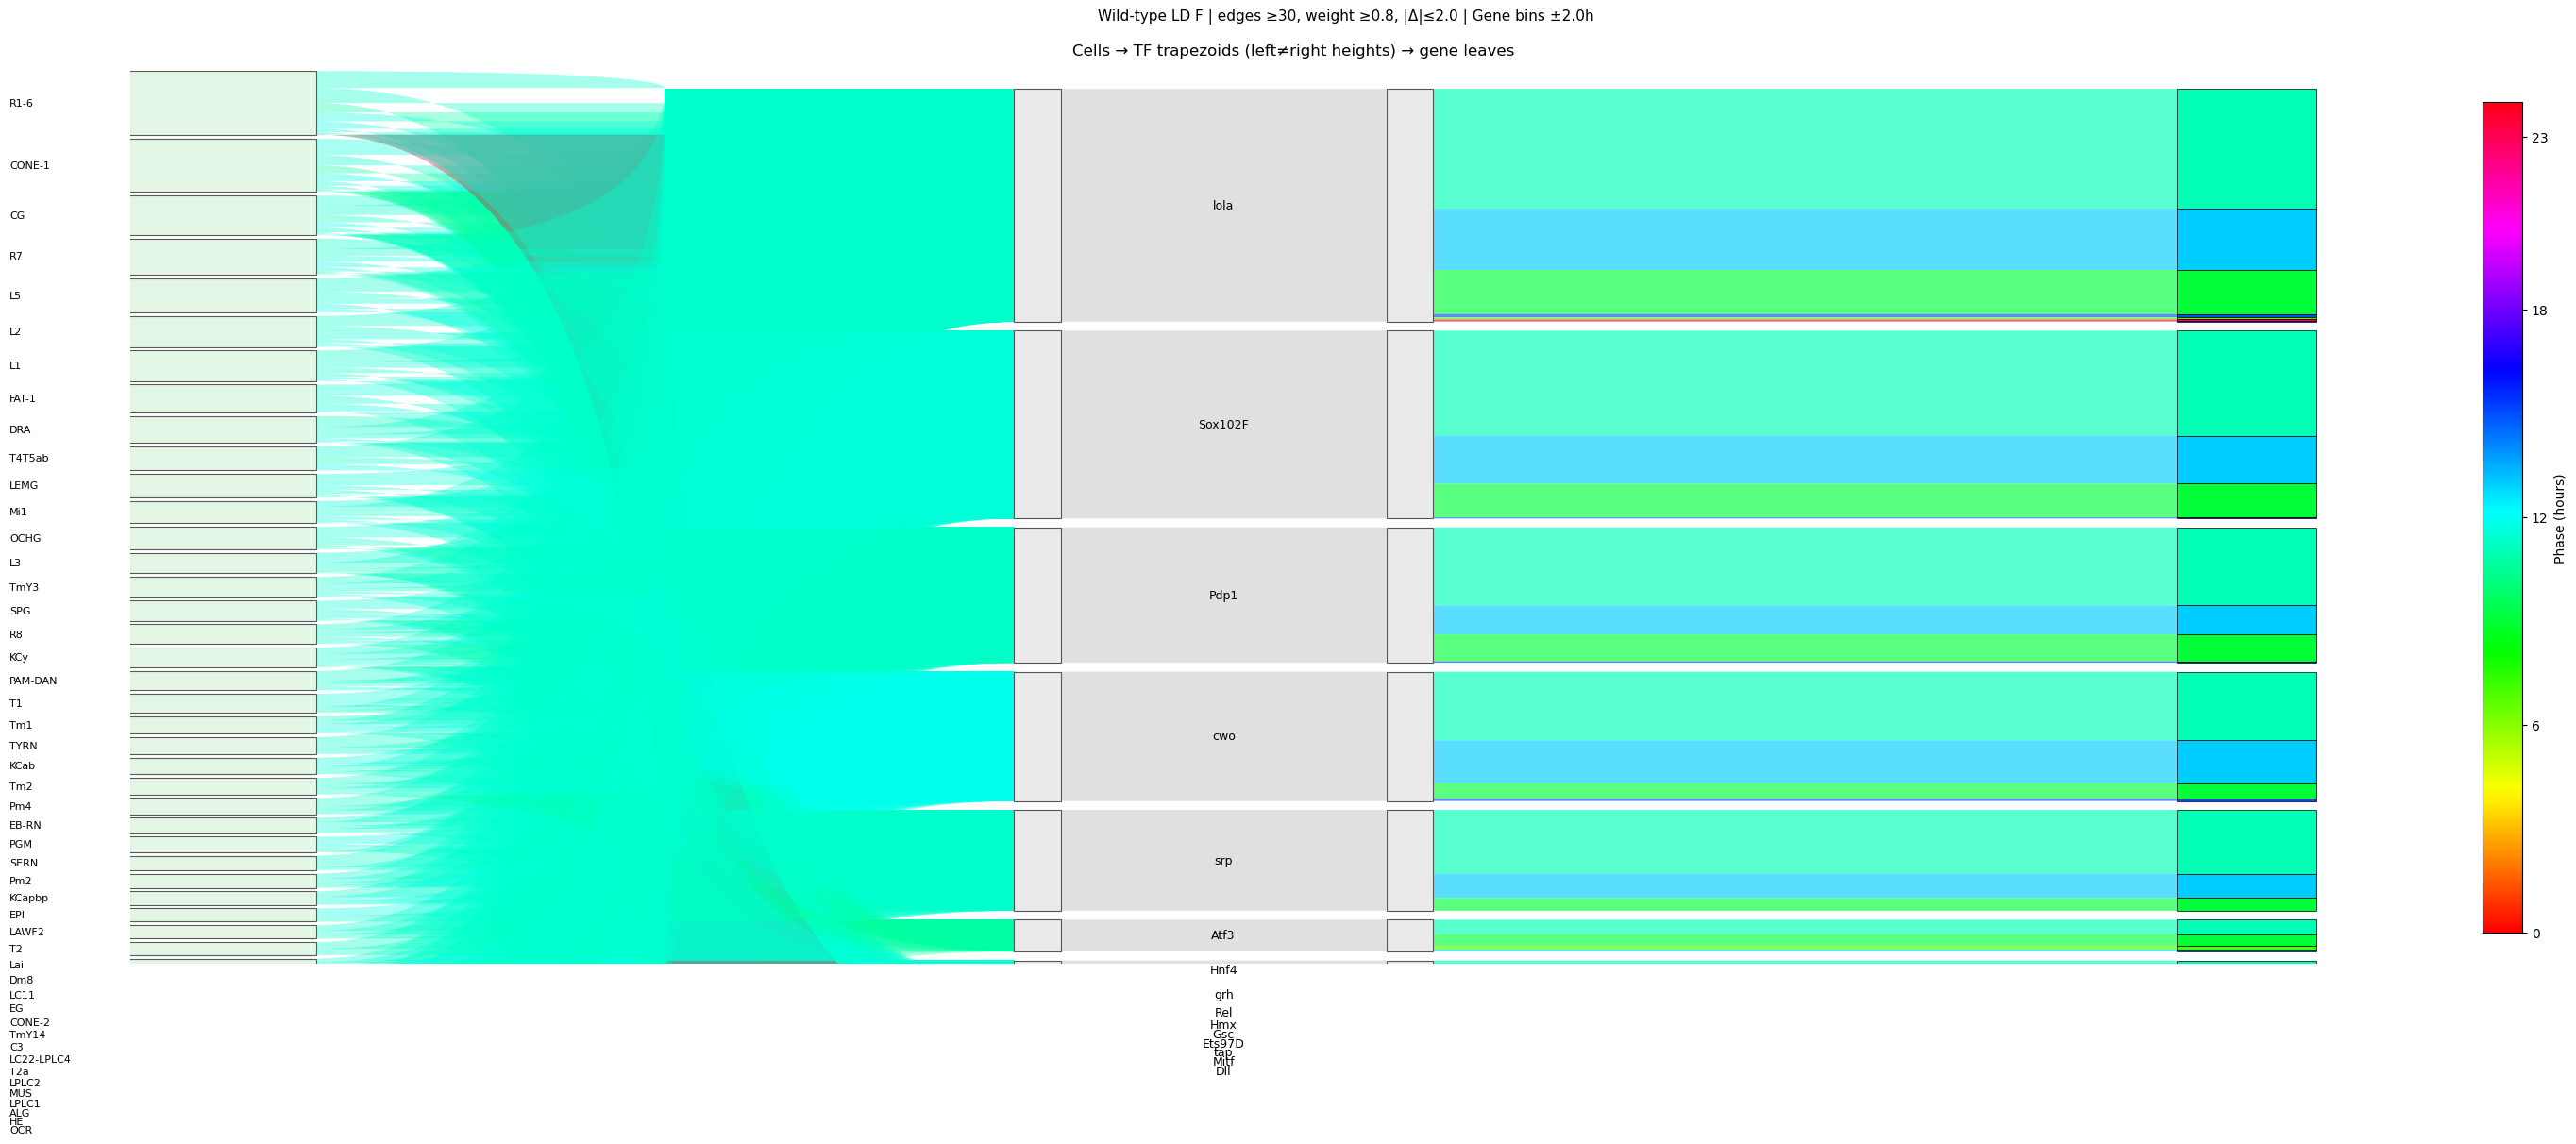

saved: /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_Wildtype_LD_M.png | total weight: 931.86


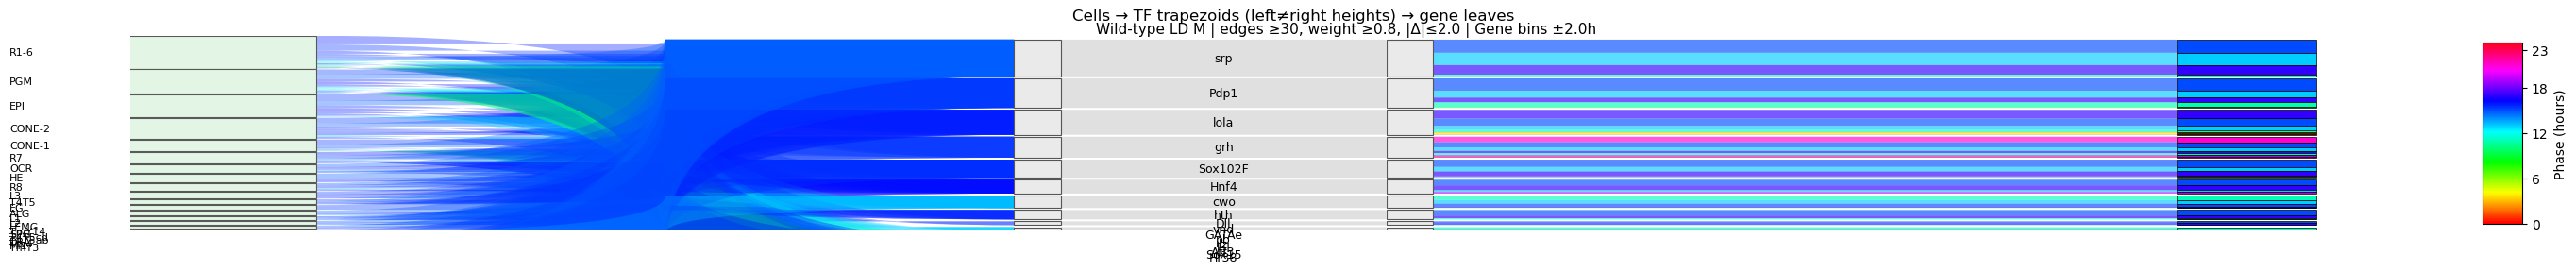

saved: /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_Wildtype_DD_F.png | total weight: 223.97


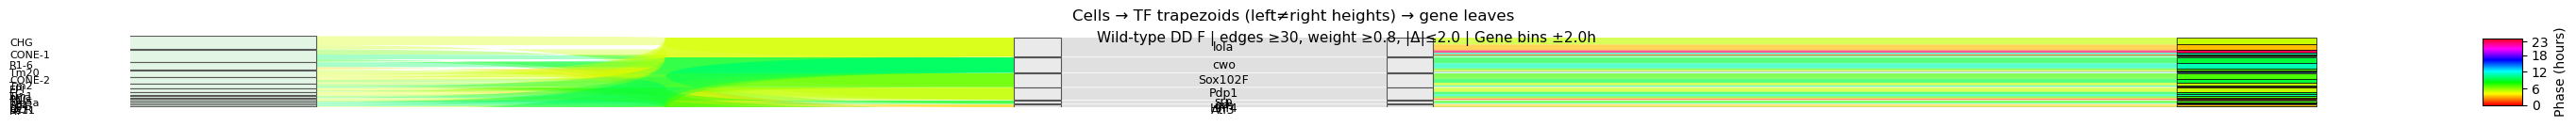

saved: /lustre/fs4/yng_lab/scratch/pkim/plots/sankey_Wildtype_DD_M.png | total weight: 60.69


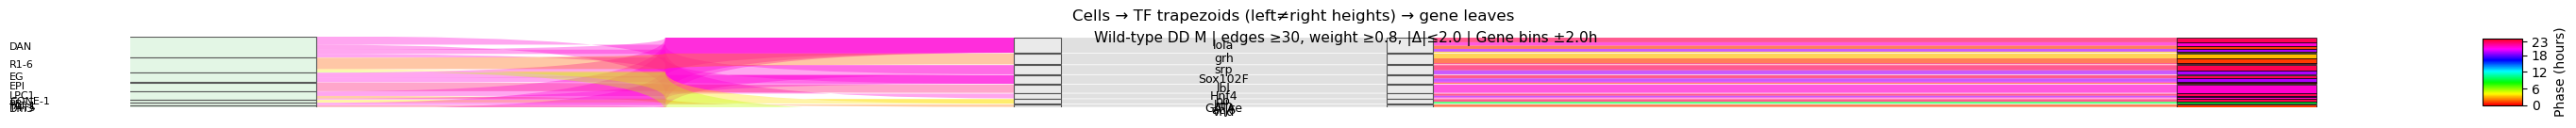

[warn] no edges for per01 LD F with current filters.
[warn] no edges for per01 LD M with current filters.
[warn] no edges for per01 DD F with current filters.
[warn] no edges for per01 DD M with current filters.


In [41]:
# tf_gene_map must already be in memory with columns:
# ['genotype','light','sex','cell_type','TF','Target','tf_phase','gene_phase','edge_count','edge_weight','delta_h']

GENOS  = ["Wild-type", "per01"]   # ← fixed
LIGHTS = ["LD", "DD"]
SEXES  = ["F", "M"]

# your working dir
PLOT_DIR = "/lustre/fs4/yng_lab/scratch/pkim/plots"
TABLE_DIR = "/lustre/fs4/yng_lab/scratch/pkim/tables"

# 1) compute totals for each condition (used to scale heights)
rows = []
totals = {}
for g in GENOS:
    for L in LIGHTS:
        for s in SEXES:
            tot, sub = condition_total_flow(
                tf_gene_map, g, L, s,
                exclude_cells=("Unannotated",),
                min_edge_count=30, min_edge_weight=0.8, max_abs_delta_h=2.0
            )
            totals[(g,L,s)] = float(tot)
            rows.append({"genotype":g,"light":L,"sex":s,"total_weight":float(tot), "n_edges":len(sub)})

tot_df = pd.DataFrame(rows).sort_values("total_weight", ascending=False)
os.makedirs(TABLE_DIR, exist_ok=True)
tot_df.to_csv(os.path.join(TABLE_DIR, "condition_totals.csv"), index=False)
print(tot_df)

GLOBAL_REF = max(totals.values()) if totals else 1.0
print("GLOBAL_REF =", GLOBAL_REF)

# 2) plot each condition with shared GLOBAL_REF so height encodes traffic
os.makedirs(PLOT_DIR, exist_ok=True)
for g in GENOS:
    for L in LIGHTS:
        for s in SEXES:
            out = os.path.join(PLOT_DIR, f"sankey_{g.replace('-','')}_{L}_{s}.png")
            sankey_cells_TFs_genes_bilobed(
                tf_gene_map, g, L, s,
                exclude_cells=("Unannotated",),
                min_edge_count=30, min_edge_weight=0.8, max_abs_delta_h=2.0,
                gene_window_h=2.0,
                global_ref=GLOBAL_REF,
                figsize=(18, 9),
                savepath=out
            )


In [38]:
def debug_filters(df, g, L, s,
                  min_edge_count=30, min_edge_weight=0.8, max_abs_delta_h=2.0,
                  exclude=("Unannotated",)):
    sub0 = df.query("genotype == @g and light == @L and sex == @s").copy()
    print(f"\n== {g} {L} {s} ==")
    print("raw rows:", len(sub0), 
          "| TFs:", sub0["TF"].nunique() if "TF" in sub0 else "NA",
          "| cells:", sub0["cell_type"].nunique() if "cell_type" in sub0 else "NA")

    sub = sub0.copy()
    if exclude:
        sub = sub[~sub["cell_type"].isin(exclude)]
    print("after exclude:", len(sub))

    if "edge_count" in sub.columns:
        sub = sub[sub["edge_count"] >= min_edge_count]
        print(f"after edge_count >= {min_edge_count}:", len(sub))
    else:
        print("no edge_count column")

    if "edge_weight" in sub.columns:
        sub = sub[sub["edge_weight"] >= min_edge_weight]
        print(f"after edge_weight >= {min_edge_weight}:", len(sub))
    else:
        print("no edge_weight column")

    if "delta_h" in sub.columns and max_abs_delta_h is not None:
        sub = sub[sub["delta_h"].abs() <= max_abs_delta_h]
        print(f"after |delta_h| <= {max_abs_delta_h}:", len(sub))
    else:
        print("no delta_h column or threshold=None")

    if "edge_weight" in sub.columns:
        print("final total weight:", float(sub["edge_weight"].sum()))
    return sub

# Run for all four per01 conditions
for L in ["LD","DD"]:
    for s in ["F","M"]:
        debug_filters(tf_gene_map, "per01", L, s)



== per01 LD F ==
raw rows: 0 | TFs: 0 | cells: 0
after exclude: 0
after edge_count >= 30: 0
after edge_weight >= 0.8: 0
after |delta_h| <= 2.0: 0
final total weight: 0.0

== per01 LD M ==
raw rows: 0 | TFs: 0 | cells: 0
after exclude: 0
after edge_count >= 30: 0
after edge_weight >= 0.8: 0
after |delta_h| <= 2.0: 0
final total weight: 0.0

== per01 DD F ==
raw rows: 0 | TFs: 0 | cells: 0
after exclude: 0
after edge_count >= 30: 0
after edge_weight >= 0.8: 0
after |delta_h| <= 2.0: 0
final total weight: 0.0

== per01 DD M ==
raw rows: 0 | TFs: 0 | cells: 0
after exclude: 0
after edge_count >= 30: 0
after edge_weight >= 0.8: 0
after |delta_h| <= 2.0: 0
final total weight: 0.0
